# **Can Social Media Sentiment Drive Stock Prices?**

# _Book 3: TSLA Machine Learning Model Predictions_


# Table of Contents
[Approach](#Approach)\
[Path Forward](#Path-Forward)\
[Linear Regression](#Linear-Regression)
- [Linearity](#Linearity)
- [Multicollinearity](#Multicollinearity)

[1.0 Start the steps to setup our Linear Regression Model](#1.0-Start-the-steps-to-setup-our-Linear-Regression-Model)
- [1.1 Linear Regression with feature elimination](#1.1-Linear-Regression-with-feature-elimination)
    - [Residual Distribution](#Residual-Distribution)
    - [Homoscedastic](#Homoscedastic)
    - [1.1.1 Linear Regression with Filtered Data](#1.1.1-Linear-Regression-with-Filtered-Data)
- [1.2 Ridge Regression (L2 Regularization)](#1.2-Ridge-Regression-(L2-Regularization))
    - [1.2.1 Ridge Regression with filtered data (July 2021 - July 2022)](#1.2.1-Ridge-Regression-with-filtered-data-(July-2021---July-2022))
    - [Hyperparameter Optimization (alpha)](#Hyperparameter-Optimization-(alpha))
    - [1.2.2 Ridge Regression with filter the data for 1 year (July 2021 - July 2022)](#1.2.2-Ridge-Regression-with-filter-the-data-for-1-year-(July-2021---July-2022))

[2.0 KNN Regressor](#2.0-KNN-Regressor)
- [Optimize K value](#Optimize-K-value)
- [2.1 Re-run KNN Regressor with optimized K value](#2.1-Re-run-KNN-Regressor-with-optimized-K-value)

[3.0 Random Forest Regressor](#3.0-Random-Forest-Regressor)
- [Optimize RF model](#Optimize-RF-model)
- [3.1 Re-Run the RandomForestRegressor model with the optimized paramaters](#3.1-Re-Run-the-RandomForestRegressor-model-with-the-optimized-paramaters)

[4.0 SVR - Support Vector Regressor](#4.0-SVR---Support-Vector-Regressor)
- [Optimize SVR model](Optimize-SVR-model)
- [4.1 Re-run the SVR with the optimized parameters](#4.1-Re-run-the-SVR-with-the-optimized-parameters)

[5.0 XGBoost Model](#5.0-XGBoost-Model)
- [Optimize XGBoost Regression model](#Optimize-XGBoost-Regression-model)
- [5.1 Re-run the XGBoost Regressor with the optimized parameters](#5.1-Re-run-the-XGBoost-Regressor-with-the-optimized-parameters)

[6.0 Model Evaluation for SVR_Optimized - Best Performing Model](#6.0-Model-Evaluation-for-SVR_Optimized---Best-Performing-Model)\
[7.0 Combine the Sentiment Data with TSLA stock](#7.0-Combine-the-Sentiment-Data-with-TSLA-stock)\
[8.0 Re-Run all Models with Sentiment data](#8.0-Re-Run-all-Models-with-Sentiment-data)
- [8.1 Ridge Regression with Sentiment](#8.1-Ridge-Regression-with-Sentiment)
    - [8.1.1 Ridge Regression with Sentiment -- Optimized (alpha=10)](#8.1.1-Ridge-Regression-with-Sentiment----Optimized-(alpha=10))
- [8.2 KNN Regression with Sentiment](#8.2-KNN-Regression-with-Sentiment)
    - [8.2.1 KNN Regression with Sentiment -- Optimized (k=100)](#8.2.1-KNN-Regression-with-Sentiment----Optimized-(k=100))
- [8.3 Random Forest Regressor with Sentiment](#8.3-Random-Forest-Regressor-with-Sentiment)
    - [8.3.1 Random Forest Regressor with Sentiment -- Optimized (max_depth=15, n_estimators=100)](#8.3.1-Random-Forest-Regressor-with-Sentiment----Optimized-(max_depth=15,-n_estimators=100))
- [8.4 SVR with Sentiment](#8.4-SVR-with-Sentiment)
    - [8.4.1 SVR with Sentiment -- Optimized (C=80, eplsilon=10, kernel=linear)](#8.4.1-SVR-with-Sentiment----Optimized-(C=80,-eplsilon=10,-kernel=linear))
- [8.5 XGBoost Regression with Sentiment](#8.5-XGBoost-Regression-with-Sentiment)
    - [8.5.1 XGBoost Regression with Sentiment -- Optimized (n_estimators=150, max_depth=10, gamma=0.001, learning_rate=0.1)](#8.5.1-XGBoost-Regression-with-Sentiment----Optimized-(n_estimators=150,-max_depth=10,-gamma=0.001,-learning_rate=0.1))
    
[Conclusion and Next Steps](#Conclusion-and-Next-Steps)

[Bot Trading test -- Appendix](#Bot-Trading-test----Appendix)

# Approach
This book will focus on Statistical Analysis and Machine learning algorithms to predict the trend of the TSLA stock. We will run several models and determine the best perfoming model. The analysis will be completed for the historical data with the feature engineered indicators from Book 2, and then the models will be re-run with the addition of the social media sentiment from Book 1. We will conclude our findings with a comparison to the actual stock movement to determine how accurate our predictions were.

As our target variable is the TSLA Closing Price We will run a Linear regression, Ridge Regression, KNN Regressor, Support Vector Regressor (SVR), Random Forest Regressor, and XGBoost Regressor (eXtreme Gradient Boosting).

In [ ]:
# import the basic packages
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

# stats
import statsmodels.api as sm
from scipy import stats

# sklearn packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
# need to install xgboost
# !pip install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
tsla = pd.read_csv('data/final_tsla.csv')

***Note:*** For the TA's, please un-comment the above as you will not be opening the file via Google Drive  

In [ ]:
# to see all the columns in the data sets.
pd.options.display.max_columns=None

In [ ]:
# What does the data look like
tsla.head()

Unnamed: 0      Open      High       Low  Close     Volume  Year  Month  \
0  2010-10-06  1.404000  1.417333  1.354667  1.364  4701000.0  2010     10   
1  2010-10-07  1.371333  1.376000  1.356000  1.362  2115000.0  2010     10   
2  2010-10-08  1.362000  1.386000  1.359333  1.362  4017000.0  2010     10   
3  2010-10-09  1.362000  1.386000  1.359333  1.362  4017000.0  2010     10   
4  2010-10-10  1.362000  1.386000  1.359333  1.362  4017000.0  2010     10   

   Day  Previous_Close  Previous_Vol  Price_Movement  weekday  Percent_change  \
0    6           1.408     4980000.0              -1        2       -0.146626   
1    7           1.364     4701000.0              -1        3        0.000000   
2    8           1.362     2115000.0               0        4        0.000000   
3    9           1.362     4017000.0               0        5        0.000000   
4   10           1.362     4017000.0               0        6       -0.930025   

       MA_5     MA_20    MA_100      MACD  MACD_signal     BOL_U     BOL_L  \
0  1.385466  1.371400  1.336493  0.010046     0.007968  1.447087  1.295713   
1  1.383600  1.369800  1.334207  0.007707     0.007915  1.444646  1.294954   
2  1.381333  1.370467  1.331900  0.005627     0.007458  1.444755  1.296178   
3  1.379067  1.371133  1.329633  0.003933     0.006753  1.444835  1.297432   
4  1.371600  1.371800  1.328613  0.002562     0.005915  1.444885  1.298715   

   log_momentum  
0     -0.896488  
1     -1.010602  
2     -1.016111  
3     -1.016111  
4     -1.016111

In [ ]:
# what data is stored in the columns
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4713 non-null   object 
 1   Open            4713 non-null   float64
 2   High            4713 non-null   float64
 3   Low             4713 non-null   float64
 4   Close           4713 non-null   float64
 5   Volume          4713 non-null   float64
 6   Year            4713 non-null   int64  
 7   Month           4713 non-null   int64  
 8   Day             4713 non-null   int64  
 9   Previous_Close  4713 non-null   float64
 10  Previous_Vol    4713 non-null   float64
 11  Price_Movement  4713 non-null   int64  
 12  weekday         4713 non-null   int64  
 13  Percent_change  4713 non-null   float64
 14  MA_5            4713 non-null   float64
 15  MA_20           4713 non-null   float64
 16  MA_100          4713 non-null   float64
 17  MACD            4713 non-null   f

We will need to update the data to rename some columns (to Date) and to reassign the index to allow for our time series predictions.

In [ ]:
# rename the 'Unnamed: 0' column to 'Date'
tsla = tsla.rename(columns={'Unnamed: 0':'Date'})
tsla.head(2)

Date      Open      High       Low  Close     Volume  Year  Month  \
0  2010-10-06  1.404000  1.417333  1.354667  1.364  4701000.0  2010     10   
1  2010-10-07  1.371333  1.376000  1.356000  1.362  2115000.0  2010     10   

   Day  Previous_Close  Previous_Vol  Price_Movement  weekday  Percent_change  \
0    6           1.408     4980000.0              -1        2       -0.146626   
1    7           1.364     4701000.0              -1        3        0.000000   

       MA_5   MA_20    MA_100      MACD  MACD_signal     BOL_U     BOL_L  \
0  1.385466  1.3714  1.336493  0.010046     0.007968  1.447087  1.295713   
1  1.383600  1.3698  1.334207  0.007707     0.007915  1.444646  1.294954   

   log_momentum  
0     -0.896488  
1     -1.010602

In [ ]:
# From teh above .info() we can see that the Date/Unnamed: 0 column was type 'object', we need to convert this to datetime
tsla['Date'] = pd.to_datetime(tsla['Date'])

In [ ]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4713 non-null   datetime64[ns]
 1   Open            4713 non-null   float64       
 2   High            4713 non-null   float64       
 3   Low             4713 non-null   float64       
 4   Close           4713 non-null   float64       
 5   Volume          4713 non-null   float64       
 6   Year            4713 non-null   int64         
 7   Month           4713 non-null   int64         
 8   Day             4713 non-null   int64         
 9   Previous_Close  4713 non-null   float64       
 10  Previous_Vol    4713 non-null   float64       
 11  Price_Movement  4713 non-null   int64         
 12  weekday         4713 non-null   int64         
 13  Percent_change  4713 non-null   float64       
 14  MA_5            4713 non-null   float64       
 15  MA_2

We can see all features in the data set is continuous in nature - numerical data.

In [ ]:
# reassign the index to the date
tsla = tsla.set_index('Date')

In [ ]:
print(f"The data set contains {tsla.shape[0]} rows and {tsla.shape[1]} columns.")

The data set contains 4713 rows and 21 columns.


## Path Forward
We will take a 3 step approach to our modelling.
1. Model based on historical data
2. Model based on historical data but within the 1 year time frame of interest (June 2021 - June 2022)
3. Model based on historical data within the 1 year time frame, with the addition of the sentiment scores from Book 1.

## Linear Regression
To begin at the first step we will need to run some statistical analysis. When running a linear regression model we need to first complete some preprocessing to make sure the data is in the correct state to run in our model.

For linear regression we need to check to make sure several assumptions are verified first.

_Assumptions associated with Linear Regression Models:_

- Before fitting the model:
    1. **Linearity:** we want to determine the relationship between the target variable and corresponding independent variables - we will plot this to visualize.
    2. **Independence/ No Multicollinearity:** VIF analysis will not work for this situation - we will reiterate our findings from 2.2 and view the correlations.
``
- After fitting the model:
    3. **Residuals:** must be normally distributed.
    4. **Homoscedasticity:** the variance of the residuals is the same of any value of the X.

### Linearity

We will plot all continuous variables against the target (`Close`). This will help us to visualize if there are any linear relations between all the data.\
There are 21 numeric columns in total (including the target variable).

In [ ]:
# how many numerical columns are there.
len(tsla.select_dtypes('number').columns)

21

In [ ]:
# need to seperate the dependent and independent variables for this test -- this is temporary so use variables accordingly (.copy())
temp = tsla.copy()

X = temp.drop(columns=['Close'])
print(f"The shape of the independent dataframe is: {X.shape}")

y = temp['Close']
print(f"The shape of the dependent dataframe is: {y.shape}")


The shape of the independent dataframe is: (4713, 20)
The shape of the dependent dataframe is: (4713,)


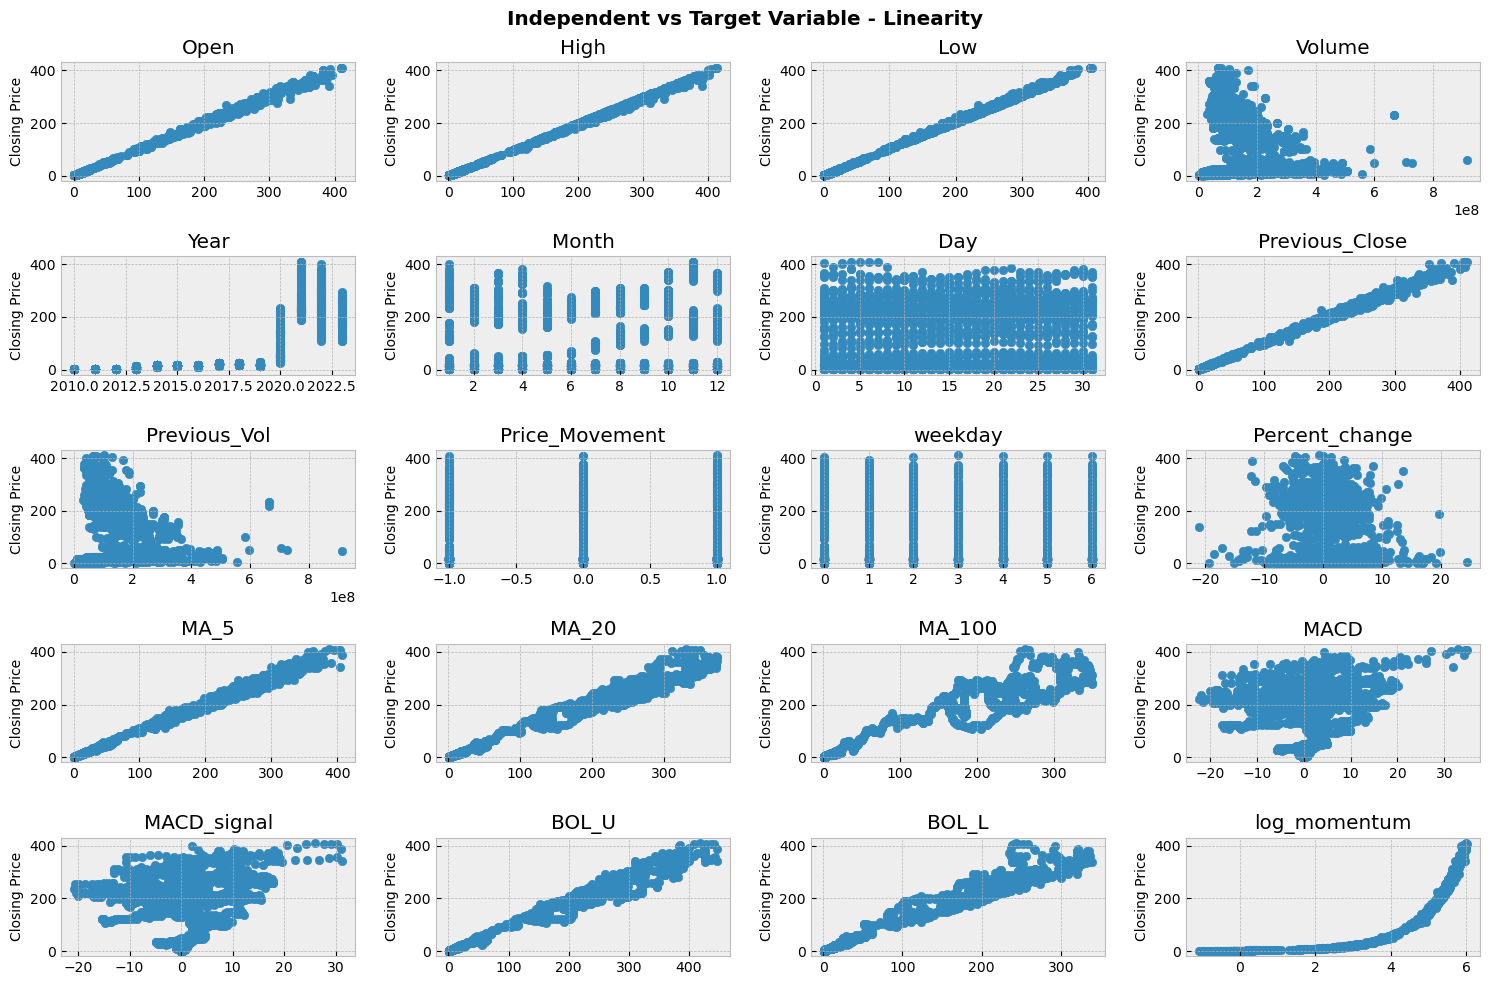

In [ ]:
# plot independent vs dependent variables for linearity check
# we are plotting 20 graphs
plt.subplots(5,4, figsize=(15,10))
plt.suptitle('Independent vs Target Variable - Linearity', size='x-large', weight='semibold')
for i, col in enumerate(X.columns, 1):
    plt.subplot(5,4,i)
    plt.scatter(X[col], y)
    plt.title(col)
    plt.ylabel("Closing Price")


plt.tight_layout()
plt.show()

We can see there are several variables that exhibit significant signs of linearity in comparison to the `Close` target variable. This means we will need to remove several features prior to running our model. We will dig deeper by checking the multicollinearity of the entire dataset.

### Multicollinearity

We will implement the correlation matrix and visualize the results on a heat map to see how much multicollinearity is exhibited in the data.

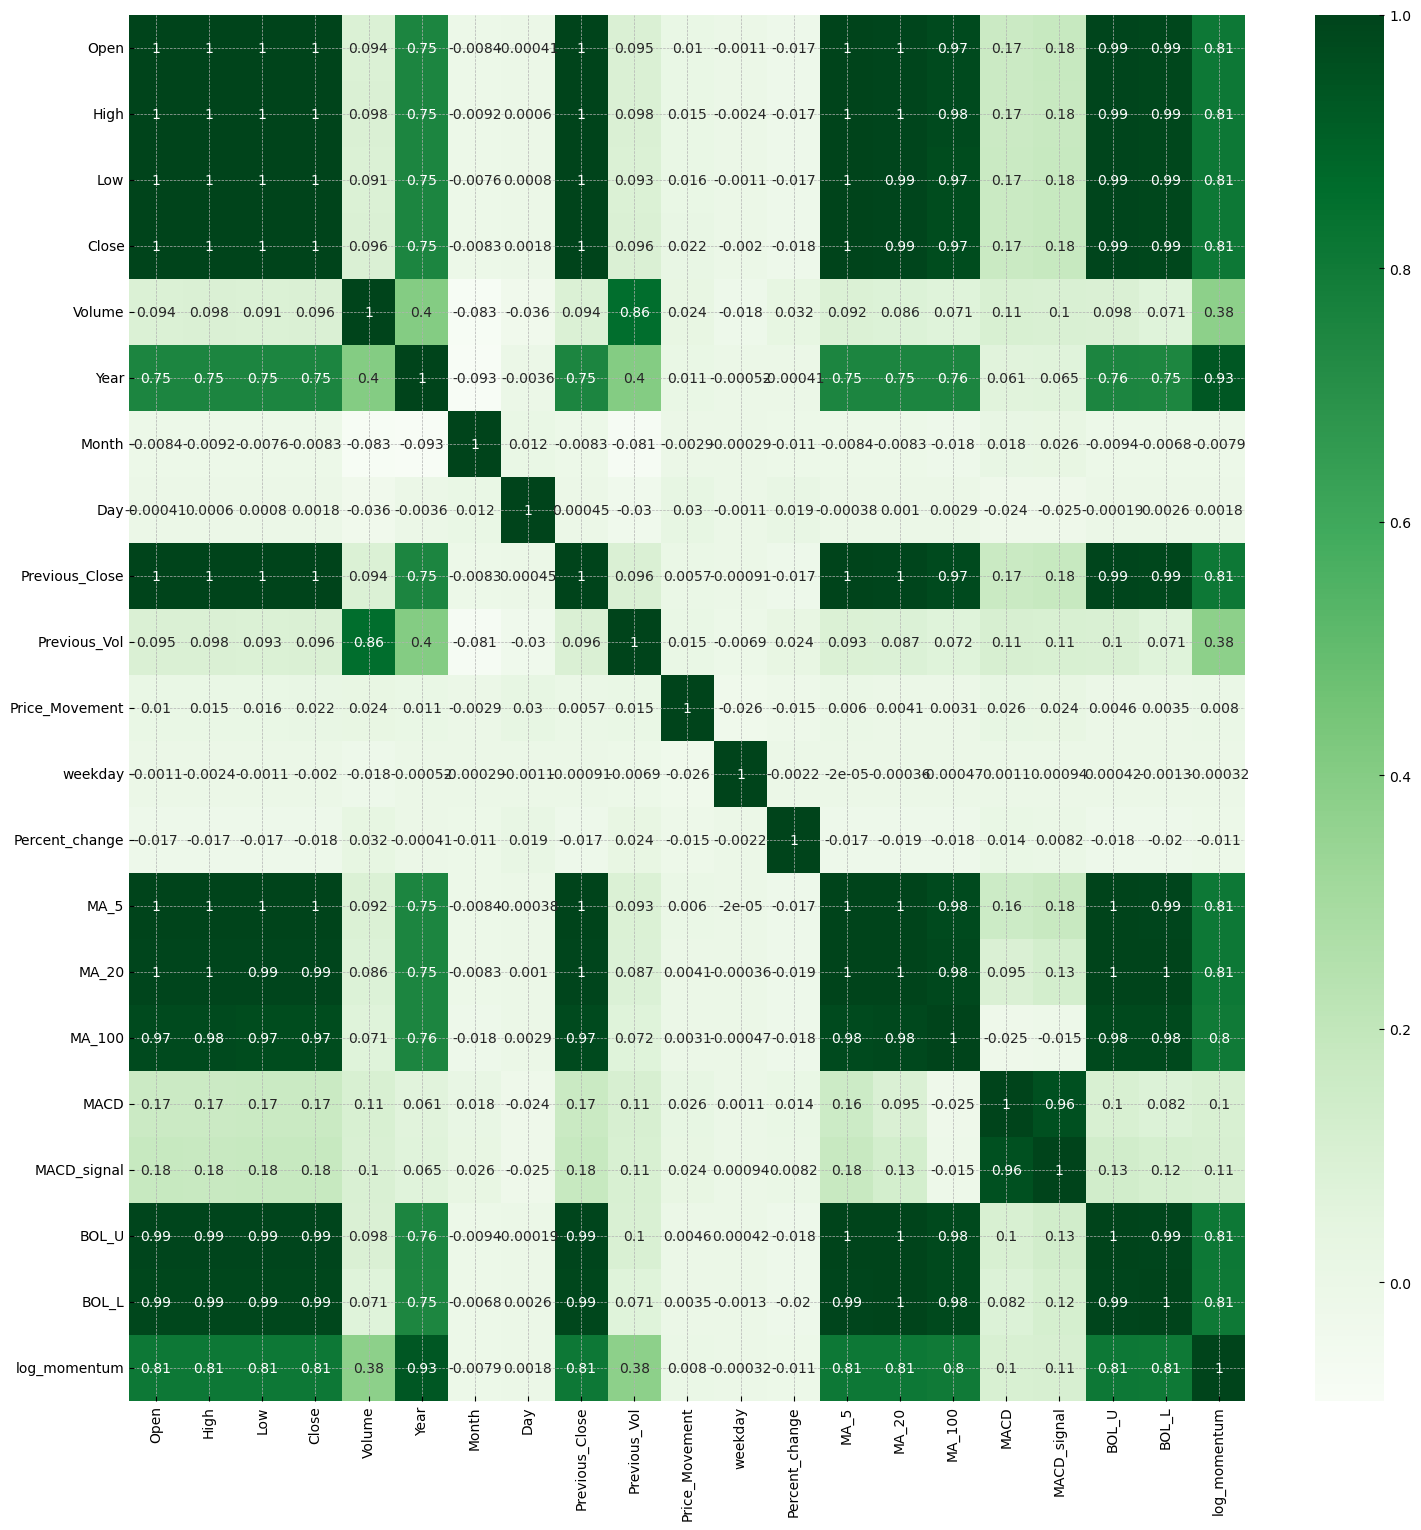

In [ ]:
# Visualize the correlation matrix -- use the .corr() method and run a seaborn heatmap
corr_matrix = tsla.corr()

# visualize the correlation matrix as a heatmap
plt.figure(figsize=(18,18))
sns.heatmap(data=corr_matrix, annot=True, cmap='Greens')

plt.show()

As anticipated from our previous results (linearity check) we can see that there are lots of columns that show high correlation (a lot at 100% correlated). These will need to be dropped from the data set prior to executing the linear regression model.

We can see how these are correlated to the target variable.

In [ ]:
# We are only interested in the correlation between all variables to 'Close'.
close_corr = corr_matrix['Close'].sort_values()
close_corr

Percent_change   -0.017667
Month            -0.008302
weekday          -0.002011
Day               0.001753
Price_Movement    0.021593
Volume            0.095563
Previous_Vol      0.096172
MACD              0.168578
MACD_signal       0.181621
Year              0.754772
log_momentum      0.810528
MA_100            0.974155
BOL_L             0.990173
BOL_U             0.994059
MA_20             0.994373
MA_5              0.998408
Open              0.999235
Previous_Close    0.999251
High              0.999662
Low               0.999688
Close             1.000000
Name: Close, dtype: float64

We can see that there are several features highly correlated to the TSLA closing price. A function is created to iterate through the correlation matrix and determine which features are highly correlated. We will save this to a list and use that to drop the features within our data set.

In [ ]:
# create a function that analyzes the heatmap based on columns and determines which columns are highly correlated.
# based on a given threshold amount (initialize the threshold to 0.9) -- because there are so many highly correlated features we will increase the threshold
# can use this to drop the returned columns in analysis

def correlation(data, threshold=0.9):

    assert isinstance(data, pd.DataFrame), 'data must be a DataFrame'

    # initialize a list to store all column names that show high correlation to another variable
    # (we only need to drop one variable, thus we do not need to state which row the column was correlated to)
    col_drop = []
    data = data.corr()

    for i in range(len(data.columns)):
        # the correlation matrix is a a X a matrix (we know that the number of columns will be the same as the rows)
        for j in range(i):
            # we are interested in negative correlation as well, so we use absolute function
            if abs(data.iloc[i,j]) >= threshold:
                # if the value is higher than the threshold we will store the column name in the list
                col_drop.append(data.columns[j])

    # Return the column list and the length og the list
    return col_drop

In [ ]:
# create a set of the correlated variables as there will be repeats -- then save back into a list
correlated_set = set(correlation(tsla.drop(columns=['Close'])))
correlated_list = list(correlated_set)

In [ ]:
correlated_list

['Previous_Close',
 'Year',
 'MA_5',
 'MA_100',
 'High',
 'Open',
 'BOL_U',
 'MACD',
 'MA_20',
 'Low']

## 1.0 Start the steps to setup our Linear Regression Model

## 1.1 Linear Regression with feature elimination

After completing the analysis to determine which features are heavily correlated, we can now start our progression into preparing our datasets for our models.

In [ ]:
# create a new dataframe for linear regression, as this is the only model that cannot take multicollinearity
tsla_LR = tsla.copy()

# drop the columns that are heavily correlated from the above correlation analysis
tsla_LR = tsla_LR.drop(columns=correlated_list)

# tsla_LR = tsla_LR[min_date:max_date]

print("The linear regression dataframe shape is: ", tsla_LR.shape)
tsla_LR.head()

The linear regression dataframe shape is:  (4713, 11)


Close     Volume  Month  Day  Previous_Vol  Price_Movement  \
Date                                                                     
2010-10-06  1.364  4701000.0     10    6     4980000.0              -1   
2010-10-07  1.362  2115000.0     10    7     4701000.0              -1   
2010-10-08  1.362  4017000.0     10    8     2115000.0               0   
2010-10-09  1.362  4017000.0     10    9     4017000.0               0   
2010-10-10  1.362  4017000.0     10   10     4017000.0               0   

            weekday  Percent_change  MACD_signal     BOL_L  log_momentum  
Date                                                                      
2010-10-06        2       -0.146626     0.007968  1.295713     -0.896488  
2010-10-07        3        0.000000     0.007915  1.294954     -1.010602  
2010-10-08        4        0.000000     0.007458  1.296178     -1.016111  
2010-10-09        5        0.000000     0.006753  1.297432     -1.016111  
2010-10-10        6       -0.930025     0.005915  1.298715     -1.016111

We will need to split the data into a train and test set. For time series analysis we will not be splitting the data as we would traditionally with the `train_test_split` module from sklearn because this would be a means of data leakage. We do not want the future pricing to be leaked into the testing set. We will split based on index.

- Our training set will be 75% and testing will be 25%
- the 75% will be split again as a validation set at 20% of the data

In [ ]:
# quick look before we create the dependent/independent data set and split for train/validate/test -- make sure there are no nulls or duplicates
print("Entire historical dataset")
display(tsla_LR.isnull().sum())

print(f"\nEntire historical dataset: Duplicated rows = {tsla_LR.duplicated().sum()}; Duplicated Columns = {tsla_LR.T.duplicated().sum()}")

Entire historical dataset


Close             0
Volume            0
Month             0
Day               0
Previous_Vol      0
Price_Movement    0
weekday           0
Percent_change    0
MACD_signal       0
BOL_L             0
log_momentum      0
dtype: int64


Entire historical dataset: Duplicated rows = 0; Duplicated Columns = 0


In [ ]:
# create the split index function to use on all the data going forward -- we are interested in 75 train+validation/test and 80/20 train/validation
def split_data(data, train_validation=0.75, validation=0.2):
  '''
  split_data takes in the dataframe and split the data into a train/validation/test set
  This split will be used as an index seperator

  Input:
  data = pandas dataframe
  train_validation = 0.75 as default, but can be manipulated (float)
  validation = 0.20 as default, can be manipulated (float)

  Output:
  return the split index for train/validation/split -- along with several print statements that calculates the totals to make sure it matches the dataset records.
  '''
  train_test_split = int(len(data.index)*train_validation)
  validation_split = int(train_test_split*validation)

  print(f"The training data set contains {train_test_split - validation_split} records.")
  print(f"The validation dataset contains {validation_split} records.")
  print(f"The testing dataset contains {int(len(data.index)) - train_test_split} records.")

  print(f"\nTotal records = {((train_test_split-validation_split) + validation_split + (int(len(data.index)-train_test_split)))}")

  return train_test_split, validation_split

In [ ]:
# create out split indecies for out training/testing/validating data
print("Entire Historical Dataset")
train_test_split, validation_split = split_data(tsla_LR)

Entire Historical Dataset
The training data set contains 2828 records.
The validation dataset contains 706 records.
The testing dataset contains 1179 records.

Total records = 4713


In [ ]:
# take a quick look at how the data looks for the train/validation -- just wanted to make sure the data is in the correct orientation ascending)
def create_sets(data, train_test, validation, target_col):
  '''
  Create the independent and dependent variable dataframes associated with the train/validation/test splits.

  Input:
  data = dataframe of interest
  train_test = split index created from split_data function
  validation_split = split index created from split_data function
  target_col = the target feature of the dataframe of interest

  Output:
  all independent and dependent datasets created from the data splits
  X_train, y_train, X_validation, y_validation, X_test, y_test
  along with some print commands that show the data is correctly split -- to make sure the entire data set is captured in the splits.
  '''
  train_set = data[:(train_test - validation)]
  X_train = train_set.drop(columns=target_col, axis=1)
  y_train = train_set[target_col]

  validation_set = data[(train_test-validation):train_test]
  X_validation = validation_set.drop(columns=target_col, axis=1)
  y_validation = validation_set[target_col]

  test_set = data[train_test:]
  X_test = test_set.drop(columns=target_col, axis=1)
  y_test = test_set[target_col]

  print(f"Train set ---> X:{X_train.shape}, y:{y_train.shape}")
  print(f"Validation set ---> X:{X_validation.shape}, y:{y_validation.shape}")
  print(f"Test set ---> X:{X_test.shape}, y:{y_test.shape}")

  return X_train, y_train, X_validation, y_validation, X_test, y_test

In [ ]:
# set our train/test/validation variables
print("Entire Dataset")
X_train_LR, y_train_LR, X_val_LR, y_val_LR, X_test_LR, y_test_LR = create_sets(tsla_LR, train_test_split, validation_split, 'Close')

Entire Dataset
Train set ---> X:(2828, 10), y:(2828,)
Validation set ---> X:(706, 10), y:(706,)
Test set ---> X:(1179, 10), y:(1179,)


The train/validation/test sets are created along with the independent and dependent variable data frames. We will need to scale the data as there are some features that are discrete and some that are continuous. We will want to standardize all features such that they fall closer to a normal distribution.

In [ ]:
# Create a ML pipeline for a Linear Regression Model -- for repeatability
estimator_LR = [
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
]

LR_pipe = Pipeline(estimator_LR)

In [ ]:
%%time
lm = LR_pipe.fit(X_train_LR, y_train_LR)
acc_train_lm = LR_pipe.score(X_train_LR, y_train_LR)
acc_valid_lm = LR_pipe.score(X_val_LR, y_val_LR)
acc_test_lm = LR_pipe.score(X_test_LR, y_test_LR)

print(f"Train accuracy score: {acc_train_lm}")
print(f"Validation accuracy score: {acc_valid_lm}")
print(f"Test accuracy score: {acc_test_lm}")

Train accuracy score: 0.9887748662854204
Validation accuracy score: 0.8451222549572553
Test accuracy score: 0.6716973160661961
CPU times: total: 0 ns
Wall time: 8 ms


We can see that there is definitely over-fitting observed especially for the training set. Our model performance was 67% for testing.

In [ ]:
# get our model predictions for our validation and testing sets
pred_LR_valid = lm.predict(X_val_LR)
pred_LR_test = lm.predict(X_test_LR)

In [ ]:
# Model Evaluation
from sklearn import metrics
mae_LR = metrics.mean_absolute_error(y_test_LR, pred_LR_test)
mse_LR = metrics.mean_squared_error(y_test_LR, pred_LR_test)
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test_LR, pred_LR_test))

print(f'Mean Absolute Error: {mae_LR}')
print(f'Mean Squared Error: {mse_LR}')
print(f'Root Mean Squared Error: {rmse_LR}')

Mean Absolute Error: 32.91127902474623
Mean Squared Error: 1623.7778790677578
Root Mean Squared Error: 40.29612734578545


Based on the above model evaluations, we can see a large array in errors. The errors are high, which is an indicator of poor performance.

In [ ]:
def plot_predictions(predicted_data, y_testing_data, X_testing_data, accuracy_score):
  '''
  Function to plot the predicted data vs the actual
  '''
  d_test = pd.DataFrame(y_testing_data)
  d_test['Predictions'] = predicted_data
  d_test['Actual'] = d_test['Close']


  plt.figure(figsize=(15,5))
  d_test['Actual'].plot(kind='line', c='black', label='Actual')
  d_test['Predictions'].plot(kind='line', c='red',label='Predicted')
  X_testing_data.plot(kind='line', c='blue', label='testing', alpha=0.3)
  plt.legend()
  plt.xlabel('Days')
  plt.ylabel('Closing Price (USD)')
  plt.title(f'Predcited vs Actual Closing Price    |     R2 Score: {round(accuracy_score,2)}')

  # plt.figure(figsize=(15,5))
  # plt.plot(range(len(y_testing_data)), y_testing_data, c='blue', label='acutal price')
  # plt.plot(predicted_data, c='red', label='predicted price')

  plt.figure(figsize=(15,5))
  d_test['Actual'].plot(kind='line', c='black', label='Actual')
  d_test['Predictions'].plot(kind='line', c='red',label='Predicted')
  plt.legend()
  plt.xlabel('Days')
  plt.ylabel('Closing Price (USD)')
  plt.title(f'Predcited vs Actual Closing Price    |    R2 Score: {round(accuracy_score,2)}   |    JULY 2021 - JULY 2022')

  plt.show()

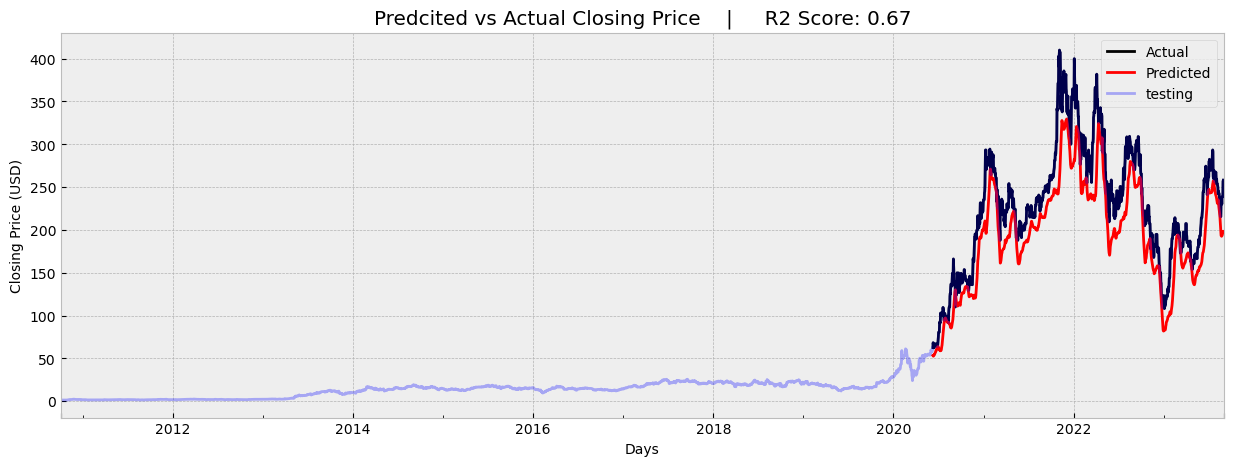

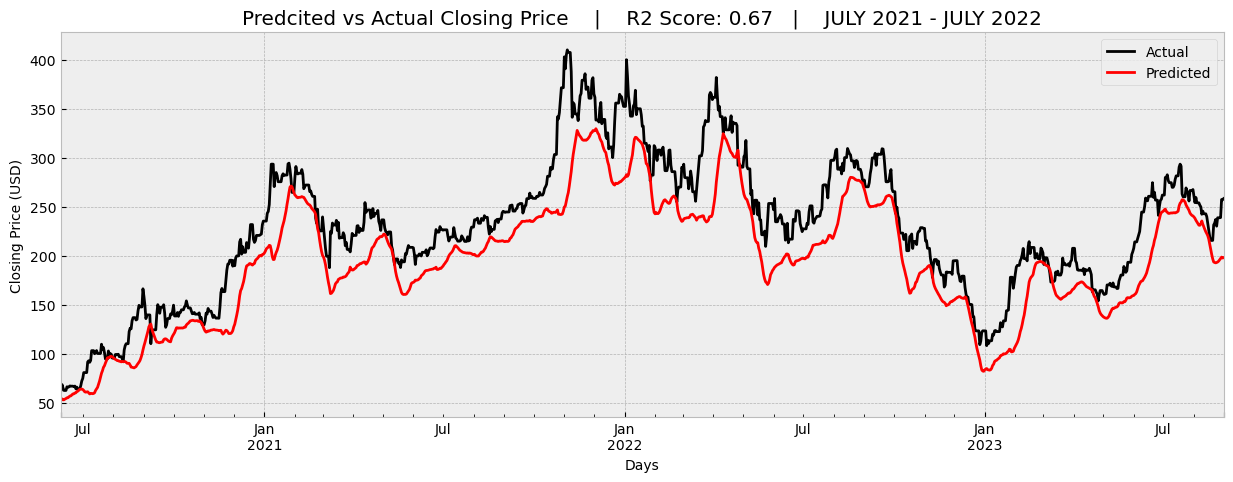

In [ ]:
# plot the testing predictions vs the actuals
plot_predictions(pred_LR_test, y_test_LR, tsla_LR['Close'], acc_test_lm)

We can see that the data closely follows the actual pricing. With a score of 84.5% for validation and 67.2% for testing accuracy -- there is a chance the data is being overfit. We can run a L1 or L2 regularization.

### Residual Distribution

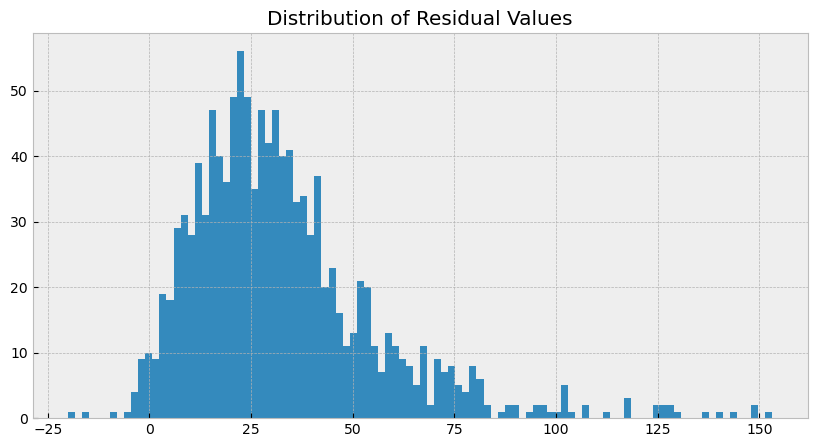

In [ ]:
residuals = y_test_LR - pred_LR_test

# Plotting the residuals of the second iteration model

plt.figure(figsize=(10,5))
plt.hist(residuals, bins = 100)
plt.title('Distribution of Residual Values')
plt.show()

The residuals are not normally distributed. The residuals are skewed.

We can try more advanced methods like the Shapiro-Wilk test and Q-Q plots to understand the distributions.


Hypothesis testing using the Shapiro-Wilk test:
- $H_0$: Data is normally distributed
- $H_1$: Data is not normally distributed
- Threshold for the p-value is set to 0.05

In [ ]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.8935083150863647, pvalue=8.739128604600687e-28)

As the p-value for the Shapiro-Wilk test is less than 0.05, the null hypothesis is rejected. This means that the residuals are **NOT** normally distributed.

**Note:** the Shapiro-Wilk test is really sensitive with a large sample sizes - the test can give false evaluations. Another method is the normal Q-Q plot. Looks at the quartiles.

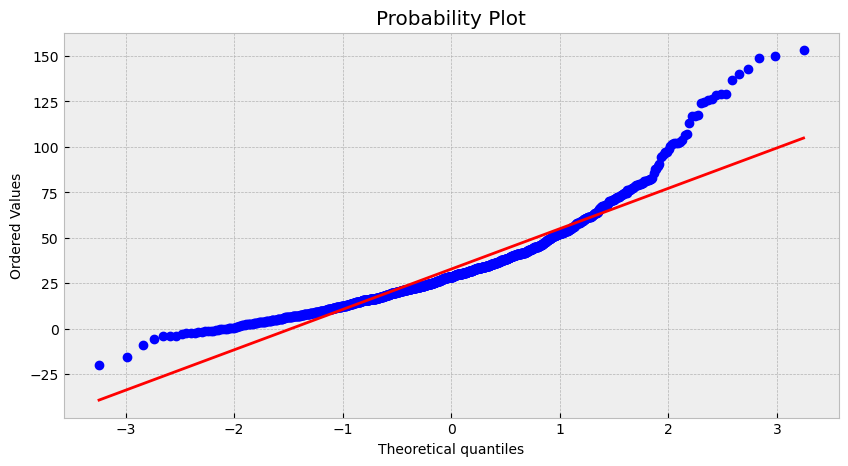

In [ ]:
# Normal Q-Q plot
plt.figure(figsize=(10,5))
stats.probplot(residuals, dist='norm', plot=plt)

plt.show()

Based on the analysis above in the Q-Q plot, our data is very skewed. We can conclude that the data is non normal.

### Homoscedastic

Homoscedastic errors means that the variance in your model residuals should be constant as the independent variables change. This is an assumption of equal or similar variances in different groups being compared. This is important because uneven variances in samples results in bias and can skew test results.

Variance of the residuals must be constant across the predicted values.

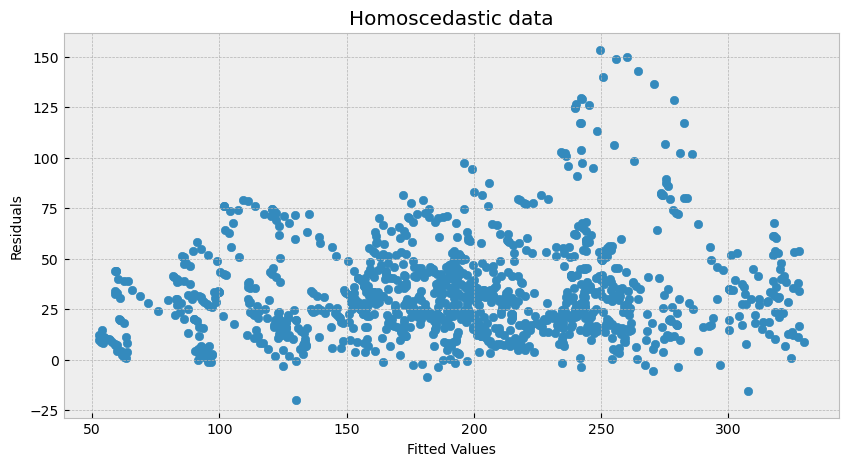

In [ ]:
#Plot the residuals and predicted values
plt.figure(figsize=(10,5))
plt.scatter(pred_LR_test, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedastic data')

plt.show()

It looks like the data is pretty random, but there may be signs of a trend around 25 Residuals (as noted from the normal distribution). For that reason this fails the test.

Based on all these tests, Linear Regression modeling is not the best approach for this data set.

### 1.1.1 Linear Regression with Filtered Data

In [ ]:
# create a new dataframe for linear regression, as this is the only model that cannot take multicollinearity
# create a new data frame for Linear regression filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'
tsla_LR_filter = tsla_LR[min_date:max_date]

print("The linear regression dataframe shape is: ", tsla_LR_filter.shape)
# tsla_LR_filter.head()

The linear regression dataframe shape is:  (365, 11)


We will need to split the data into a train and test set. For time series analysis we will not be splitting the data as we would traditionally with the `train_test_split` module from sklearn because this would be a means of data leakage. We do not want the future pricing to be leaked into the testing set. We will split based on index.

- Our training set will be 75% and testing will be 25%
- the 75% will be split again as a validation set at 20% of the data

In [ ]:
# create out split indecies for out training/testing/validating data
train_test_split_filter, validation_split_filter = split_data(tsla_LR_filter)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
# set our train/test/validation variables
X_train_LR_fil, y_train_LR_fil, X_val_LR_fil, y_val_LR_fil, X_test_LR_fil, y_test_LR_fil = create_sets(tsla_LR_filter, train_test_split_filter, validation_split_filter, 'Close')

Train set ---> X:(219, 10), y:(219,)
Validation set ---> X:(54, 10), y:(54,)
Test set ---> X:(92, 10), y:(92,)


In [ ]:
# Create a ML pipeline for a Linear Regression Model filtered data
estimator_LR = [
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
]

LR_pipe = Pipeline(estimator_LR)

In [ ]:
%%time
lm_filter = LR_pipe.fit(X_train_LR_fil, y_train_LR_fil)
acc_train_lm_filter = LR_pipe.score(X_train_LR_fil, y_train_LR_fil)
acc_valid_lm_filter = LR_pipe.score(X_val_LR_fil, y_val_LR_fil)
acc_test_lm_filter = LR_pipe.score(X_test_LR_fil, y_test_LR_fil)

print(f"Train accuracy score: {acc_train_lm_filter}")
print(f"Validation accuracy score: {acc_valid_lm_filter}")
print(f"Test accuracy score: {acc_test_lm_filter}")


Train accuracy score: 0.9837388359805973
Validation accuracy score: 0.9552018172689037
Test accuracy score: 0.9661099914801041
CPU times: total: 0 ns
Wall time: 6 ms


We can see that there is definately overfitting observed. Test accuracy (R-sqaured) is 97.6% -- very high fit.

In [ ]:
# get our model predictions for our validation and testing sets
pred_LR_valid_fil = lm_filter.predict(X_val_LR_fil)
pred_LR_test_fil = lm_filter.predict(X_test_LR_fil)

In [ ]:
# Model Evaluation
from sklearn import metrics
mae_LR_fil =metrics.mean_absolute_error(y_test_LR_fil, pred_LR_test_fil)
mse_LR_fil = metrics.mean_squared_error(y_test_LR_fil, pred_LR_test_fil)
rmse_LR_fil = np.sqrt(metrics.mean_squared_error(y_test_LR_fil, pred_LR_test_fil))

print(f'Mean Absolute Error: {mae_LR_fil}')
print(f'Mean Squared Error: {mse_LR_fil}')
print(f'Root Mean Squared Error: {rmse_LR_fil}')

Mean Absolute Error: 5.948884147461671
Mean Squared Error: 70.84897313568749
Root Mean Squared Error: 8.41718320673178


Errors are in a good state in comparison to the previous run model.

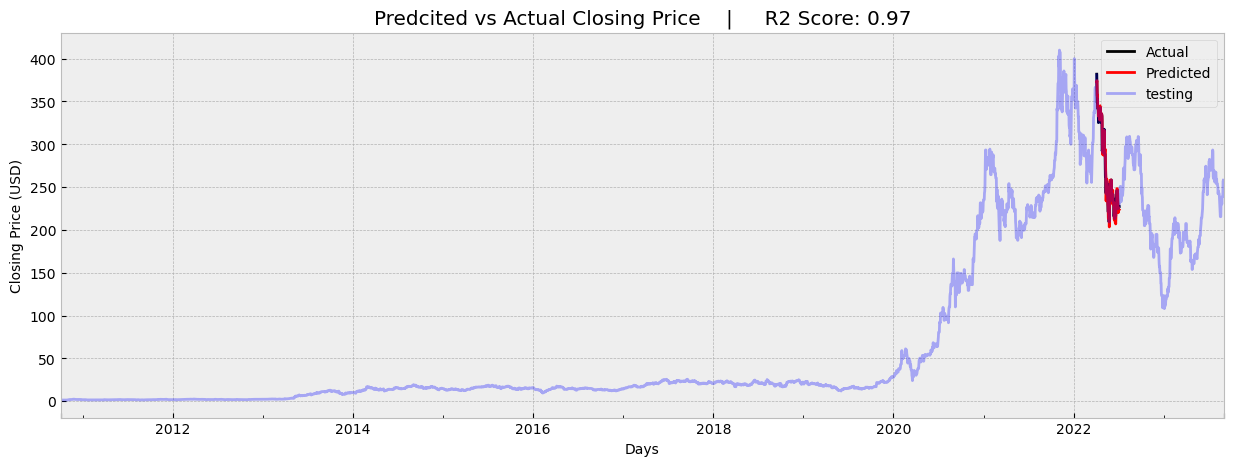

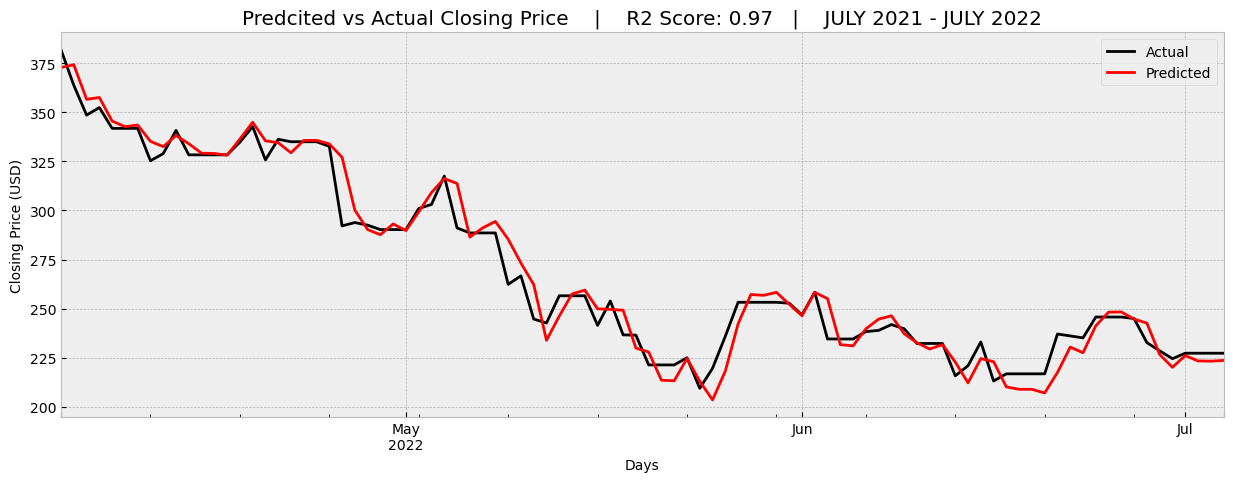

In [ ]:
# plot the testing predictions vs the actuals
plot_predictions(pred_LR_test_fil, y_test_LR_fil, tsla_LR['Close'], acc_test_lm_filter)

### 1.2 Ridge Regression (L2 Regularization)
We see that we exhibit over-fitting within the dataset. This is because stock contains features that relay heavily on previous days pricing, volume, etc. Even with our analysis of the correlations, we still see some over-fitting.

We eliminated a lot of the strongly correlated features, the problem with running our model like this is that there is a chance we dropped features that can contain essential predictive power.

To work around multicollinearity in linear regression is to perform Ridge Regression (L2 Regularization). Below we will take the necessary steps to perform this analysis.

In [ ]:
# create a new dataframe for linear L2 regression
tsla_l2 = tsla.copy()
# tsla_l2 = tsla_LR.copy(2)
tsla_l2.head(2)

Open      High       Low  Close     Volume  Year  Month  Day  \
Date                                                                           
2010-10-06  1.404000  1.417333  1.354667  1.364  4701000.0  2010     10    6   
2010-10-07  1.371333  1.376000  1.356000  1.362  2115000.0  2010     10    7   

            Previous_Close  Previous_Vol  Price_Movement  weekday  \
Date                                                                
2010-10-06           1.408     4980000.0              -1        2   
2010-10-07           1.364     4701000.0              -1        3   

            Percent_change      MA_5   MA_20    MA_100      MACD  MACD_signal  \
Date                                                                            
2010-10-06       -0.146626  1.385466  1.3714  1.336493  0.010046     0.007968   
2010-10-07        0.000000  1.383600  1.3698  1.334207  0.007707     0.007915   

               BOL_U     BOL_L  log_momentum  
Date                                          
2010-10-06  1.447087  1.295713     -0.896488  
2010-10-07  1.444646  1.294954     -1.010602

Split the data based on the same percentage splits
- Our training set will be 75% and testing will be 25%
- the 75% will be split again as a validation set at 20% of the data

In [ ]:
# create out split indecies for out training/testing/validating data
# percentage splits are already set to default for the function
print("Ridge Regression: Entire Historical Dataset")
train_test_split_l2, validation_split_l2 = split_data(tsla_l2)

Ridge Regression: Entire Historical Dataset
The training data set contains 2828 records.
The validation dataset contains 706 records.
The testing dataset contains 1179 records.

Total records = 4713


In [ ]:
# set our train/test/validation variables
print("Entire Dataset")
X_train_l2, y_train_l2, X_val_l2, y_val_l2, X_test_l2, y_test_l2 = create_sets(tsla_l2, train_test_split_l2, validation_split_l2, 'Close')

Entire Dataset
Train set ---> X:(2828, 20), y:(2828,)
Validation set ---> X:(706, 20), y:(706,)
Test set ---> X:(1179, 20), y:(1179,)


In [ ]:
# create a ML pipeline for Ridge Regression

estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=50, random_state=2023)) # set these to any arbritrary number, we will optimize this using hyperparameter optimization
]

L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
# initial run with the L2 regularization
l2 = L2_pipe.fit(X_train_l2, y_train_l2)
acc_train_l2 = L2_pipe.score(X_train_l2, y_train_l2)
acc_valid_l2 = L2_pipe.score(X_val_l2, y_val_l2)
acc_test_l2 = L2_pipe.score(X_test_l2, y_test_l2)

print(f"Train accuracy score: {acc_train_l2}")
print(f"Validation accuracy score: {acc_valid_l2}")
print(f"Test accuracy score: {acc_test_l2}")

Train accuracy score: 0.9972163638665932
Validation accuracy score: 0.9731369752269012
Test accuracy score: 0.8571299522750415
CPU times: total: 15.6 ms
Wall time: 8 ms


Still can see there is a problem with over-fitting or bias.

In [ ]:
# get our model predictions for our validation and testing sets
pred_l2_valid = l2.predict(X_val_l2)
pred_l2_test = l2.predict(X_test_l2)

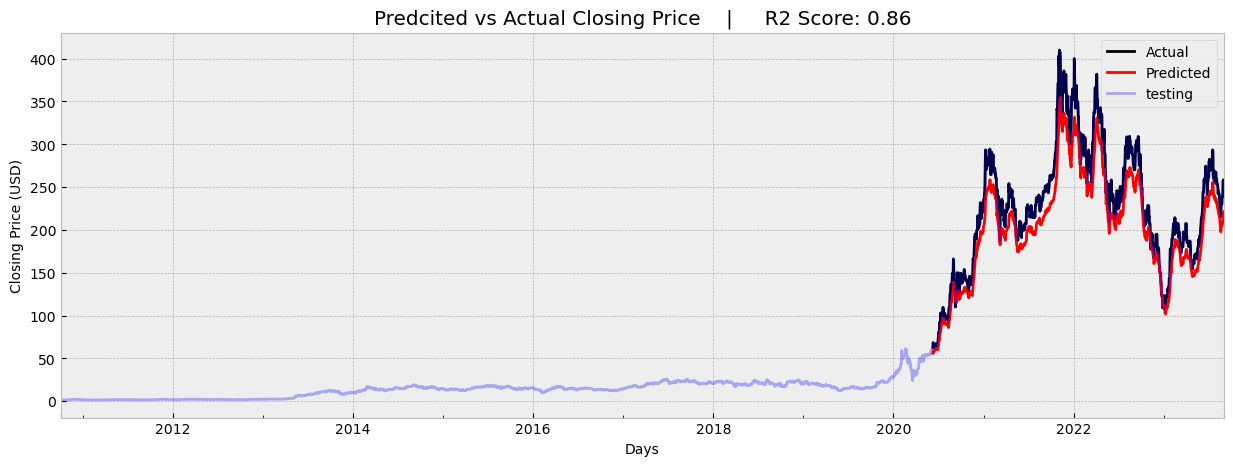

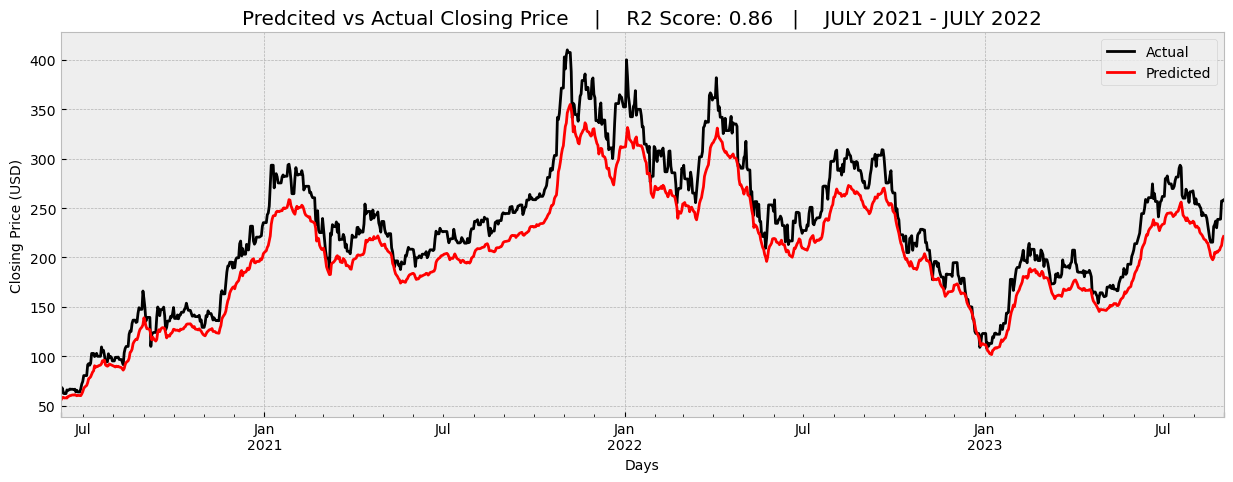

In [ ]:
# plot the test predictions vs the actuals
plot_predictions(pred_l2_test, y_test_l2, tsla_l2['Close'], acc_test_l2)

In [ ]:
# Model Evaluation -- test
mae_ridge = metrics.mean_absolute_error(y_test_l2, pred_l2_test)
mse_ridge = metrics.mean_squared_error(y_test_l2, pred_l2_test)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test_l2, pred_l2_test))

print(f'Mean Absolute Error: {mae_ridge}')
print(f'Mean Squared Error: {mse_ridge}')
print(f'Root Mean Squared Error: {rmse_ridge}')

Mean Absolute Error: 23.869866044568077
Mean Squared Error: 706.6321246521358
Root Mean Squared Error: 26.582553012307446


Our model performance is better than our previous linear regression model.

We need to tune our model -- we will utilize 5 fold cross validation -- GridSearchCV is not needed for this as it is only 1 parameter 'alpha'.

### 1.2.1 Ridge Regression with filtered data (July 2021 - July 2022)

In [ ]:
# create a new data frame for Linear regression filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_l2_filtered = tsla_l2[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered linear regression dataframe shape is: ", tsla_l2_filtered.shape)
# tsla_l2_filtered

The filtered linear regression dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# percentage splits are already set to default for the function
print("Ridge Regression: filtered Dataset")
train_test_split_l2_filter, validation_split_l2_filter = split_data(tsla_l2_filtered)

Ridge Regression: filtered Dataset
The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_l2_filter, y_train_l2_filter, X_val_l2_filter, y_val_l2_filter, X_test_l2_filter, y_test_l2_filter = create_sets(tsla_l2_filtered, train_test_split_l2_filter, validation_split_l2_filter, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for Ridge Regression
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=50, random_state=2023))
]
L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
# L2 regularization, alpha optimized, filtered date
l2_filter_ = L2_pipe.fit(X_train_l2_filter, y_train_l2_filter)
acc_train_l2_filter_ = L2_pipe.score(X_train_l2_filter, y_train_l2_filter)
acc_valid_l2_filter_ = L2_pipe.score(X_val_l2_filter, y_val_l2_filter)
acc_test_l2_filter_ = L2_pipe.score(X_test_l2_filter, y_test_l2_filter)

print(f"Train accuracy score: {acc_train_l2_filter_}")
print(f"Validation accuracy score: {acc_valid_l2_filter_}")
print(f"Test accuracy score: {acc_test_l2_filter_}")

Train accuracy score: 0.9216039517698627
Validation accuracy score: 0.7763559333870016
Test accuracy score: 0.8310488887993709
CPU times: total: 0 ns
Wall time: 6 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_l2_valid_filter_ = l2_filter_.predict(X_val_l2_filter)
pred_l2_test_filter_ = l2_filter_.predict(X_test_l2_filter)

In [ ]:
# Model Evaluation -- test
mae_ridge_ = metrics.mean_absolute_error(y_test_l2_filter, pred_l2_test_filter_)
mse_ridge_ = metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter_)
rmse_ridge_ = np.sqrt(metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter_))


print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_l2_filter, pred_l2_test_filter_)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter_)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter_))}')

Mean Absolute Error: 15.914718133113185
Mean Squared Error: 353.2018214651868
Root Mean Squared Error: 18.79366439695002


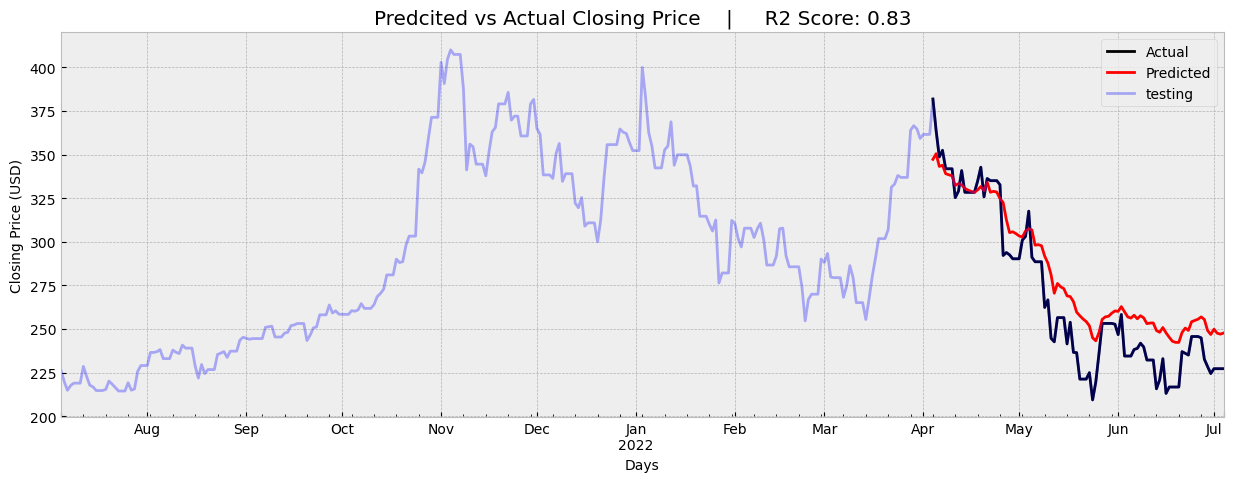

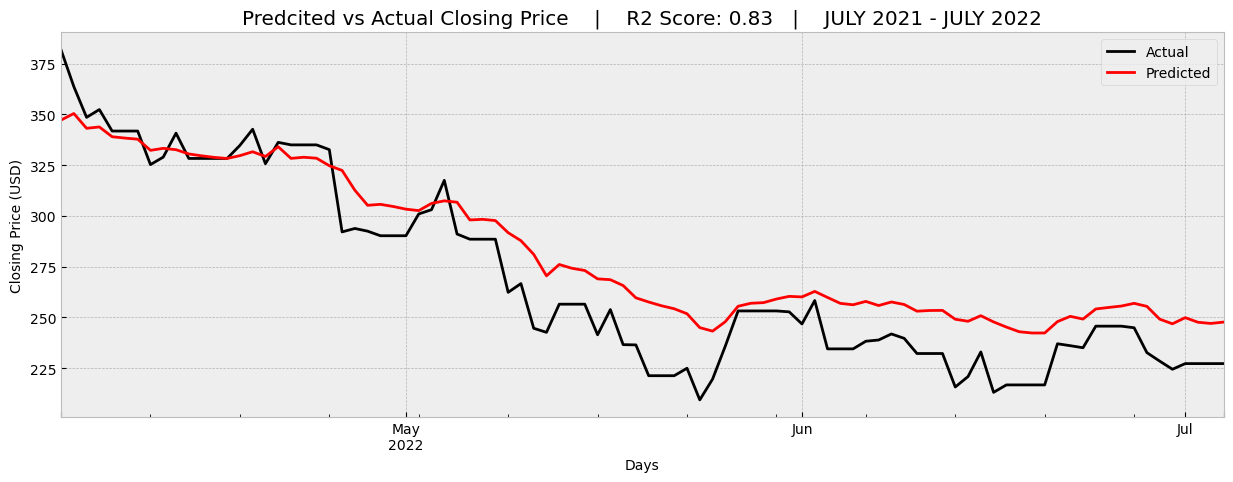

In [ ]:
# plot the test predictions vs the actuals
plot_predictions(pred_l2_test_filter_, y_test_l2_filter, tsla_l2_filtered['Close'], acc_test_l2_filter_)

### Hyperparameter Optimization (alpha)
#### 5 Fold Cross Validation

In [ ]:
# rerun the pipeline without any parameters except for the random_state
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=50, random_state=2023))
]

L2_pipe = Pipeline(estimator_L2)

In [ ]:
# fit the model on 5 folds (cv=5), then score the data using cross_val_score.
# this will provide an array of validation scores, we will then take the mean of these 5
scores = cross_val_score(l2, X_train_l2, y_train_l2, cv=5)
print(scores)

[-0.23000403  0.98363565  0.96828471  0.92756282  0.9332996 ]


Each element in the array above shows the validation score for differing "folds"/splits of the data.

In [ ]:
# Take the average of the validation splits/folds
avg_score = np.mean(scores)
avg_score

0.7165557487185733

After computing the 5 fold cross validation, our validation set scored 90.1%. We will use this 5 fold, and implement hyperparameter optimization of the alpha value within the ridge regression model - this is useful so that we do not have to implement multiple splits to the data. We then choose the parameter with the highest validation score.

C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.14424e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07902e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.06119e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.13033e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_r

C:\Users\DhimanS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.79989e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


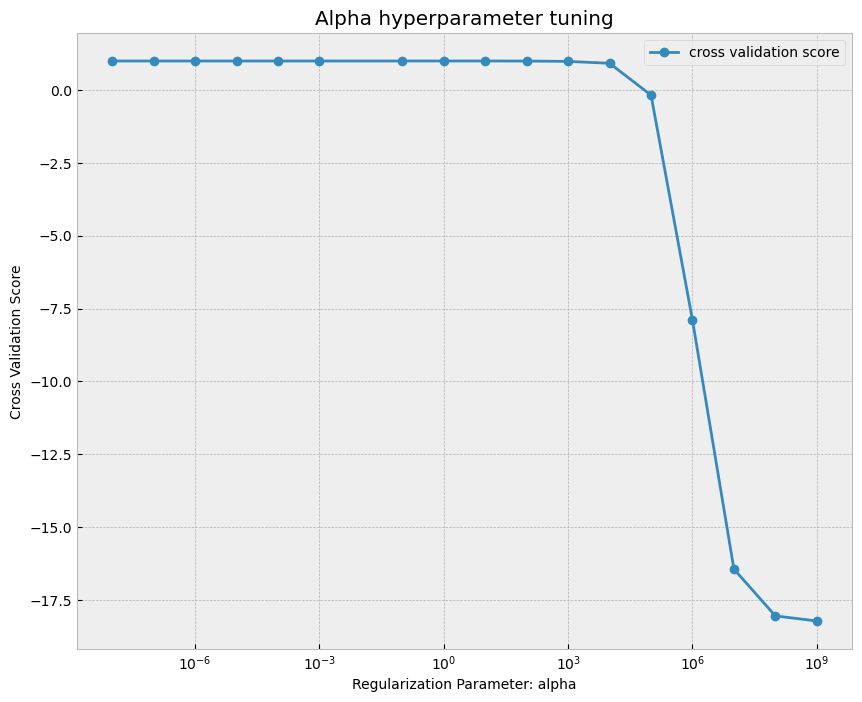

CPU times: total: 3.88 s
Wall time: 512 ms


In [ ]:
%%time
# hyperparameter optimization - credit to BrainStation inclass notes (Hyperparameter Optimization)
cross_validation_scores = []

alpha_range = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1,\
                1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

for alpha in alpha_range:
    ridge_model = Ridge(alpha=alpha, random_state=10)

    # get the mean of all the scores, at 5 fold
    cv_score = np.mean(cross_val_score(ridge_model, X_val_l2, y_val_l2, cv=5))

    cross_validation_scores.append(cv_score)


plt.figure(figsize=(10,8))
plt.plot(alpha_range, cross_validation_scores, label='cross validation score', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter: alpha')
plt.ylabel('Cross Validation Score')
plt.title('Alpha hyperparameter tuning')
plt.legend()
plt.show()

In [ ]:
# lets compute the maximum alpha value
alpha_max = np.array(cross_validation_scores).argmax()
print(f"The best model has alpha = {alpha_range[alpha_max]}")

The best model has alpha = 10.0


Now we know that our best model will use alpha=10.

In [ ]:
# create a ML pipeline for Ridge Regression
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=10, random_state=2023)) ]

L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
# Ridge Regression L2 regularization with optimized hyperparameter
l2 = L2_pipe.fit(X_train_l2, y_train_l2)
acc_train_l2 = L2_pipe.score(X_train_l2, y_train_l2)
acc_valid_l2 = L2_pipe.score(X_val_l2, y_val_l2)
acc_test_l2 = L2_pipe.score(X_test_l2, y_test_l2)

print(f"Train accuracy score: {acc_train_l2}")
print(f"Validation accuracy score: {acc_valid_l2}")
print(f"Test accuracy score: {acc_test_l2}")

Train accuracy score: 0.9986072313110866
Validation accuracy score: 0.9889385170508503
Test accuracy score: 0.9642628857115023
CPU times: total: 0 ns
Wall time: 8 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_l2_valid = l2.predict(X_val_l2)
pred_l2_test = l2.predict(X_test_l2)

In [ ]:
# Model Evaluation -- test
mae_l2 = metrics.mean_absolute_error(y_test_l2, pred_l2_test)
mse_l2 = metrics.mean_squared_error(y_test_l2, pred_l2_test)
rmse_l2 = np.sqrt(metrics.mean_squared_error(y_test_l2, pred_l2_test))
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_l2, pred_l2_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_l2, pred_l2_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_l2, pred_l2_test))}')

Mean Absolute Error: 10.958707177268861
Mean Squared Error: 176.75498399239217
Root Mean Squared Error: 13.294923241312533


Even better after optimizing the alpha hyperparameter. You can see that the model evaluation is better.

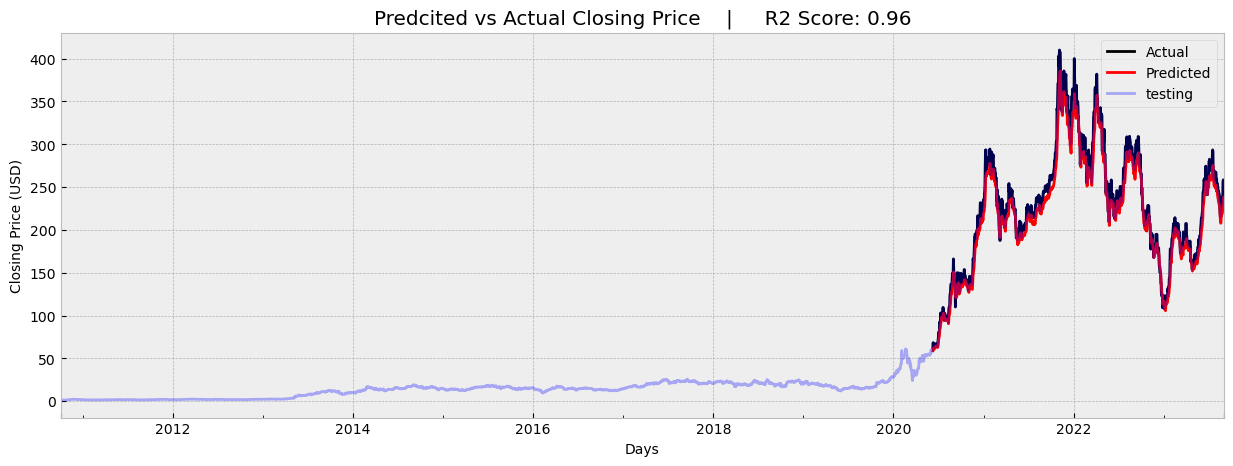

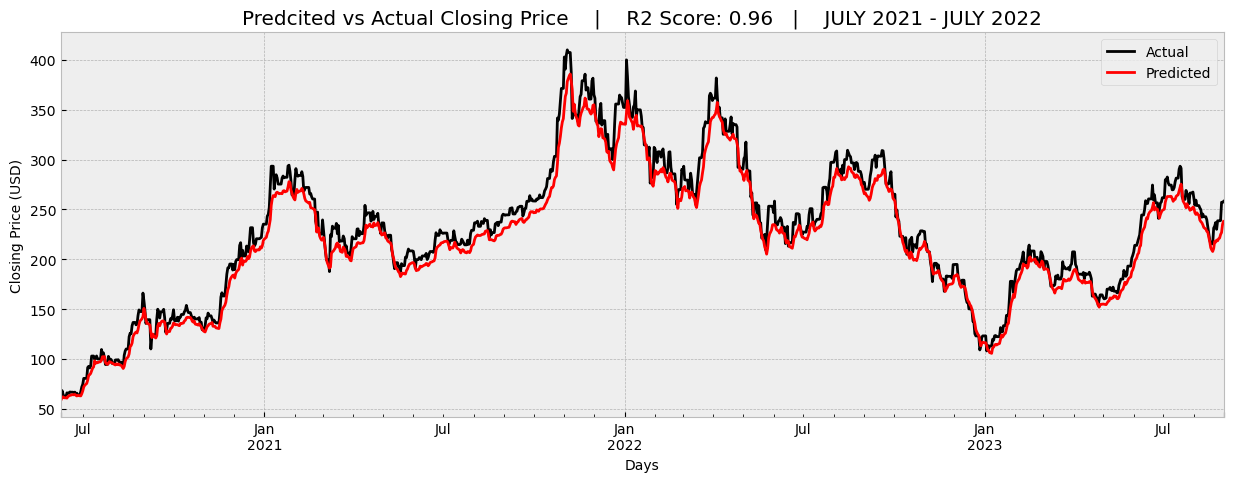

In [ ]:
# plot the test predictions vs the actuals
plot_predictions(pred_l2_test, y_test_l2, tsla_l2['Close'], acc_test_l2)

### 1.2.2 Ridge Regression with filter the data for 1 year (July 2021 - July 2022)
When filtering the data it can help with predicting short term future outcomes. This is true because stock historical data may not reflect what is currently happening. So going forward for this analysis we will filter for 1 year (July 2021 to July 2022).

In [ ]:
# create a new data frame for Linear regression filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_l2_filtered = tsla_l2[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered linear regression dataframe shape is: ", tsla_l2_filtered.shape)
# tsla_l2_filtered

The filtered linear regression dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# percentage splits are already set to default for the function
print("Ridge Regression: filtered Dataset")
train_test_split_l2_filter, validation_split_l2_filter = split_data(tsla_l2_filtered)

Ridge Regression: filtered Dataset
The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


We see that the filtered data has 365 records, this makes sense as we are interested in evaluating on 1 year of data (based on Book 1).

In [ ]:
X_train_l2_filter, y_train_l2_filter, X_val_l2_filter, y_val_l2_filter, X_test_l2_filter, y_test_l2_filter = create_sets(tsla_l2_filtered, train_test_split_l2_filter, validation_split_l2_filter, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for Ridge Regression
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=10, random_state=2023)) ]

L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
# L2 regularization, alpha optimized, filtered date
l2_filter = L2_pipe.fit(X_train_l2_filter, y_train_l2_filter)
acc_train_l2_filter = L2_pipe.score(X_train_l2_filter, y_train_l2_filter)
acc_valid_l2_filter = L2_pipe.score(X_val_l2_filter, y_val_l2_filter)
acc_test_l2_filter = L2_pipe.score(X_test_l2_filter, y_test_l2_filter)

print(f"Train accuracy score: {acc_train_l2_filter}")
print(f"Validation accuracy score: {acc_valid_l2_filter}")
print(f"Test accuracy score: {acc_test_l2_filter}")

Train accuracy score: 0.9771321397164588
Validation accuracy score: 0.9275463198721507
Test accuracy score: 0.9510609003008352
CPU times: total: 0 ns
Wall time: 7 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_l2_valid_filter = l2_filter.predict(X_val_l2_filter)
pred_l2_test_filter = l2_filter.predict(X_test_l2_filter)

In [ ]:
# Model Evaluation -- test
mae_l2_fil = metrics.mean_absolute_error(y_test_l2_filter, pred_l2_test_filter)
mse_l2_fil = metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter)
rmse_l2_fil = np.sqrt(metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter))
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_l2_filter, pred_l2_test_filter)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_l2_filter, pred_l2_test_filter))}')

Mean Absolute Error: 8.129724637046639
Mean Squared Error: 102.30994653882448
Root Mean Squared Error: 10.114837939325794


Model evaluation is significantly better after filtering the data.

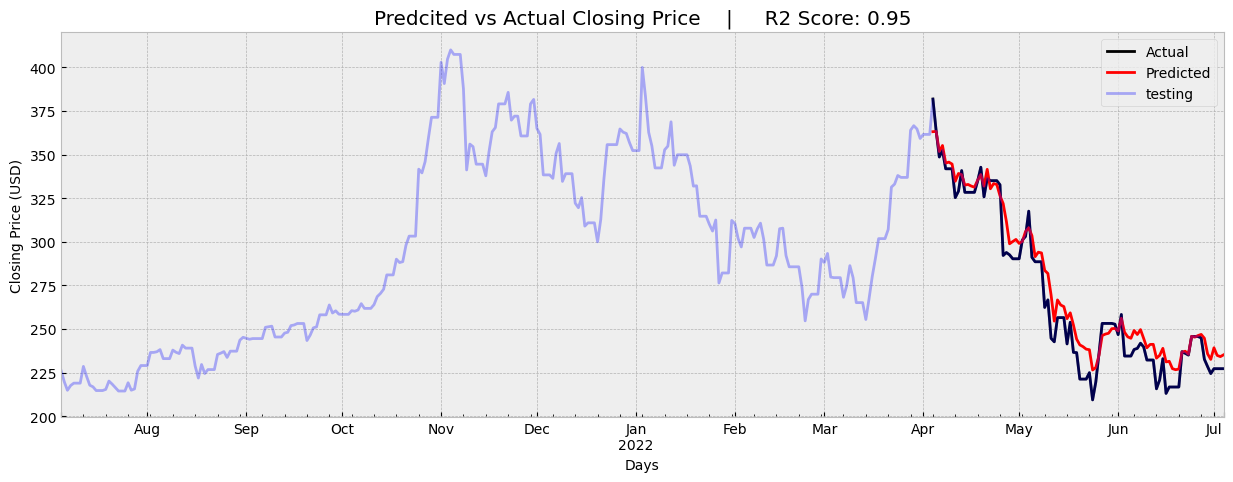

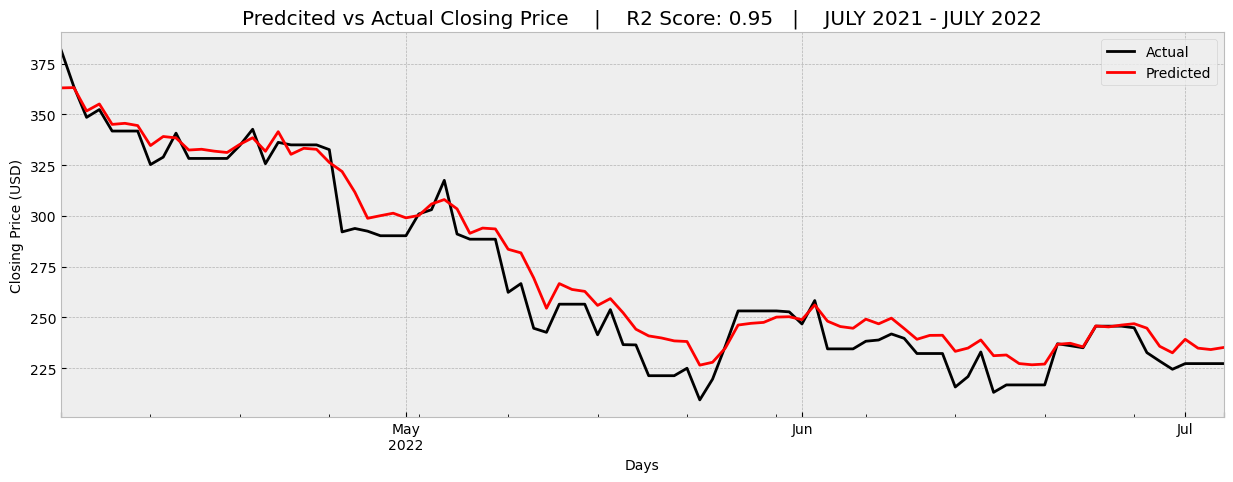

In [ ]:
plot_predictions(pred_l2_test_filter, y_test_l2_filter, tsla_l2[min_date:max_date]['Close'], acc_test_l2_filter)

## 2.0 KNN Regressor
KNN models are not sensitive to multicollinear features, we will keep the entire data set.

Going forward we will only used the filtered data.

In [ ]:
tsla_knn = tsla.copy()

# create a new data frame for Linear regression filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_knn = tsla_knn[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", tsla_knn.shape)
# tsla_knn

The filtered dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# training/validation : test ---> 75%/25%
# training = 60%
# validation = 15%
# testing 25%

train_test_split_knn, validation_split_knn = split_data(tsla_knn)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_knn, y_train_knn, X_val_knn, y_val_knn, X_test_knn, y_test_knn = create_sets(tsla_knn, train_test_split_knn, validation_split_knn, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for KNN Regressor

estimator_knn = [
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5)) # set n_neighbors to 5 as default
]

KNN_pipe = Pipeline(estimator_knn)

In [ ]:
%%time
# initialize with the KNN Regressor
knn = KNN_pipe.fit(X_train_knn, y_train_knn)
acc_train_knn = KNN_pipe.score(X_train_knn, y_train_knn)
acc_valid_knn = KNN_pipe.score(X_val_knn, y_val_knn)
acc_test_knn = KNN_pipe.score(X_test_knn, y_test_knn)

print(f"Train accuracy score: {acc_train_knn}")
print(f"Validation accuracy score: {acc_valid_knn}")
print(f"Test accuracy score: {acc_test_knn}")

Train accuracy score: 0.9754987556711154
Validation accuracy score: 0.5177536516453793
Test accuracy score: 0.6484219737070975
CPU times: total: 1.23 s
Wall time: 91 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_knn_valid = knn.predict(X_val_knn)
pred_knn_test = knn.predict(X_test_knn)

In [ ]:
# Model Evaluation -- test
mae_knn = metrics.mean_absolute_error(y_test_knn, pred_knn_test)
mse_knn = metrics.mean_squared_error(y_test_knn, pred_knn_test)
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_knn, pred_knn_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_knn, pred_knn_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test))}')

Mean Absolute Error: 19.305652552065645
Mean Squared Error: 734.993681848753
Root Mean Squared Error: 27.1107668989417



Model evaluation KNN we can see that it is not as good as the ridge regression from above.



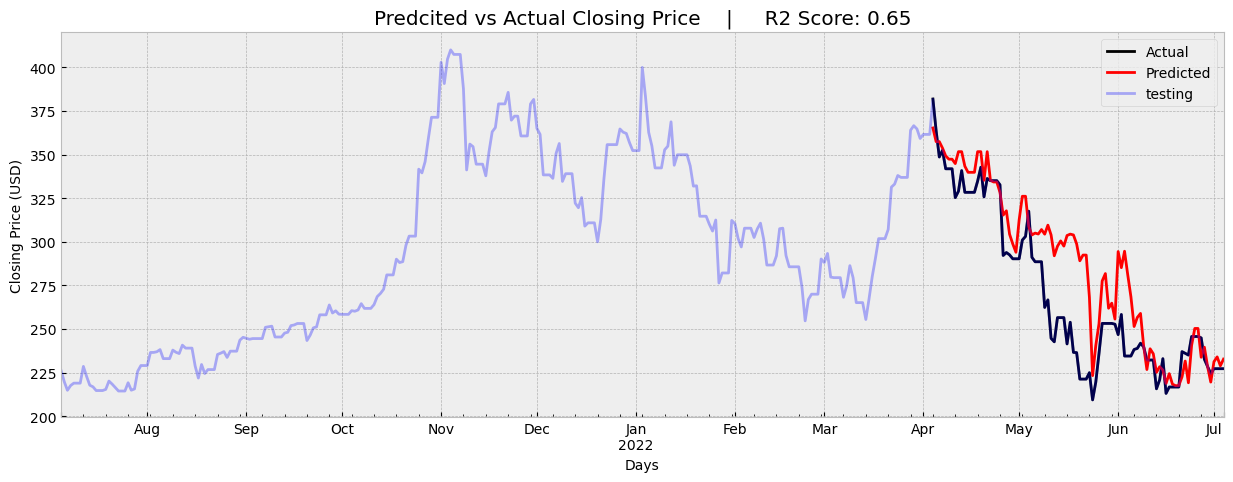

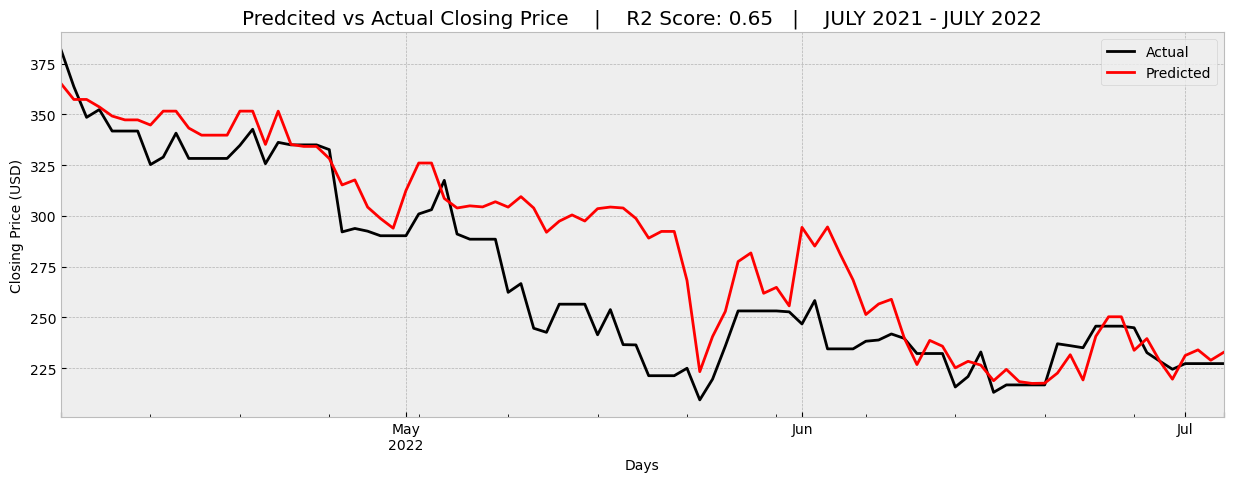

In [ ]:
plot_predictions(pred_knn_test, y_test_knn, tsla_knn['Close'], acc_test_knn)

### Optimize K value
Using the validation set we can run an optimization of the k-value

In [ ]:
%%time
# We will optimize the hyperparameter for the KNN model, which is the number of neighbors (k)
k_values = list(range(1, int(X_train_knn.shape[0])))
train_scores = []
validation_scores = []

for k in k_values:
    # instantiate the pipeline for KNN, with a variable k as the nearest neighbors
    estimator_knn = [
      ('scaler', MinMaxScaler()),
      ('model', KNeighborsRegressor(n_neighbors=k))
    ]
    KNN_pipe = Pipeline(estimator_knn)

    # fit the KNN model with the training data
    KNN_pipe.fit(X_train_knn, y_train_knn)

    # get the accuracy scores for training and validation sets
    train_score = KNN_pipe.score(X_train_knn, y_train_knn)
    validation_score = KNN_pipe.score(X_val_knn, y_val_knn)

    # store the scores into train and validation lists, for plotting
    train_scores.append(train_score)
    validation_scores.append(validation_score)

CPU times: total: 2min 51s
Wall time: 13.7 s


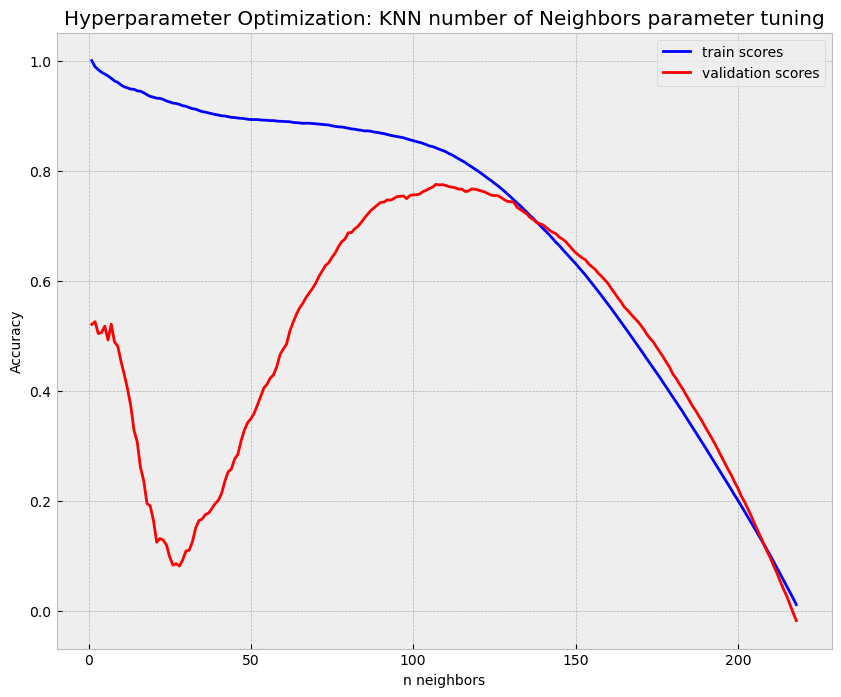

In [ ]:
# plot the train and validation scores against the k values
plt.figure(figsize=(10, 8))

plt.plot(k_values, train_scores, color='blue', label='train scores')
plt.plot(k_values, validation_scores, color='red', label='validation scores')
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.title("Hyperparameter Optimization: KNN number of Neighbors parameter tuning")

plt.legend()
plt.show()

Observation:
- we see heavy over-fitting for small values of k (until k=125)
- the best values when train and validation accuracy are close, at k=100
- for higher values of k, both train and validation accuracy drops
for very high k values, we see a exponential drop of both train/test accuracy - the model simply predicts the majority class of the training set (class 1) if it has visibility to a large enough proportion of the data.



### 2.1 Re-run KNN Regressor with optimized K value

In [ ]:
estimator_knn = [
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=100))
]

KNN_pipe = Pipeline(estimator_knn)

In [ ]:
%%time
# initialize with the KNN Regressor
knn_2 = KNN_pipe.fit(X_train_knn, y_train_knn)
acc_train_knn_2 = KNN_pipe.score(X_train_knn, y_train_knn)
acc_valid_knn_2 = KNN_pipe.score(X_val_knn, y_val_knn)
acc_test_knn_2 = KNN_pipe.score(X_test_knn, y_test_knn)

print(f"Train accuracy score: {acc_train_knn_2}")
print(f"Validation accuracy score: {acc_valid_knn_2}")
print(f"Test accuracy score: {acc_test_knn_2}")

Train accuracy score: 0.8546224770724791
Validation accuracy score: 0.7562625299851001
Test accuracy score: 0.8317720014364001
CPU times: total: 1.25 s
Wall time: 93 ms


We see a significant improvement in our model (from 64% to 83%)

In [ ]:
# get our model predictions for our validation and testing sets
pred_knn_valid_2 = knn_2.predict(X_val_knn)
pred_knn_test_2 = knn_2.predict(X_test_knn)

In [ ]:
# Model Evaluation -- test
mae_knn_op = metrics.mean_absolute_error(y_test_knn, pred_knn_test_2)
mse_knn_op = metrics.mean_squared_error(y_test_knn, pred_knn_test_2)
rmse_knn_op = np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test_2))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_knn, pred_knn_test_2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_knn, pred_knn_test_2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test_2))}')

Mean Absolute Error: 15.06610944333284
Mean Squared Error: 351.69011373679024
Root Mean Squared Error: 18.753402724220216


We see an improvement in our model evaluations as well.

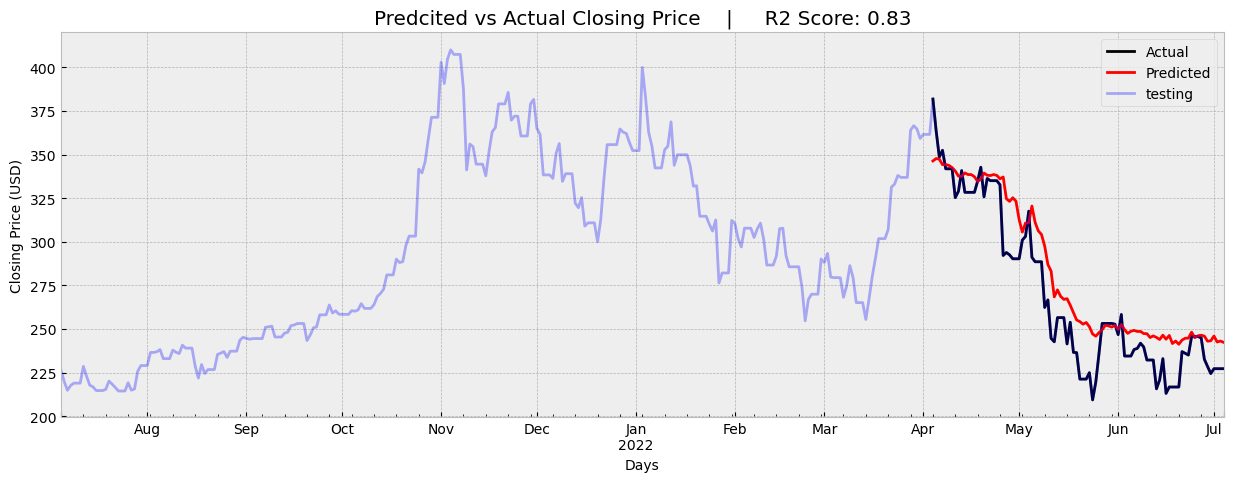

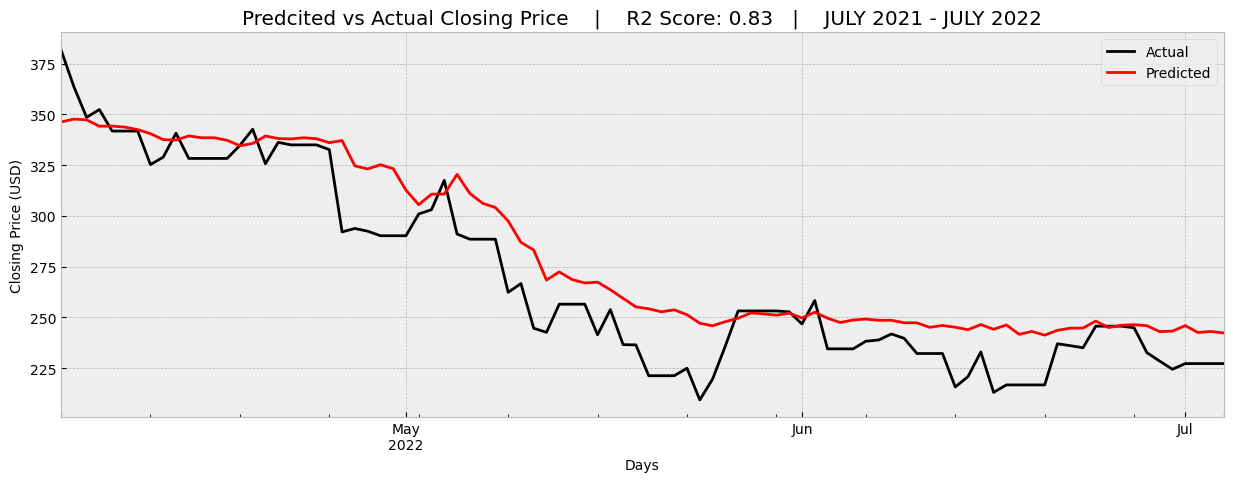

In [ ]:
plot_predictions(pred_knn_test_2, y_test_knn, tsla_knn['Close'], acc_test_knn_2)

## 3.0 Random Forest Regressor
Random Forest models are not sensitive to multicollinear features, we will keep the entire data set.

***Note: Compute the same steps as KNN above, this is just the start to run the first iteration, then after hyperparmeter tuning, we will re-run the models. This will be the case for all the models.***

In [ ]:
tsla_rf = tsla.copy()

# create a new data frame for random forest regression filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_rf = tsla_rf[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", tsla_rf.shape)
# tsla_rf

The filtered dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# training/validation : test ---> 75%/25%
# training = 60%
# validation = 15%
# testing 25%

train_test_split_rf, validation_split_rf = split_data(tsla_rf)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_rf, y_train_rf, X_val_rf, y_val_rf, X_test_rf, y_test_rf = create_sets(tsla_rf, train_test_split_rf, validation_split_rf, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for Random Forest Regressor

estimator_rf = [
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(random_state=2023))
]

RF_pipe = Pipeline(estimator_rf)

In [ ]:
%%time

# initialize with the RF Regressor
rf = RF_pipe.fit(X_train_rf, y_train_rf)
acc_train_rf = RF_pipe.score(X_train_rf, y_train_rf)
acc_valid_rf = RF_pipe.score(X_val_rf, y_val_rf)
acc_test_rf = RF_pipe.score(X_test_rf, y_test_rf)

print(f"Train accuracy score: {acc_train_rf}")
print(f"Validation accuracy score: {acc_valid_rf}")
print(f"Test accuracy score: {acc_test_rf}")

Train accuracy score: 0.9989272896533583
Validation accuracy score: 0.9335213804513721
Test accuracy score: 0.9667855959018106
CPU times: total: 203 ms
Wall time: 202 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_rf_valid = rf.predict(X_val_rf)
pred_rf_test = rf.predict(X_test_rf)

In [ ]:
# Model Evaluation -- test
mae_rf = metrics.mean_absolute_error(y_test_rf, pred_rf_test)
mse_rf = metrics.mean_squared_error(y_test_rf, pred_rf_test)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_rf, pred_rf_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_rf, pred_rf_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test))}')

Mean Absolute Error: 6.79322513414466
Mean Squared Error: 69.43658400938412
Root Mean Squared Error: 8.332861693883087


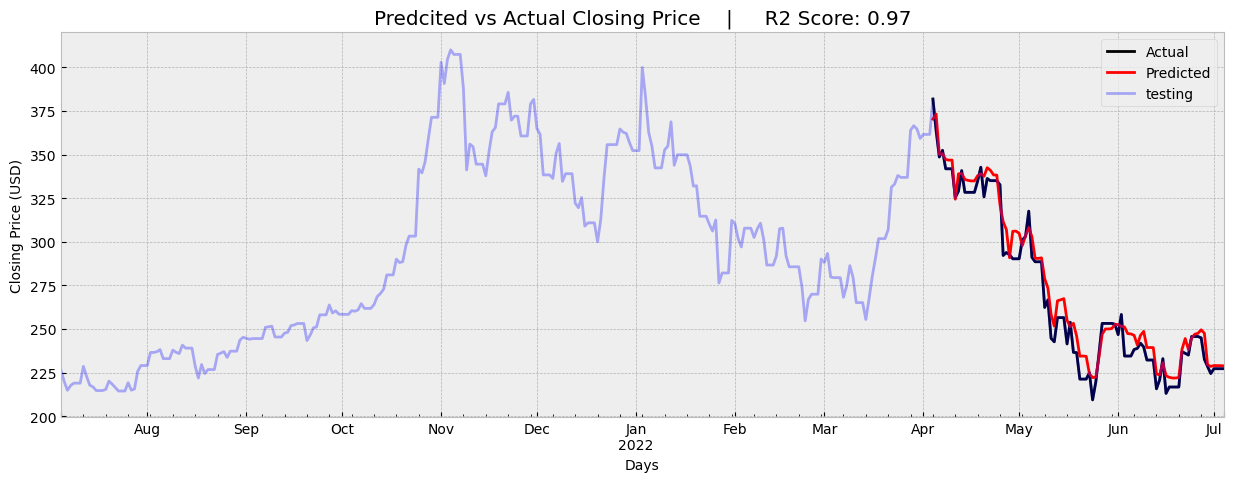

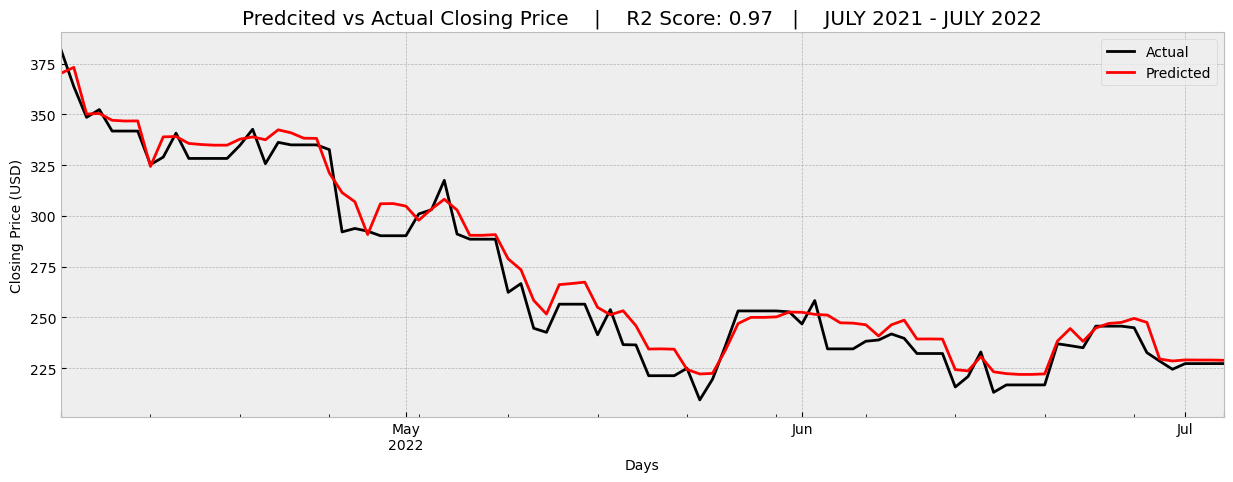

In [ ]:
plot_predictions(pred_rf_test, y_test_rf, tsla_rf['Close'], acc_test_rf)

### Optimize RF model
The Random forest regressor has multiple parameters that we can optimize for our model. We will optimize the n_estimators and max_depth variables.

We will use a GridSearchCV for this -- utilize 5-cross fold validation.

***Disclaimer: the gridsearch takes roughly 2 minutes to run.***

In [ ]:
%%time
# create a dictionary for the model paramaters that we want to optimize
search_param = {
    "n_estimators" : [10, 100, 150, 200,300, 500],
    "max_depth": [1, 5, 10, 15, 20, 50],
}

# fit and run the gridsearch for our random forest regressor model
GS = GridSearchCV(RandomForestRegressor(random_state=2023), search_param, scoring=['r2', 'neg_root_mean_squared_error'], refit='r2', cv=5, verbose=4)
GS.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-35.603) r2: (test=-14.292) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-10.958) r2: (test=-0.261) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-37.461) r2: (test=0.503) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-22.664) r2: (test=-0.010) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=10; neg_root_mean_squared_error: (test=-29.408) r2: (test=-0.040) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-37.293) r2: (test=-15.779) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-10.423) r2: (test=-0.141) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=100; neg_root_mean_squared_e

[CV 3/5] END max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-10.901) r2: (test=0.958) total time=   0.1s
[CV 4/5] END max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-9.283) r2: (test=0.831) total time=   0.1s
[CV 5/5] END max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-8.575) r2: (test=0.912) total time=   0.1s
[CV 1/5] END max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-9.995) r2: (test=-0.205) total time=   0.1s
[CV 2/5] END max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-5.908) r2: (test=0.633) total time=   0.1s
[CV 3/5] END max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-10.543) r2: (test=0.961) total time=   0.1s
[CV 4/5] END max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-9.308) r2: (test=0.830) total time=   0.1s
[CV 5/5] END max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-8.792) r2: (test=0.907) total time=   0.1s
[CV 1

[CV 4/5] END max_depth=20, n_estimators=150; neg_root_mean_squared_error: (test=-8.985) r2: (test=0.841) total time=   0.1s
[CV 5/5] END max_depth=20, n_estimators=150; neg_root_mean_squared_error: (test=-8.822) r2: (test=0.906) total time=   0.1s
[CV 1/5] END max_depth=20, n_estimators=200; neg_root_mean_squared_error: (test=-10.036) r2: (test=-0.215) total time=   0.2s
[CV 2/5] END max_depth=20, n_estimators=200; neg_root_mean_squared_error: (test=-5.939) r2: (test=0.630) total time=   0.2s
[CV 3/5] END max_depth=20, n_estimators=200; neg_root_mean_squared_error: (test=-10.485) r2: (test=0.961) total time=   0.2s
[CV 4/5] END max_depth=20, n_estimators=200; neg_root_mean_squared_error: (test=-8.829) r2: (test=0.847) total time=   0.2s
[CV 5/5] END max_depth=20, n_estimators=200; neg_root_mean_squared_error: (test=-8.650) r2: (test=0.910) total time=   0.2s
[CV 1/5] END max_depth=20, n_estimators=300; neg_root_mean_squared_error: (test=-10.147) r2: (test=-0.242) total time=   0.4s
[CV

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2023),
             param_grid={'max_depth': [1, 5, 10, 15, 20, 50],
                         'n_estimators': [10, 100, 150, 200, 300, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS.best_estimator_)

RandomForestRegressor(max_depth=15, random_state=2023)


In [ ]:
GS.best_params_

{'max_depth': 15, 'n_estimators': 100}

We can see that the best parameters based on our grid search is max_depth = 15 and n_estimators = 100.

### 3.1 Re-Run the RandomForestRegressor model with the optimized paramaters

In [ ]:
# rf model pipeline with the optimized parameters
estimator_rf = [
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(max_depth=15, n_estimators=100, random_state=2023))
]

RF_pipe = Pipeline(estimator_rf)

In [ ]:
%%time
rf_2 = RF_pipe.fit(X_train_rf, y_train_rf)
acc_train_rf_2 = RF_pipe.score(X_train_rf, y_train_rf)
acc_valid_rf_2 = RF_pipe.score(X_val_rf, y_val_rf)
acc_test_rf_2 = RF_pipe.score(X_test_rf, y_test_rf)

print(f"Train accuracy score: {acc_train_rf_2}")
print(f"Validation accuracy score: {acc_valid_rf_2}")
print(f"Test accuracy score: {acc_test_rf_2}")

Train accuracy score: 0.9989272896533583
Validation accuracy score: 0.9335213804513721
Test accuracy score: 0.9667855959018106
CPU times: total: 203 ms
Wall time: 199 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_rf_valid_2 = rf_2.predict(X_val_rf)
pred_rf_test_2 = rf_2.predict(X_test_rf)

In [ ]:
# Model Evaluation -- test
mae_rf_op = metrics.mean_absolute_error(y_test_rf, pred_rf_test_2)
mse_rf_op = metrics.mean_squared_error(y_test_rf, pred_rf_test_2)
rmse_rf_op = np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test_2))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_rf, pred_rf_test_2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_rf, pred_rf_test_2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test_2))}')

Mean Absolute Error: 6.79322513414466
Mean Squared Error: 69.43658400938412
Root Mean Squared Error: 8.332861693883087


We see the model is performing almost the same as the base Random Forest Regressor.

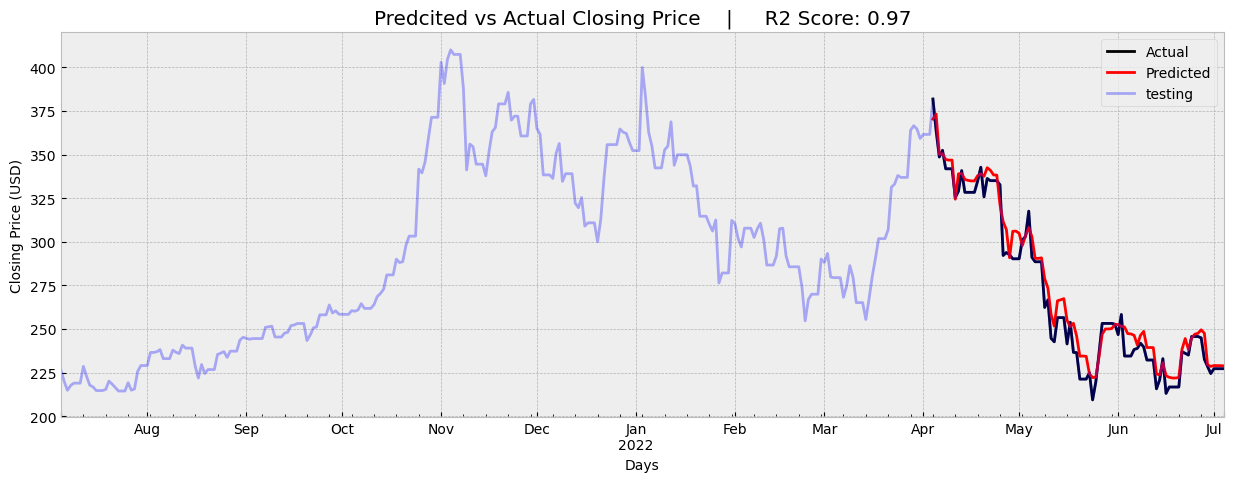

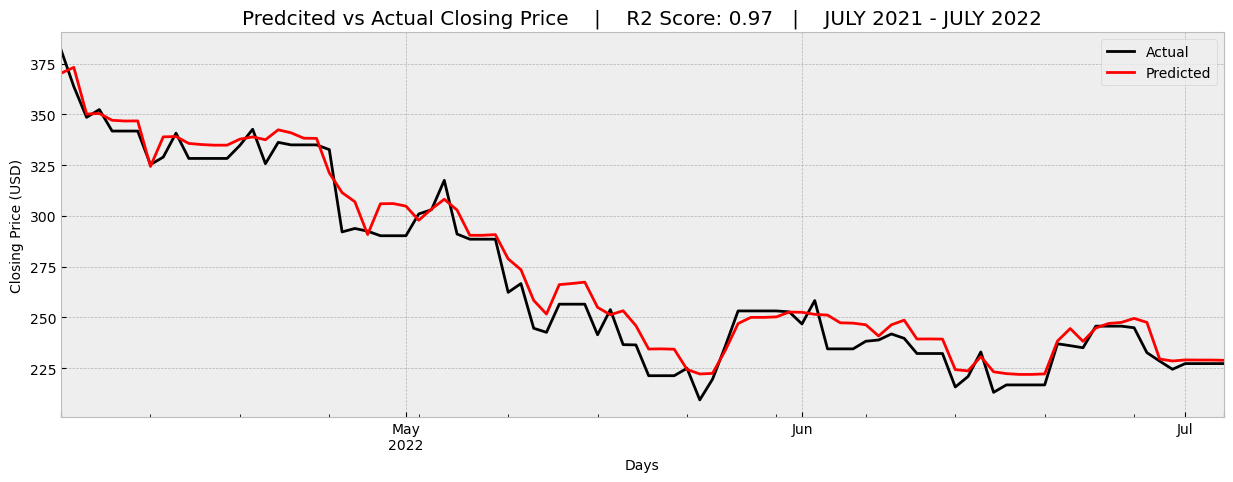

In [ ]:
plot_predictions(pred_rf_test_2, y_test_rf, tsla_rf['Close'], acc_test_rf_2)

## 4.0 SVR - Support Vector Regressor
Again another model that is not affected by multicollinearity.

In [ ]:
tsla_svr = tsla.copy()

# create a new data frame for SVR filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_svr = tsla_svr[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", tsla_svr.shape)
# tsla_svr

The filtered dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# training/validation : test ---> 75%/25%
# training = 60%
# validation = 15%
# testing 25%

train_test_split_svr, validation_split_svr = split_data(tsla_svr)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_svr, y_train_svr, X_val_svr, y_val_svr, X_test_svr, y_test_svr = create_sets(tsla_svr, train_test_split_svr, validation_split_svr, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for SVR

estimator_svr = [
    ('scaler', MinMaxScaler()),
    ('model', SVR(gamma='auto')) # set gamma paramater to auto
]

SVR_pipe = Pipeline(estimator_svr)

In [ ]:
%%time
svr = SVR_pipe.fit(X_train_svr, y_train_svr)
acc_train_svr = SVR_pipe.score(X_train_svr, y_train_svr)
acc_valid_svr = SVR_pipe.score(X_val_svr, y_val_svr)
acc_test_svr = SVR_pipe.score(X_test_svr, y_test_svr)

print(f"Train accuracy score: {acc_train_svr}")
print(f"Validation accuracy score: {acc_valid_svr}")
print(f"Test accuracy score: {acc_test_svr}")

Train accuracy score: 0.4347261551437621
Validation accuracy score: 0.22724923087798277
Test accuracy score: 0.22368561792281005
CPU times: total: 15.6 ms
Wall time: 14 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_svr_valid = svr.predict(X_val_svr)
pred_svr_test = svr.predict(X_test_svr)

In [ ]:
# Model Evaluation -- test
mae_svr = metrics.mean_absolute_error(y_test_svr, pred_svr_test)
mse_svr = metrics.mean_squared_error(y_test_svr, pred_svr_test)
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_svr, pred_svr_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_svr, pred_svr_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test))}')

Mean Absolute Error: 36.67130988279282
Mean Squared Error: 1622.9289753156916
Root Mean Squared Error: 40.285592651910825


By far the non-optimized SVR model has the worst model performance.

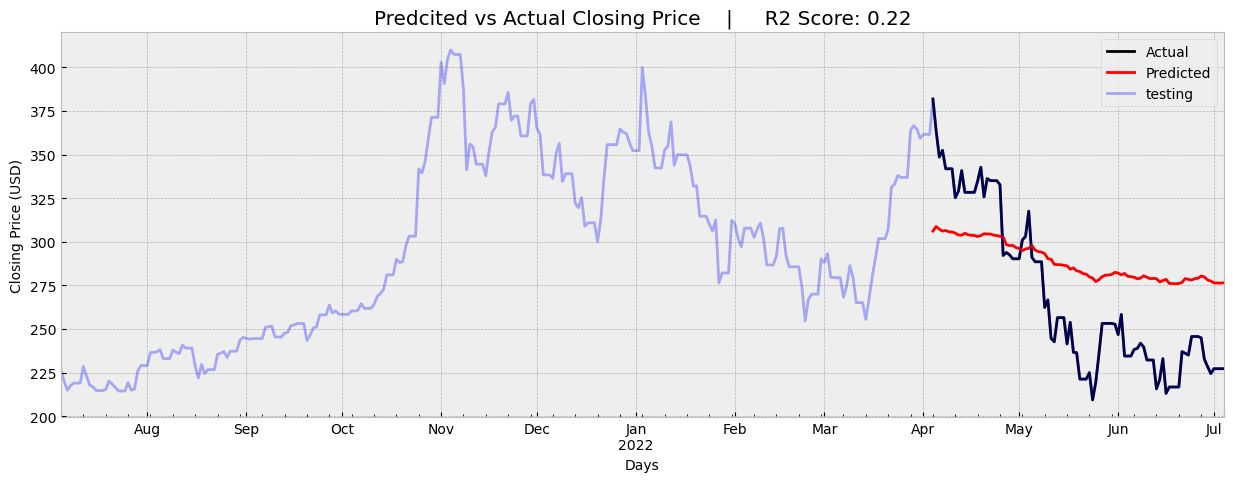

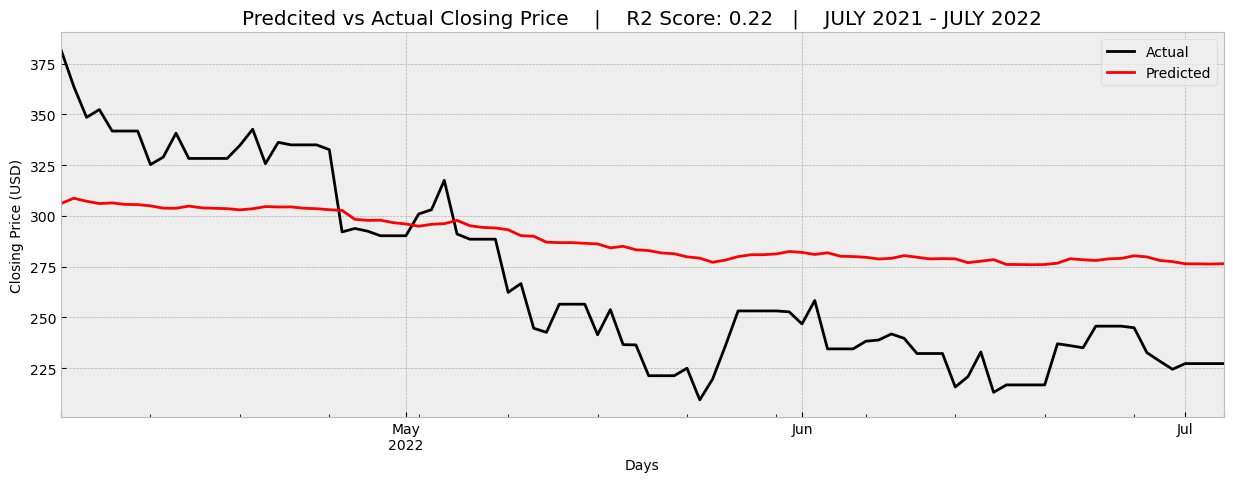

In [ ]:
plot_predictions(pred_svr_test, y_test_svr, tsla_svr['Close'], acc_test_svr)

### Optimize SVR model
The Support Vector Regressor has multiple parameters that we can optimize for our model.

We will use a GridSearchCV for this -- utilize 5-cross fold validation.

In [ ]:
%%time
# create a dictionary for the model paramaters that we want to optimize
search_param = {
    "C": [1,10,30,80,100],
    "epsilon": [1,5,10]
}

# fit and run the gridsearch for our SVR model
GS_svr = GridSearchCV(SVR(gamma='auto'), search_param, scoring=['r2', 'neg_root_mean_squared_error'], refit='r2', cv=5, verbose=4)
GS_svr.fit(X_train_svr, y_train_svr)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END C=1, epsilon=1; neg_root_mean_squared_error: (test=-87.542) r2: (test=-91.455) total time=   0.0s
[CV 2/5] END C=1, epsilon=1; neg_root_mean_squared_error: (test=-67.475) r2: (test=-46.810) total time=   0.0s
[CV 3/5] END C=1, epsilon=1; neg_root_mean_squared_error: (test=-76.985) r2: (test=-1.101) total time=   0.0s
[CV 4/5] END C=1, epsilon=1; neg_root_mean_squared_error: (test=-91.584) r2: (test=-15.487) total time=   0.0s
[CV 5/5] END C=1, epsilon=1; neg_root_mean_squared_error: (test=-77.219) r2: (test=-6.168) total time=   0.0s
[CV 1/5] END C=1, epsilon=5; neg_root_mean_squared_error: (test=-89.499) r2: (test=-95.634) total time=   0.0s
[CV 2/5] END C=1, epsilon=5; neg_root_mean_squared_error: (test=-69.422) r2: (test=-49.609) total time=   0.0s
[CV 3/5] END C=1, epsilon=5; neg_root_mean_squared_error: (test=-74.263) r2: (test=-0.955) total time=   0.0s
[CV 4/5] END C=1, epsilon=5; neg_root_mean_squared_err

GridSearchCV(cv=5, estimator=SVR(gamma='auto'),
             param_grid={'C': [1, 10, 30, 80, 100], 'epsilon': [1, 5, 10]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS_svr.best_estimator_)

SVR(C=80, epsilon=10, gamma='auto')


In [ ]:
GS_svr.best_params_

{'C': 80, 'epsilon': 10}

### 4.1 Re-run the SVR with the optimized parameters
Can re-run the SVR model using C=80, eplsilon=10, kernel=linear.

In [ ]:
# create a ML pipeline for SVR

estimator_svr = [
    ('scaler', MinMaxScaler()),
    ('model', SVR(gamma='auto', C=80, epsilon=10, kernel='linear')) # set gamma paramater to auto, and kernel to linear
]

SVR_pipe = Pipeline(estimator_svr)

In [ ]:
%%time
svr_2 = SVR_pipe.fit(X_train_svr, y_train_svr)
acc_train_svr_2 = SVR_pipe.score(X_train_svr, y_train_svr)
acc_valid_svr_2 = SVR_pipe.score(X_val_svr, y_val_svr)
acc_test_svr_2 = SVR_pipe.score(X_test_svr, y_test_svr)

print(f"Train accuracy score: {acc_train_svr_2}")
print(f"Validation accuracy score: {acc_valid_svr_2}")
print(f"Test accuracy score: {acc_test_svr_2}")

Train accuracy score: 0.9885043586262905
Validation accuracy score: 0.9768761384783934
Test accuracy score: 0.9840458069183049
CPU times: total: 15.6 ms
Wall time: 8 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_svr_valid_2 = svr_2.predict(X_val_svr)
pred_svr_test_2 = svr_2.predict(X_test_svr)

In [ ]:
# Model Evaluation -- test
mae_svr_op = metrics.mean_absolute_error(y_test_svr, pred_svr_test_2)
mse_svr_op = metrics.mean_squared_error(y_test_svr, pred_svr_test_2)
rmse_svr_op = np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test_2))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_svr, pred_svr_test_2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_svr, pred_svr_test_2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test_2))}')

Mean Absolute Error: 4.4783225757712755
Mean Squared Error: 33.35313994928616
Root Mean Squared Error: 5.775217740422101


After optimizing the paramaters of interest, the model performance increased drastically.

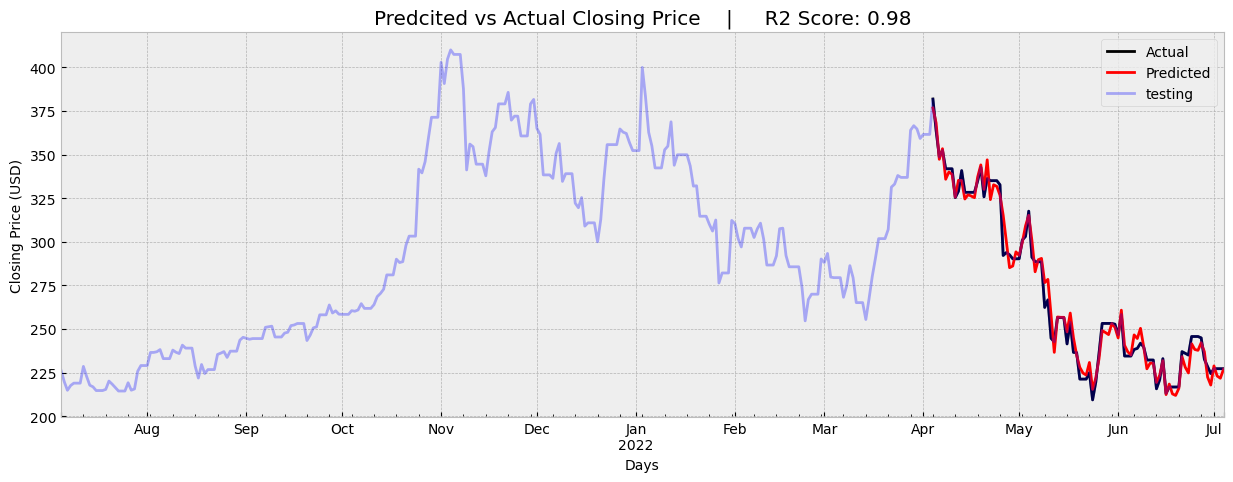

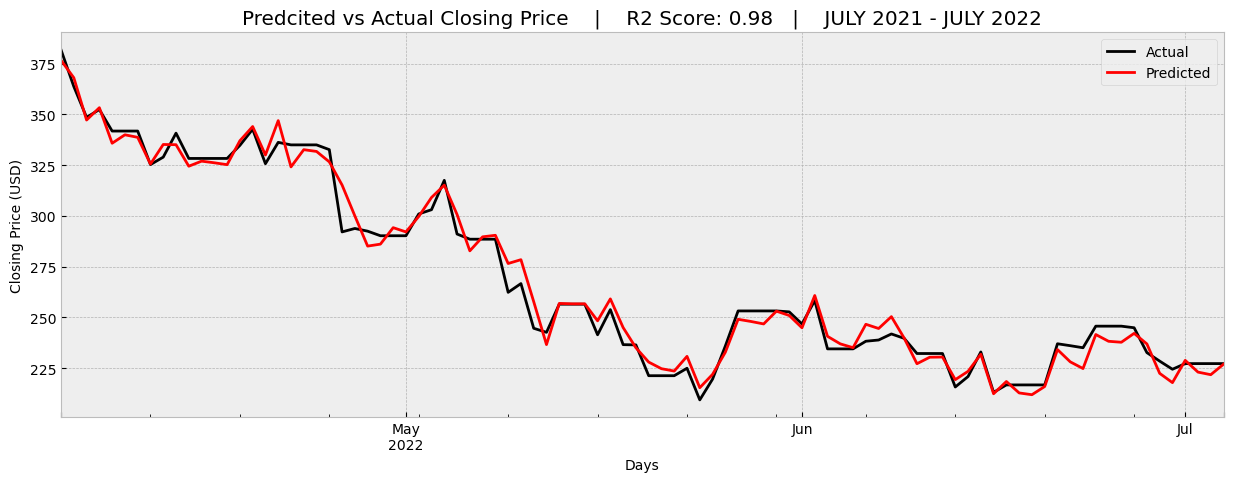

In [ ]:
plot_predictions(pred_svr_test_2, y_test_svr, tsla_svr['Close'], acc_test_svr_2)

## 5.0 XGBoost Model

In [ ]:
tsla_xgb = tsla.copy()

# create a new data frame for XGBoost filtering the data for the Book 1 dates
min_date = '2021-07-05'
max_date = '2022-07-04'

tsla_xgb = tsla_xgb[min_date:max_date]

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", tsla_xgb.shape)
# tsla_svr

The filtered dataframe shape is:  (365, 21)


In [ ]:
# create out split indecies for out training/testing/validating data
# training/validation : test ---> 75%/25%
# training = 60%
# validation = 15%
# testing 25%

train_test_split_xgb, validation_split_xgb = split_data(tsla_xgb)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_xgb, y_train_xgb, X_val_xgb, y_val_xgb, X_test_xgb, y_test_xgb = create_sets(tsla_xgb, train_test_split_xgb, validation_split_xgb, 'Close')

Train set ---> X:(219, 20), y:(219,)
Validation set ---> X:(54, 20), y:(54,)
Test set ---> X:(92, 20), y:(92,)


In [ ]:
# create a ML pipeline for XGBoost

estimator_xgb = [
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(random_state=2023))
]

XGB_pipe = Pipeline(estimator_xgb)

In [ ]:
%%time
xgb = XGB_pipe.fit(X_train_xgb, y_train_xgb)
acc_train_xgb = XGB_pipe.score(X_train_xgb, y_train_xgb)
acc_valid_xgb = XGB_pipe.score(X_val_xgb, y_val_xgb)
acc_test_xgb = XGB_pipe.score(X_test_xgb, y_test_xgb)

print(f"Train accuracy score: {acc_train_xgb}")
print(f"Validation accuracy score: {acc_valid_xgb}")
print(f"Test accuracy score: {acc_test_xgb}")

Train accuracy score: 0.9999999984742529
Validation accuracy score: 0.9082576191205946
Test accuracy score: 0.9617150315684005
CPU times: total: 484 ms
Wall time: 45 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_xgb_valid = xgb.predict(X_val_xgb)
pred_xgb_test = xgb.predict(X_test_xgb)

In [ ]:
# Model Evaluation -- test
mae_xgb = metrics.mean_absolute_error(y_test_xgb, pred_xgb_test)
mse_xgb = metrics.mean_squared_error(y_test_xgb, pred_xgb_test)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_xgb, pred_xgb_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_xgb, pred_xgb_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test))}')

Mean Absolute Error: 7.068146912947946
Mean Squared Error: 80.0368845678699
Root Mean Squared Error: 8.946333582416313


Even without hyperparameter optimization, we can see that the model is performing well.

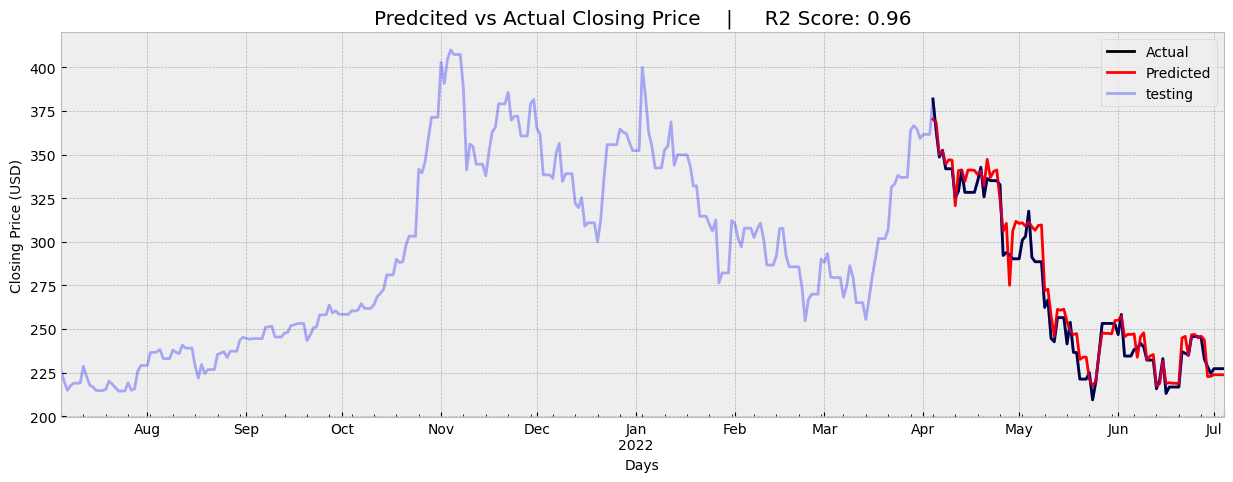

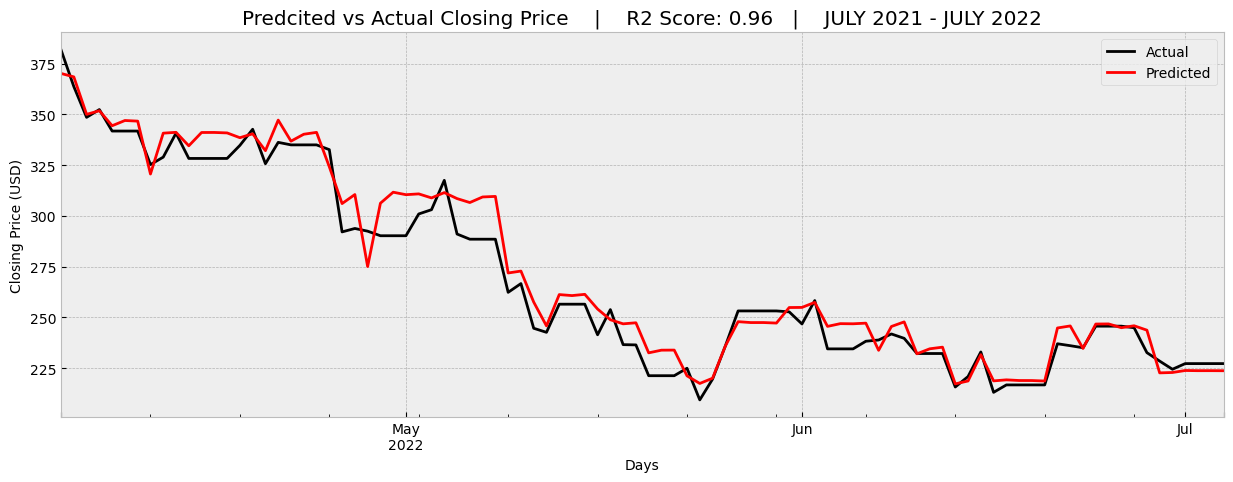

In [ ]:
plot_predictions(pred_xgb_test, y_test_xgb, tsla_xgb['Close'], acc_test_xgb)

### Optimize XGBoost Regression model
The XGBoost model has multiple parameters that we can optimize for our model.

We will use a GridSearchCV for this -- utilize 5-cross fold validation.

***Disclaimer: The gridsearch takes roughly 5min to complete.***

In [ ]:
%%time
# create a dictionary for the model paramaters that we want to optimize
search_param = {
    "n_estimators": [100,150,300,500],
    "max_depth": [1,5,10],
    "gamma": [0.001, 0.1, 1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

# fit and run the gridsearch for our SVR model
GS_xgb = GridSearchCV(XGBRegressor(random_state=2023), search_param, scoring=['r2', 'neg_root_mean_squared_error'], refit='r2', cv=5, verbose=4)
GS_xgb.fit(X_train_xgb, y_train_xgb)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-200.854) r2: (test=-485.695) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-222.775) r2: (test=-520.158) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-294.787) r2: (test=-29.801) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-316.345) r2: (test=-195.712) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=100; neg_root_mean_squared_error: (test=-299.731) r2: (test=-106.993) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-189.540) r2: (

[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=300; neg_root_mean_squared_error: (test=-244.895) r2: (test=-20.257) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=300; neg_root_mean_squared_error: (test=-260.631) r2: (test=-132.525) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=300; neg_root_mean_squared_error: (test=-245.051) r2: (test=-71.184) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=500; neg_root_mean_squared_error: (test=-125.221) r2: (test=-188.169) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=500; neg_root_mean_squared_error: (test=-153.455) r2: (test=-246.287) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=10, n_estimators=500; neg_root_mean_squared_error: (test=-204.001) r2: (test=-13.750) total time=   0.0s
[CV 4/5] END gamma=0.001,

[CV 2/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-59.262) r2: (test=-35.879) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-83.104) r2: (test=-1.448) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-83.214) r2: (test=-12.612) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=150; neg_root_mean_squared_error: (test=-73.290) r2: (test=-5.457) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=300; neg_root_mean_squared_error: (test=-5.895) r2: (test=0.581) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.01, max_depth=10, n_estimators=300; neg_root_mean_squared_error: (test=-16.664) r2: (test=-1.916) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.01, 

[CV 5/5] END gamma=0.001, learning_rate=0.1, max_depth=5, n_estimators=500; neg_root_mean_squared_error: (test=-8.324) r2: (test=0.917) total time=   0.1s
[CV 1/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-6.868) r2: (test=0.431) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-7.284) r2: (test=0.443) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-8.099) r2: (test=0.977) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-11.636) r2: (test=0.734) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_estimators=100; neg_root_mean_squared_error: (test=-8.112) r2: (test=0.921) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.1, max_depth=10, n_est

[CV 4/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-25.429) r2: (test=-0.271) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-18.990) r2: (test=0.567) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=500; neg_root_mean_squared_error: (test=-12.500) r2: (test=-0.885) total time=   0.1s
[CV 2/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=500; neg_root_mean_squared_error: (test=-22.759) r2: (test=-4.439) total time=   0.1s
[CV 3/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=500; neg_root_mean_squared_error: (test=-29.880) r2: (test=0.684) total time=   0.1s
[CV 4/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=500; neg_root_mean_squared_error: (test=-25.429) r2: (test=-0.271) total time=   0.1s
[CV 5/5] END gamma=0.001, learning_rate=1, max_depth=5, n_estimators=500

[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-284.932) r2: (test=-96.591) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-158.764) r2: (test=-303.089) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-184.666) r2: (test=-357.105) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-244.895) r2: (test=-20.257) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-260.631) r2: (test=-132.525) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-245.051) r2: (test=-71.184) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.001

[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-83.104) r2: (test=-1.448) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-83.214) r2: (test=-12.612) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-73.290) r2: (test=-5.457) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-5.895) r2: (test=0.581) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-16.664) r2: (test=-1.916) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=300; neg_root_mean_squared_error: (test=-26.780) r2: (test=0.746) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimat

[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-11.174) r2: (test=0.755) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-8.423) r2: (test=0.915) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-7.143) r2: (test=0.384) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-7.588) r2: (test=0.395) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-7.944) r2: (test=0.978) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150; neg_root_mean_squared_error: (test=-11.169) r2: (test=0.755) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=150; neg_ro

[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-14.368) r2: (test=0.594) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-21.703) r2: (test=0.434) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-12.185) r2: (test=-0.791) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-22.525) r2: (test=-4.328) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-29.763) r2: (test=0.686) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-25.289) r2: (test=-0.257) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=5, n_estimators=100; neg_root_mean

[CV 3/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-244.895) r2: (test=-20.257) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-260.824) r2: (test=-132.723) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-245.080) r2: (test=-71.201) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-124.332) r2: (test=-185.493) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-151.422) r2: (test=-239.778) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=0.001, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-204.294) r2: (test=-13.793) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.001, max_depth=1,

[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-16.235) r2: (test=-2.180) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-15.017) r2: (test=-1.368) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-31.263) r2: (test=0.654) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-28.228) r2: (test=-0.566) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-19.758) r2: (test=0.531) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500; neg_root_mean_squared_error: (test=-18.723) r2: (test=-3.229) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=1, n_estimators=500; neg_r

[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-9.398) r2: (test=0.969) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-10.479) r2: (test=0.784) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-9.056) r2: (test=0.901) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-9.288) r2: (test=-0.041) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-8.013) r2: (test=0.326) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-8.652) r2: (test=0.973) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=1, n_estimators=300; neg_root_mean_square

[CV 3/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-31.983) r2: (test=0.637) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-14.577) r2: (test=0.582) total time=   0.0s
[CV 5/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=150; neg_root_mean_squared_error: (test=-22.569) r2: (test=0.388) total time=   0.0s
[CV 1/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-10.384) r2: (test=-0.301) total time=   0.0s
[CV 2/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-12.877) r2: (test=-0.741) total time=   0.0s
[CV 3/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=300; neg_root_mean_squared_error: (test=-32.718) r2: (test=0.621) total time=   0.0s
[CV 4/5] END gamma=1, learning_rate=1, max_depth=1, n_estimators=300; neg_root_mean_squared_error:

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2023, ...),
             param_grid={'gamma': [0.001, 0.1, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 5, 10],
                         'n_estimators': [100, 150, 300, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [ ]:
print(GS_xgb.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)


In [ ]:
GS_xgb.best_score_

0.7010570100744635

In [ ]:
GS_xgb.best_params_

{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}

### 5.1 Re-run the XGBoost Regressor with the optimized parameters
Can re-run the XGBoost model using:
- n_estimators=150
- max_depth=10
- gamma=0.001
- learning_rate=0.1

In [ ]:
# create a ML pipeline for XGBoost

estimator_xgb = [
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(random_state=2023, n_estimators=150, max_depth=10, gamma=0.001, learning_rate=0.1))
]

XGB_pipe = Pipeline(estimator_xgb)

In [ ]:
%%time
xgb_2 = XGB_pipe.fit(X_train_xgb, y_train_xgb)
acc_train_xgb_2 = XGB_pipe.score(X_train_xgb, y_train_xgb)
acc_valid_xgb_2 = XGB_pipe.score(X_val_xgb, y_val_xgb)
acc_test_xgb_2 = XGB_pipe.score(X_test_xgb, y_test_xgb)

print(f"Train accuracy score: {acc_train_xgb_2}")
print(f"Validation accuracy score: {acc_valid_xgb_2}")
print(f"Test accuracy score: {acc_test_xgb_2}")

Train accuracy score: 0.999999940755661
Validation accuracy score: 0.9289811134306072
Test accuracy score: 0.9748020415524914
CPU times: total: 1 s
Wall time: 84 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_xgb_valid_2 = xgb_2.predict(X_val_xgb)
pred_xgb_test_2 = xgb_2.predict(X_test_xgb)

In [ ]:
# Model Evaluation -- test
mae_xgb_op = metrics.mean_absolute_error(y_test_xgb, pred_xgb_test_2)
mse_xgb_op = metrics.mean_squared_error(y_test_xgb, pred_xgb_test_2)
rmse_xgb_op = np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test_2))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_xgb, pred_xgb_test_2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_xgb, pred_xgb_test_2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test_2))}')

Mean Absolute Error: 5.787913944410241
Mean Squared Error: 52.67775250258908
Root Mean Squared Error: 7.257944096132808


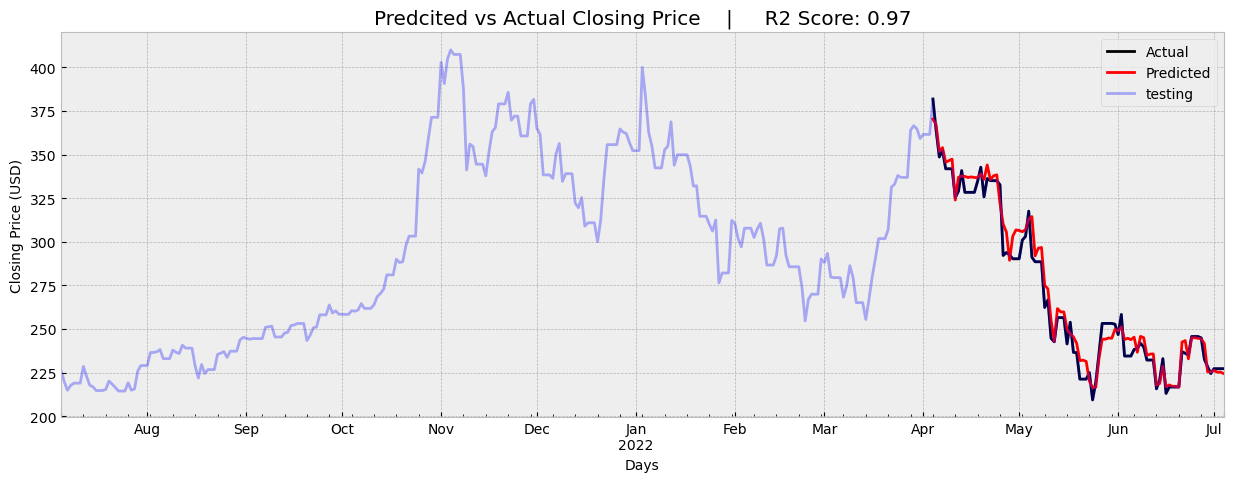

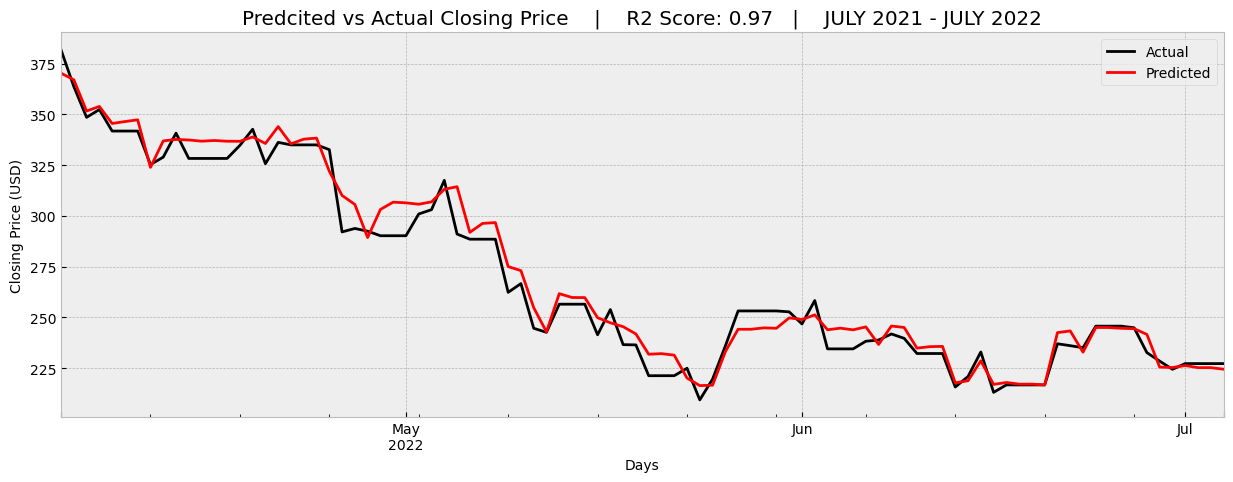

In [ ]:
plot_predictions(pred_xgb_test_2, y_test_xgb, tsla_xgb['Close'], acc_test_xgb_2)

What is the best performing model. To evaluate that we will need to collect all test scores as well as the corresponding error measures.

In [ ]:
dict_performance = {
    'LR_full':{'r2':acc_test_lm, 'MAE':mae_LR, 'MSE':mse_LR, 'RMSE':rmse_LR},
    'LR_filtered':{'r2':acc_test_lm_filter, 'MAE':mae_LR_fil, 'MSE':mse_LR_fil, 'RMSE':rmse_LR_fil},
    'Ridge_full':{'r2':acc_test_l2, 'MAE':mae_ridge, 'MSE':mse_ridge, 'RMSE':rmse_ridge},
    'Ridge_filtered':{'r2':acc_test_l2_filter_, 'MAE':mae_ridge_, 'MSE':mse_ridge_, 'RMSE':rmse_ridge_},
    'Ridge_op':{'r2':acc_test_l2_filter, 'MAE':mae_l2, 'MSE':mse_l2, 'RMSE':rmse_l2},
    'KNN':{'r2':acc_test_knn, 'MAE':mae_knn, 'MSE':mse_knn, 'RMSE':rmse_knn},
    'KNN_op':{'r2':acc_test_knn_2, 'MAE':mae_knn_op, 'MSE':mse_knn_op, 'RMSE':rmse_knn_op},
    'RF':{'r2':acc_test_rf, 'MAE':mae_rf, 'MSE':mse_rf, 'RMSE':rmse_rf},
    'RF_op':{'r2':acc_test_rf_2, 'MAE':mae_rf_op, 'MSE':mse_rf_op, 'RMSE':rmse_rf_op},
    'SVR':{'r2':acc_test_svr, 'MAE':mae_svr, 'MSE':mse_svr, 'RMSE':rmse_svr},
    'SVR_op':{'r2':acc_test_svr_2, 'MAE':mae_svr_op, 'MSE':mse_svr_op, 'RMSE':rmse_svr_op},
    'XGB':{'r2':acc_test_xgb, 'MAE':mae_xgb, 'MSE':mse_xgb, 'RMSE':rmse_xgb},
    'XGB_op':{'r2':acc_test_xgb_op, 'MAE':mae_xgb_op, 'MSE':mse_xgb_op, 'RMSE':rmse_xgb_op},
}

In [ ]:
df_dict = pd.DataFrame(dict_performance)
df_dict = df_dict.T
# df_dict
max_r2 = df_dict['r2'].max()
min_mae = df_dict['MAE'].min()
min_mse = df_dict['MSE'].min()
min_rmse = df_dict['RMSE'].min()

print("r2 max ", max_r2)
print("mae min ", min_mae)
print("mse min ", min_mse)
print("rmse min ", min_rmse)

r2 max  0.9840458069183049
mae min  4.4783225757712755
mse min  33.35313994928616
rmse min  5.775217740422101


In [ ]:
df_dict[df_dict['r2']==max_r2]

r2       MAE       MSE      RMSE
SVR_op  0.984046  4.478323  33.35314  5.775218

Best performing model is SVR optimized.

## 6.0 Model Evaluation for SVR_Optimized - Best Performing Model

In [ ]:
pred_svr_train_2 = svr_2.predict(X_train_svr)

In [ ]:
# Calculate bias for the best performing model
bias = np.mean(y_train_svr - pred_svr_train_2)
bias

1.36001641316301

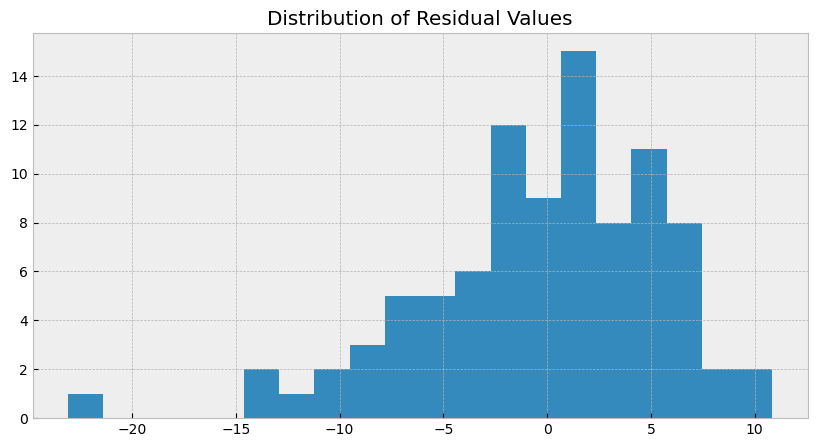

In [ ]:
residuals_svr = y_test_svr - pred_svr_test_2

# Plotting the residuals of the second iteration model

plt.figure(figsize=(10,5))
plt.hist(residuals_svr, bins = 20)
plt.title('Distribution of Residual Values')
plt.show()

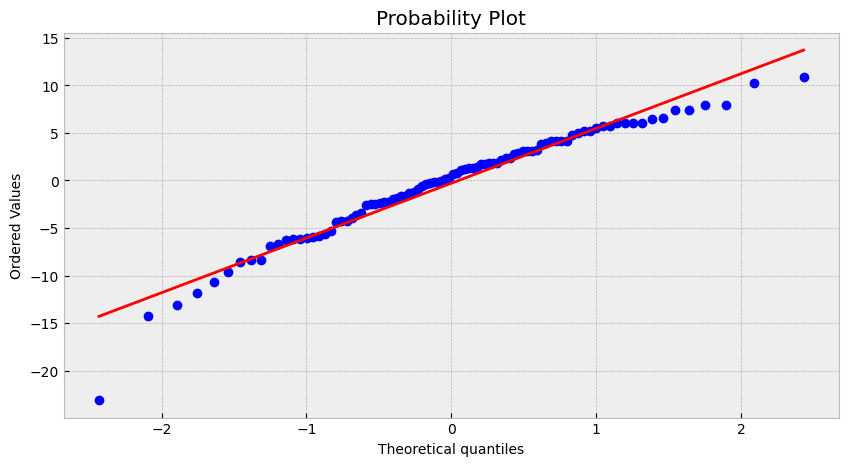

In [ ]:
# Normal Q-Q plot
plt.figure(figsize=(10,5))
stats.probplot(residuals_svr, dist='norm', plot=plt)

plt.show()

From a quick analysis we can see that the model follows closely to a normal distribution, with some outliers. Overall a lot better than the linear regression be started with.

## 7.0 Combine the Sentiment Data with TSLA stock

In [ ]:
# read in the final data from saved data in final submission, store within folder named 'data'
reddit = pd.read_csv('data/final_reddit.csv')

In [ ]:
reddit.head()

date_posted     score       neg       neu       pos  compound  \
0  2021-07-05  4.600000  0.070193  0.734697  0.195124  0.294246   
1  2021-07-06  4.055276  0.098229  0.742857  0.158899  0.159091   
2  2021-07-07  4.123324  0.100220  0.730684  0.169102  0.223818   
3  2021-07-08  3.215159  0.089870  0.742621  0.167494  0.158081   
4  2021-07-09  2.822981  0.090798  0.753494  0.155717  0.161809   

   weighted_sentiment  
0            1.578406  
1            0.720461  
2            1.499726  
3            0.810678  
4            0.284380

In [ ]:
#check to see all the data was transfered correctly
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_posted         365 non-null    object 
 1   score               365 non-null    float64
 2   neg                 365 non-null    float64
 3   neu                 365 non-null    float64
 4   pos                 365 non-null    float64
 5   compound            365 non-null    float64
 6   weighted_sentiment  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


Need to convert the date_posted column to datetime.

In [ ]:
# convert to datetime
reddit['date_posted'] = pd.to_datetime(reddit['date_posted'])

In [ ]:
reddit.shape
print(f"The reddit data contains {reddit.shape[0]} rows and {reddit.shape[1]} columns.")

The reddit data contains 365 rows and 7 columns.


In [ ]:
# just to reverify there are no nulls
reddit.isnull().sum()

date_posted           0
score                 0
neg                   0
neu                   0
pos                   0
compound              0
weighted_sentiment    0
dtype: int64

In [ ]:
# remove the HH:MM:SS in the datetime format
reddit['date_posted'] = reddit['date_posted'].dt.date

In [ ]:
print(reddit['date_posted'].min())
print(min_date)

2021-07-05
2021-07-05


In [ ]:
print(reddit['date_posted'].max())
print(max_date)

2022-07-04
2022-07-04


In [ ]:
reddit

date_posted     score       neg       neu       pos  compound  \
0    2021-07-05  4.600000  0.070193  0.734697  0.195124  0.294246   
1    2021-07-06  4.055276  0.098229  0.742857  0.158899  0.159091   
2    2021-07-07  4.123324  0.100220  0.730684  0.169102  0.223818   
3    2021-07-08  3.215159  0.089870  0.742621  0.167494  0.158081   
4    2021-07-09  2.822981  0.090798  0.753494  0.155717  0.161809   
..          ...       ...       ...       ...       ...       ...   
360  2022-06-30  3.334218  0.119790  0.737374  0.142844  0.107938   
361  2022-07-01  4.423611  0.120368  0.739153  0.140493  0.070402   
362  2022-07-02  6.173252  0.106751  0.739353  0.153881  0.162170   
363  2022-07-03  2.964126  0.102695  0.735341  0.161942  0.182233   
364  2022-07-04  3.597315  0.085698  0.753671  0.160644  0.222813   

     weighted_sentiment  
0              1.578406  
1              0.720461  
2              1.499726  
3              0.810678  
4              0.284380  
..                  ...  
360            0.346758  
361            0.165937  
362            0.269290  
363            0.267852  
364            0.877358  

[365 rows x 7 columns]

#### We only care for the date_posted and weighted_sentiment columns

In [ ]:
# drop all columns except the 2 of interest
reddit = reddit[['date_posted', 'weighted_sentiment']]
# reddit

In [ ]:
# set the index as the date
reddit['date_posted'] = reddit['date_posted'].sort_values()
reddit = reddit.set_index('date_posted')

C:\Users\DhimanS\AppData\Local\Temp\ipykernel_12900\2968612095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit['date_posted'] = reddit['date_posted'].sort_values()


The data is now ready to be merged to the TSLA stock data set.

In [ ]:
# concatenate the 2 date frames
tsla_reddit = pd.concat([tsla[min_date:max_date], reddit], axis=1)

C:\Users\DhimanS\AppData\Local\Temp\ipykernel_12900\4085348462.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  tsla_reddit = pd.concat([tsla[min_date:max_date], reddit], axis=1)


In [ ]:
tsla_reddit

Open        High         Low       Close      Volume  Year  \
2021-07-05  226.326660  233.333328  224.419998  226.300003  81163500.0  2021   
2021-07-06  227.236664  228.000000  217.133331  219.860001  69853500.0  2021   
2021-07-07  221.423340  221.899994  212.773331  214.883331  56376000.0  2021   
2021-07-08  209.456665  218.143326  206.820007  217.603333  68319900.0  2021   
2021-07-09  217.726669  219.636673  214.896667  218.983337  54421500.0  2021   
...                ...         ...         ...         ...         ...   ...   
2022-06-30  224.509995  229.456665  218.863327  224.473328  94600500.0  2022   
2022-07-01  227.000000  230.229996  222.119995  227.263336  74460300.0  2022   
2022-07-02  227.000000  230.229996  222.119995  227.263336  74460300.0  2022   
2022-07-03  227.000000  230.229996  222.119995  227.263336  74460300.0  2022   
2022-07-04  227.000000  230.229996  222.119995  227.263336  74460300.0  2022   

            Month  Day  Previous_Close  Previous_Vol  Price_Movement  weekday  \
2021-07-05      7    5      226.300003    81163500.0               0        0   
2021-07-06      7    6      226.300003    81163500.0              -1        1   
2021-07-07      7    7      219.860001    69853500.0              -1        2   
2021-07-08      7    8      214.883331    56376000.0               1        3   
2021-07-09      7    9      217.603333    68319900.0               1        4   
...           ...  ...             ...           ...             ...      ...   
2022-06-30      6   30      228.490005    82897200.0              -1        3   
2022-07-01      7    1      224.473328    94600500.0               1        4   
2022-07-02      7    2      227.263336    74460300.0               0        5   
2022-07-03      7    3      227.263336    74460300.0               0        6   
2022-07-04      7    4      227.263336    74460300.0               0        0   

            Percent_change        MA_5       MA_20      MA_100      MACD  \
2021-07-05       -2.845781  226.288000  217.518335  217.208534  5.819767   
2021-07-06       -2.263563  226.234668  218.844002  217.409167  5.631671   
2021-07-07        1.265804  225.012003  219.755835  217.545401  4.906391   
2021-07-08        0.634184  222.728668  220.223335  217.656600  3.885240   
2021-07-09        0.000000  220.989334  220.715001  217.713900  3.257896   
...                    ...         ...         ...         ...       ...   
2022-06-30        1.242913  239.497333  229.892165  281.761567 -0.548794   
2022-07-01        0.000000  235.250665  229.504332  280.693034 -1.336349   
2022-07-02        0.000000  231.562000  229.255999  279.635300 -1.715585   
2022-07-03        0.000000  228.030667  229.007666  278.528200 -1.993157   
2022-07-04        2.553570  226.950668  229.584000  277.432034 -2.187913   

            MACD_signal       BOL_U       BOL_L  log_momentum  \
2021-07-05     5.275038  238.177187  196.859483      5.417433   
2021-07-06     5.346365  238.064614  199.623390      5.417433   
2021-07-07     5.258370  237.183301  202.328369      5.388432   
2021-07-08     4.983744  236.508585  203.938084      5.365431   
2021-07-09     4.638575  235.978917  205.451085      5.378068   
...                 ...         ...         ...           ...   
2022-06-30    -2.240521  252.282326  207.502005      5.427106   
2022-07-01    -2.059686  251.992489  207.016175      5.409292   
2022-07-02    -1.990866  251.727109  206.784889      5.421700   
2022-07-03    -1.991324  251.450148  206.565184      5.421700   
2022-07-04    -2.030642  251.167077  208.000922      5.421700   

            weighted_sentiment  
2021-07-05            1.578406  
2021-07-06            0.720461  
2021-07-07            1.499726  
2021-07-08            0.810678  
2021-07-09            0.284380  
...                        ...  
2022-06-30            0.346758  
2022-07-01            0.165937  
2022-07-02            0.269290  
2022-07-03            0.267852  
2022-07-04            0.877

In [ ]:
# check to see if all values are still there and there are no nulls
tsla_reddit.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Year                  0
Month                 0
Day                   0
Previous_Close        0
Previous_Vol          0
Price_Movement        0
weekday               0
Percent_change        0
MA_5                  0
MA_20                 0
MA_100                0
MACD                  0
MACD_signal           0
BOL_U                 0
BOL_L                 0
log_momentum          0
weighted_sentiment    0
dtype: int64

# 8.0 Re-Run all Models with Sentiment data

### 8.1 Ridge Regression with Sentiment


In [ ]:
ridge_df = tsla_reddit.copy()

# print the shape of the filtered data frame
print("The filtered linear regression dataframe shape is: ", ridge_df.shape)

The filtered linear regression dataframe shape is:  (365, 22)


In [ ]:
# create out split indecies for out training/testing/validating data
# percentage splits are already set to default for the function
train_test_split_ridge, validation_split_ridge = split_data(ridge_df)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_ridge, y_train_ridge, X_val_ridge, y_val_ridge, X_test_ridge, y_test_ridge = create_sets(ridge_df, train_test_split_ridge, validation_split_ridge, 'Close')

Train set ---> X:(219, 21), y:(219,)
Validation set ---> X:(54, 21), y:(54,)
Test set ---> X:(92, 21), y:(92,)


In [ ]:
# create a ML pipeline for Ridge Regression
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=50, random_state=2023))
]
L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
l2_ridge = L2_pipe.fit(X_train_ridge, y_train_ridge)
acc_train_ridge = L2_pipe.score(X_train_ridge, y_train_ridge)
acc_valid_ridge = L2_pipe.score(X_val_ridge, y_val_ridge)
acc_test_ridge = L2_pipe.score(X_test_ridge, y_test_ridge)

print(f"Train accuracy score: {acc_train_ridge}")
print(f"Validation accuracy score: {acc_valid_ridge}")
print(f"Test accuracy score: {acc_test_ridge}")

Train accuracy score: 0.921612660651588
Validation accuracy score: 0.7764354484527357
Test accuracy score: 0.8311647120115636
CPU times: total: 0 ns
Wall time: 7 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_ridge_valid = l2_ridge.predict(X_val_ridge)
pred_ridge_test = l2_ridge.predict(X_test_ridge)

In [ ]:
# Model Evaluation -- test
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_ridge, pred_ridge_test)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_ridge, pred_ridge_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_ridge, pred_ridge_test))}')

Mean Absolute Error: 15.909513479362692
Mean Squared Error: 352.95968651133114
Root Mean Squared Error: 18.787221362174108


In [ ]:
# plot_predictions(pred_ridge_test, y_test_ridge, ridge_df['Close'], acc_test_ridge)

In [ ]:
def plot_sent(predicted_data, predicted_data_sent, y_testing_data, X_testing_data, accuracy_score, accuracy_score_sent):
  '''
  Function to plot the predicted data vs the actual
  '''
  d_test = pd.DataFrame(y_testing_data)
  d_test['Predictions'] = predicted_data
  d_test['Prediction_sentiment'] = predicted_data_sent
  d_test['Actual'] = d_test['Close']


  plt.figure(figsize=(15,5))
  d_test['Actual'].plot(kind='line', c='black', label='Actual')
  d_test['Predictions'].plot(kind='line', c='red',label='Predicted')
  d_test['Prediction_sentiment'].plot(kind='line', c='green',label='Predicted_with_sentiment')
  X_testing_data.plot(kind='line', c='blue', label='testing', alpha=0.3)
  plt.legend()
  plt.xlabel('Days')
  plt.ylabel('Closing Price (USD)')
  plt.title(f'Predcited vs Actual Closing Price | R2 Score: {round(accuracy_score,2)} | R2 Score_Sentiment: {round(accuracy_score_sent,2)}')

  # plt.figure(figsize=(15,5))
  # plt.plot(range(len(y_testing_data)), y_testing_data, c='blue', label='acutal price')
  # plt.plot(predicted_data, c='red', label='predicted price')

  plt.figure(figsize=(15,5))
  d_test['Actual'].plot(kind='line', c='black', label='Actual')
  d_test['Predictions'].plot(kind='line', c='red',label='Predicted')
  d_test['Prediction_sentiment'].plot(kind='line', c='green',label='Predicted_with_sentiment')
  plt.legend()
  plt.xlabel('Days')
  plt.ylabel('Closing Price (USD)')
  plt.title(f'Predcited vs Actual Closing Price | R2 Score: {round(accuracy_score,2)} | R2 Score_Sentiment: {round(accuracy_score_sent,2)} | JULY 2021 - JULY 2022')

  plt.show()

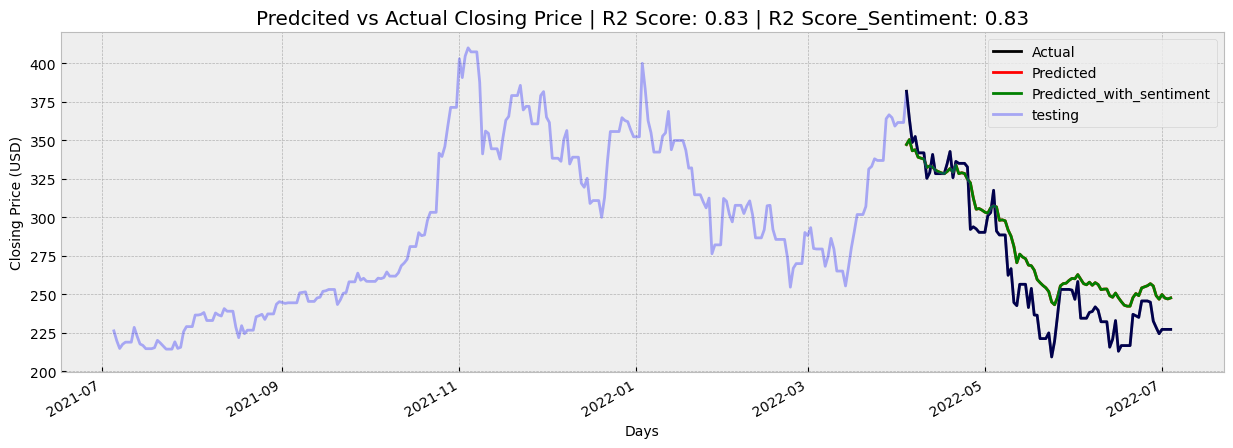

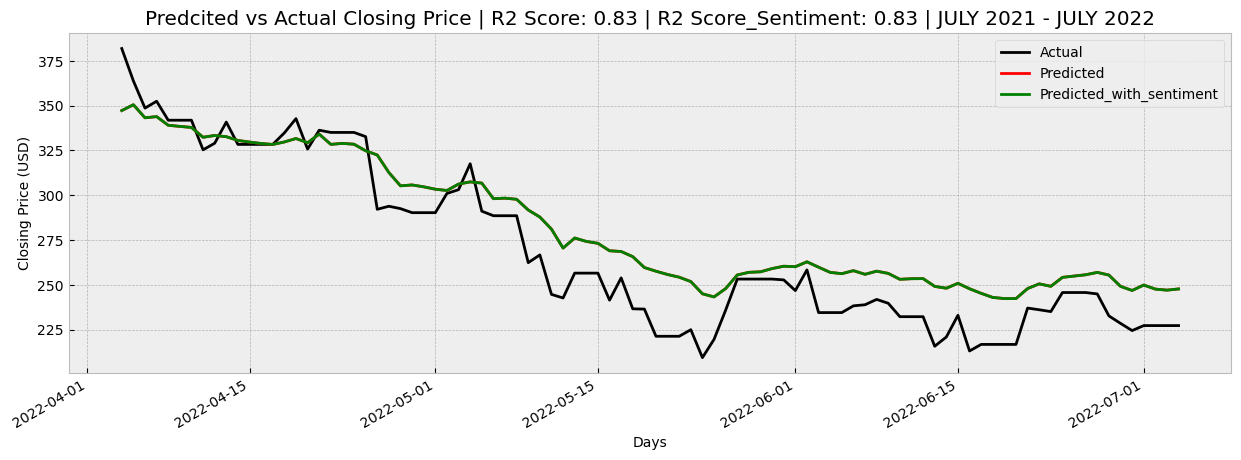

In [ ]:
plot_sent(pred_l2_test_filter_, pred_ridge_test, y_test_ridge, ridge_df['Close'], acc_test_l2_filter_, acc_test_ridge)

### 8.1.1 Ridge Regression with Sentiment -- Optimized (alpha=10)

In [ ]:
# create a ML pipeline for Ridge Regression
estimator_L2 = [
    ('scaler', MinMaxScaler()),
    ('model', Ridge(alpha=10, random_state=2023))
]
L2_pipe = Pipeline(estimator_L2)

In [ ]:
%%time
l2_ridge_op = L2_pipe.fit(X_train_ridge, y_train_ridge)
acc_train_ridge_op = L2_pipe.score(X_train_ridge, y_train_ridge)
acc_valid_ridge_op = L2_pipe.score(X_val_ridge, y_val_ridge)
acc_test_ridge_op = L2_pipe.score(X_test_ridge, y_test_ridge)

print(f"Train accuracy score: {acc_train_ridge_op}")
print(f"Validation accuracy score: {acc_valid_ridge_op}")
print(f"Test accuracy score: {acc_test_ridge_op}")

Train accuracy score: 0.9771352177389163
Validation accuracy score: 0.9275037142538209
Test accuracy score: 0.9511463971881983
CPU times: total: 15.6 ms
Wall time: 7 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_ridge_valid_op = l2_ridge_op.predict(X_val_ridge)
pred_ridge_test_op = l2_ridge_op.predict(X_test_ridge)

In [ ]:
# Model Evaluation -- test
mae_ridge_sent = metrics.mean_absolute_error(y_test_ridge, pred_ridge_test_op)
mse_ridge_sent = metrics.mean_squared_error(y_test_ridge, pred_ridge_test_op)
rmse_ridge_sent = np.sqrt(metrics.mean_squared_error(y_test_ridge, pred_ridge_test_op))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_ridge, pred_ridge_test_op)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_ridge, pred_ridge_test_op)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_ridge, pred_ridge_test_op))}')

Mean Absolute Error: 8.12418698776045
Mean Squared Error: 102.13121047647111
Root Mean Squared Error: 10.10599873720906


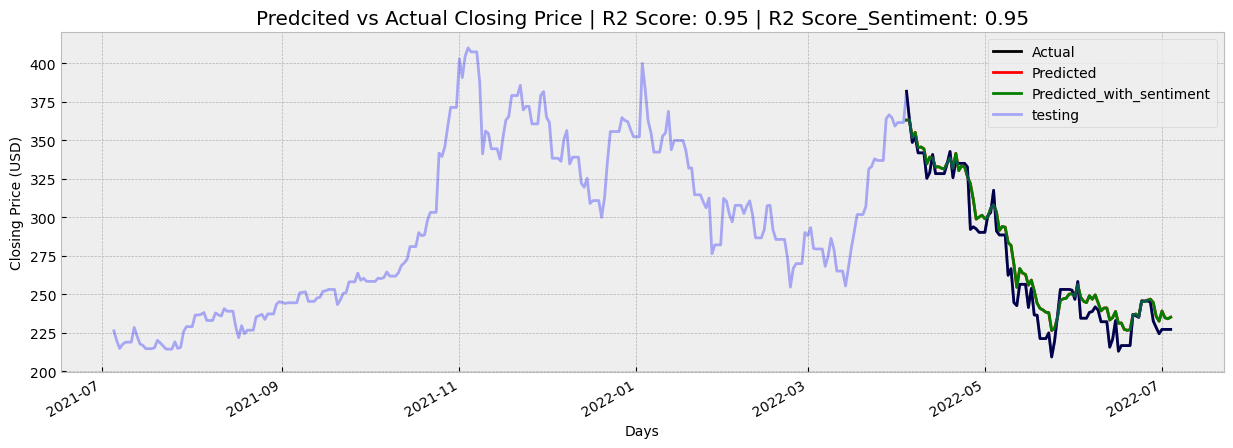

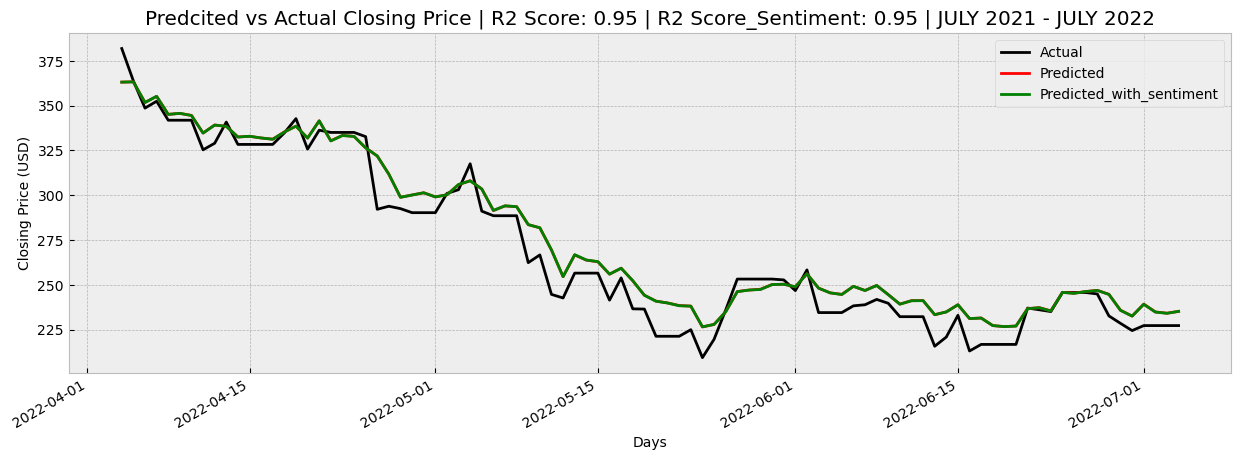

In [ ]:
plot_sent(pred_l2_test_filter, pred_ridge_test_op, y_test_ridge, ridge_df['Close'], acc_test_l2_filter, acc_test_ridge_op)

For Ridge regression with sentiment, we saw a slight increase in performance for the non-optimized model, and virually no difference with the optimized models.

### 8.2 KNN Regression with Sentiment


In [ ]:
knn_df = tsla_reddit.copy()

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", knn_df.shape)

The filtered dataframe shape is:  (365, 22)


In [ ]:
train_test_split_knn, validation_split_knn = split_data(knn_df)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_knn, y_train_knn, X_val_knn, y_val_knn, X_test_knn, y_test_knn = create_sets(knn_df, train_test_split_knn, validation_split_knn, 'Close')

Train set ---> X:(219, 21), y:(219,)
Validation set ---> X:(54, 21), y:(54,)
Test set ---> X:(92, 21), y:(92,)


In [ ]:
# create a ML pipeline for KNN Regressor

estimator_knn = [
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5)) # set n_neighbors to 5 as default
]

KNN_pipe = Pipeline(estimator_knn)

In [ ]:
%%time
# initialize with the KNN Regressor
knn_ = KNN_pipe.fit(X_train_knn, y_train_knn)
acc_train_knn_ = KNN_pipe.score(X_train_knn, y_train_knn)
acc_valid_knn_ = KNN_pipe.score(X_val_knn, y_val_knn)
acc_test_knn_ = KNN_pipe.score(X_test_knn, y_test_knn)

print(f"Train accuracy score: {acc_train_knn_}")
print(f"Validation accuracy score: {acc_valid_knn_}")
print(f"Test accuracy score: {acc_test_knn_}")

Train accuracy score: 0.976137144128055
Validation accuracy score: 0.5247219805133702
Test accuracy score: 0.6505941913476422
CPU times: total: 1.06 s
Wall time: 87 ms


In [ ]:
pred_knn_valid_ = knn_.predict(X_val_knn)
pred_knn_test_ = knn_.predict(X_test_knn)

In [ ]:
# Model Evaluation -- test
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_knn, pred_knn_test_)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_knn, pred_knn_test_)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test_))}')

Mean Absolute Error: 19.35247855808424
Mean Squared Error: 730.4525384268071
Root Mean Squared Error: 27.026885474038757


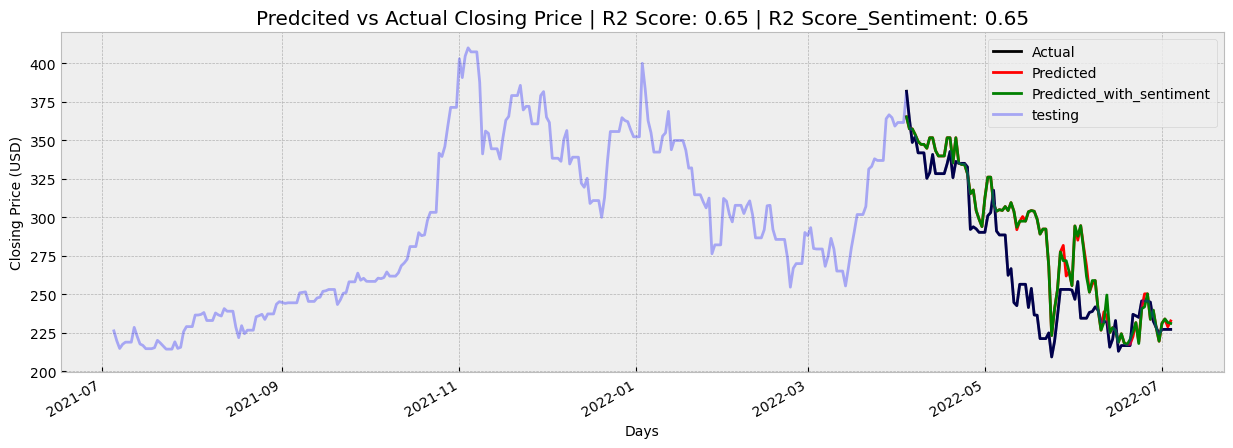

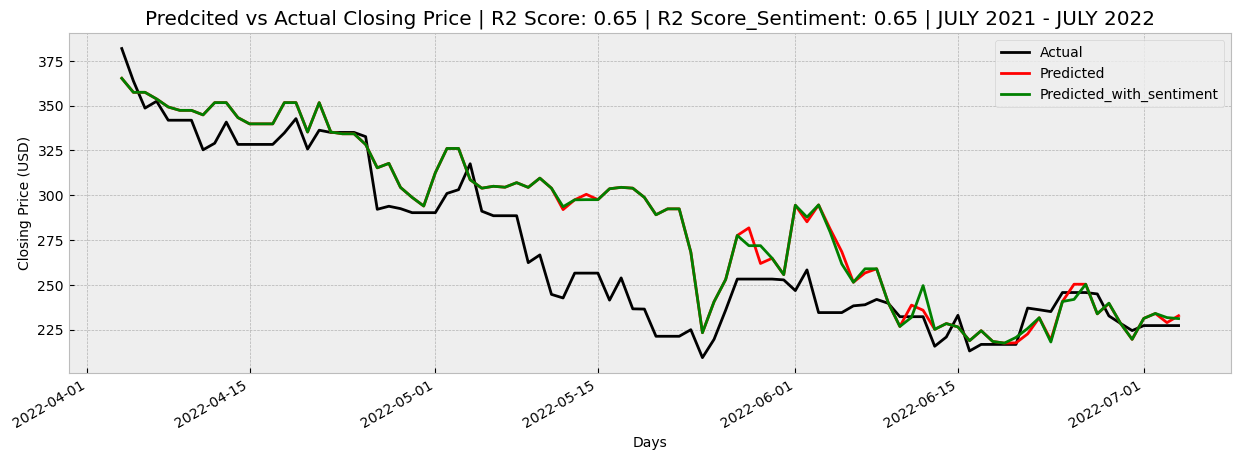

In [ ]:
plot_sent(pred_knn_test, pred_knn_test_, y_test_knn, knn_df['Close'], acc_test_knn, acc_test_knn_)

### 8.2.1 KNN Regression with Sentiment -- Optimized (k=100)

In [ ]:
# create a ML pipeline for KNN Regressor

estimator_knn = [
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=100)) # set n_neighbors to 5 as default
]

KNN_pipe = Pipeline(estimator_knn)

In [ ]:
%%time
# initialize with the KNN Regressor
knn_op = KNN_pipe.fit(X_train_knn, y_train_knn)
acc_train_knn_op = KNN_pipe.score(X_train_knn, y_train_knn)
acc_valid_knn_op = KNN_pipe.score(X_val_knn, y_val_knn)
acc_test_knn_op = KNN_pipe.score(X_test_knn, y_test_knn)

print(f"Train accuracy score: {acc_train_knn_op}")
print(f"Validation accuracy score: {acc_valid_knn_op}")
print(f"Test accuracy score: {acc_test_knn_op}")

Train accuracy score: 0.8545002067369258
Validation accuracy score: 0.7635659331759587
Test accuracy score: 0.8334662516238527
CPU times: total: 922 ms
Wall time: 92 ms


In [ ]:
pred_knn_valid_op = knn_op.predict(X_val_knn)
pred_knn_test_op = knn_op.predict(X_test_knn)

In [ ]:
# Model Evaluation -- test
mae_knn_sent = metrics.mean_absolute_error(y_test_knn, pred_knn_test_op)
mse_knn_sent = metrics.mean_squared_error(y_test_knn, pred_knn_test_op)
rmse_knn_sent = np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test_op))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_knn, pred_knn_test_op)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_knn, pred_knn_test_op)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn_test_op))}')

Mean Absolute Error: 14.997341333472209
Mean Squared Error: 348.14818821778374
Root Mean Squared Error: 18.65872954458003


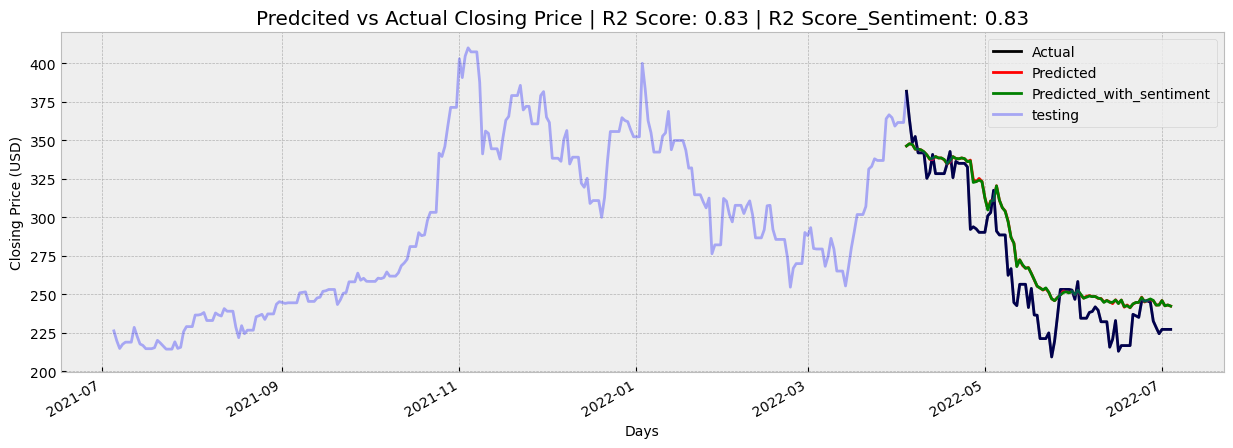

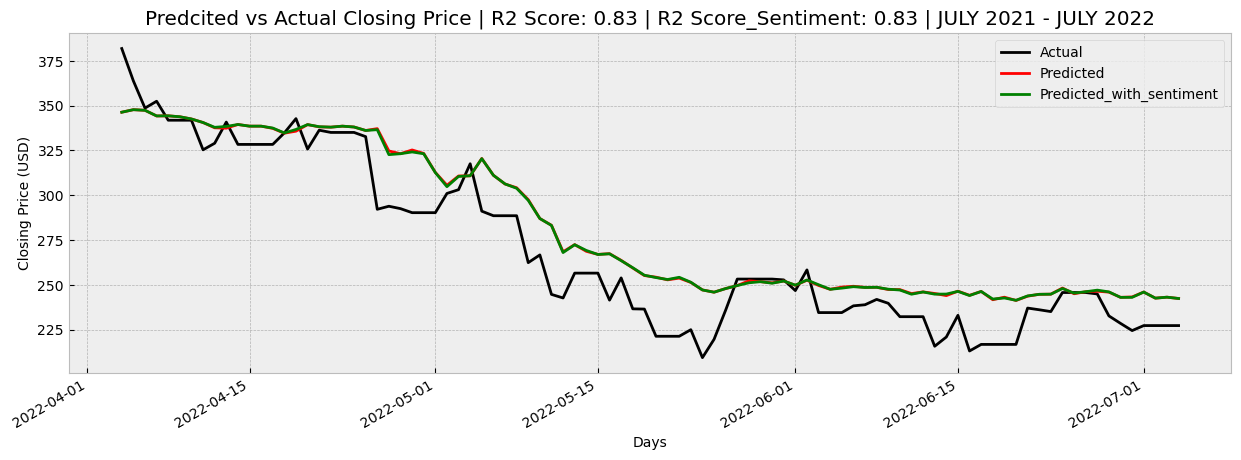

In [ ]:
plot_sent(pred_knn_test_2, pred_knn_test_op, y_test_knn, knn_df['Close'], acc_test_knn_2, acc_test_knn_op)

Running with the Sentiment made little to no difference for KNN without or with optimization.


### 8.3 Random Forest Regressor with Sentiment

In [ ]:
rf_df = tsla_reddit.copy()

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", tsla_rf.shape)

The filtered dataframe shape is:  (365, 21)


In [ ]:
train_test_split_rf, validation_split_rf = split_data(rf_df)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_rf, y_train_rf, X_val_rf, y_val_rf, X_test_rf, y_test_rf = create_sets(rf_df, train_test_split_rf, validation_split_rf, 'Close')

Train set ---> X:(219, 21), y:(219,)
Validation set ---> X:(54, 21), y:(54,)
Test set ---> X:(92, 21), y:(92,)


In [ ]:
# create a ML pipeline for Random Forest Regressor

estimator_rf = [
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(random_state=2023))
]

RF_pipe = Pipeline(estimator_rf)

In [ ]:
%%time
rf_ = RF_pipe.fit(X_train_rf, y_train_rf)
acc_train_rf_ = RF_pipe.score(X_train_rf, y_train_rf)
acc_valid_rf_ = RF_pipe.score(X_val_rf, y_val_rf)
acc_test_rf_ = RF_pipe.score(X_test_rf, y_test_rf)

print(f"Train accuracy score: {acc_train_rf_}")
print(f"Validation accuracy score: {acc_valid_rf_}")
print(f"Test accuracy score: {acc_test_rf_}")

Train accuracy score: 0.998937029915772
Validation accuracy score: 0.9311833496275087
Test accuracy score: 0.9701012100017462
CPU times: total: 203 ms
Wall time: 207 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_rf_valid_ = rf_.predict(X_val_rf)
pred_rf_test_ = rf_.predict(X_test_rf)

In [ ]:
# Model Evaluation -- test
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_rf, pred_rf_test_)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_rf, pred_rf_test_)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test_))}')

Mean Absolute Error: 6.2839284531966495
Mean Squared Error: 62.505105837676254
Root Mean Squared Error: 7.9060170653544795


We see model improvements compared to the non-sentiment model.

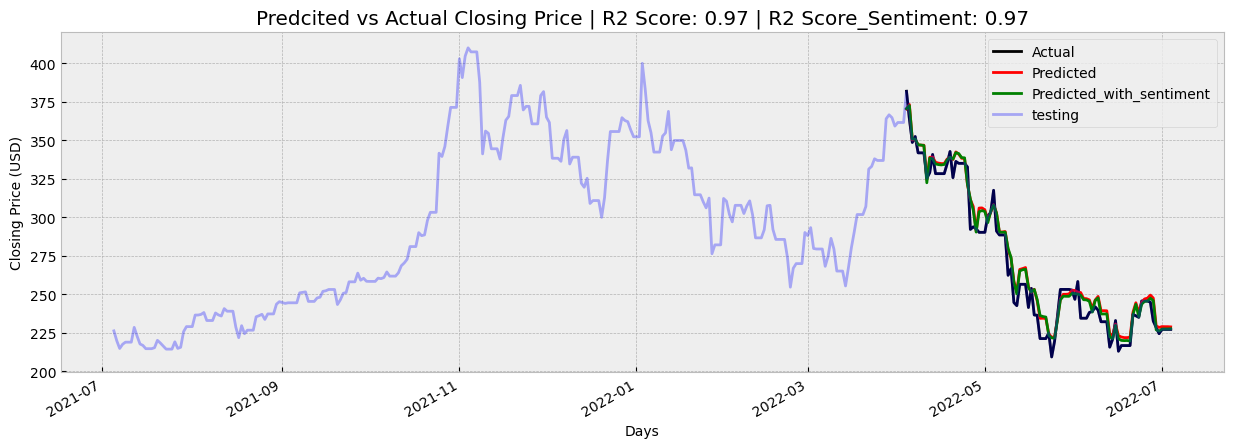

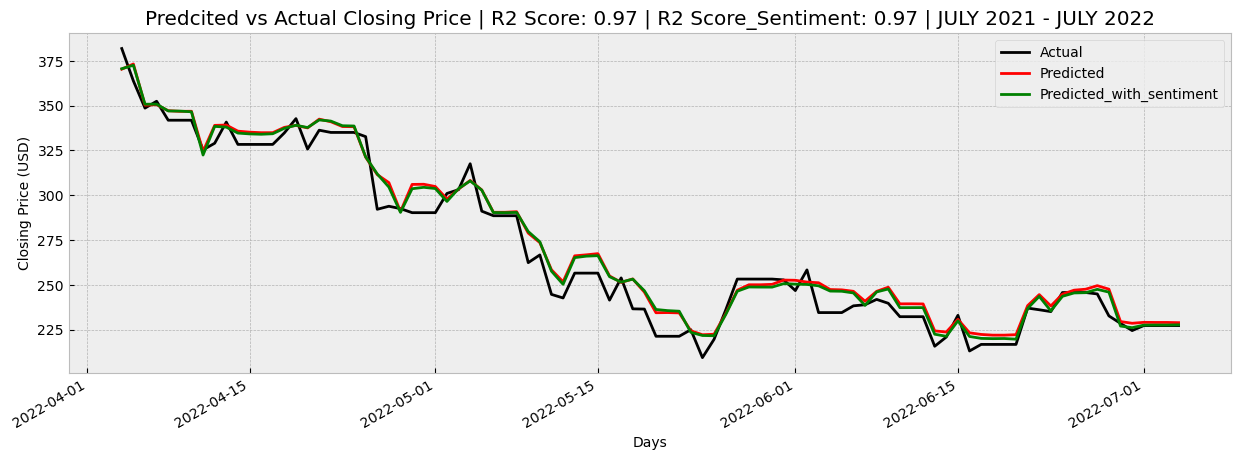

In [ ]:
plot_sent(pred_rf_test, pred_rf_test_, y_test_rf, tsla_rf['Close'], acc_test_rf, acc_test_rf_)

### 8.3.1 Random Forest Regressor with Sentiment -- Optimized (max_depth=15, n_estimators=100)

In [ ]:
estimator_rf = [
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(max_depth=15, n_estimators=100, random_state=2023))
]

RF_pipe = Pipeline(estimator_rf)

In [ ]:
%%time
rf_op = RF_pipe.fit(X_train_rf, y_train_rf)
acc_train_rf_op = RF_pipe.score(X_train_rf, y_train_rf)
acc_valid_rf_op = RF_pipe.score(X_val_rf, y_val_rf)
acc_test_rf_op = RF_pipe.score(X_test_rf, y_test_rf)

print(f"Train accuracy score: {acc_train_rf_op}")
print(f"Validation accuracy score: {acc_valid_rf_op}")
print(f"Test accuracy score: {acc_test_rf_op}")

Train accuracy score: 0.998937029915772
Validation accuracy score: 0.9311833496275087
Test accuracy score: 0.9701012100017462
CPU times: total: 203 ms
Wall time: 206 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_rf_valid_op = rf_op.predict(X_val_rf)
pred_rf_test_op = rf_op.predict(X_test_rf)

In [ ]:
# Model Evaluation -- test
mae_rf_sent = metrics.mean_absolute_error(y_test_rf, pred_rf_test_op)
mse_rf_sent = metrics.mean_squared_error(y_test_rf, pred_rf_test_op)
rmse_rf_sent = np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test_op))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_rf, pred_rf_test_op)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_rf, pred_rf_test_op)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_rf, pred_rf_test_op))}')

Mean Absolute Error: 6.2839284531966495
Mean Squared Error: 62.505105837676254
Root Mean Squared Error: 7.9060170653544795


We see the same improvements as above (just like before, with hyperparameter optimization, we get the same results).

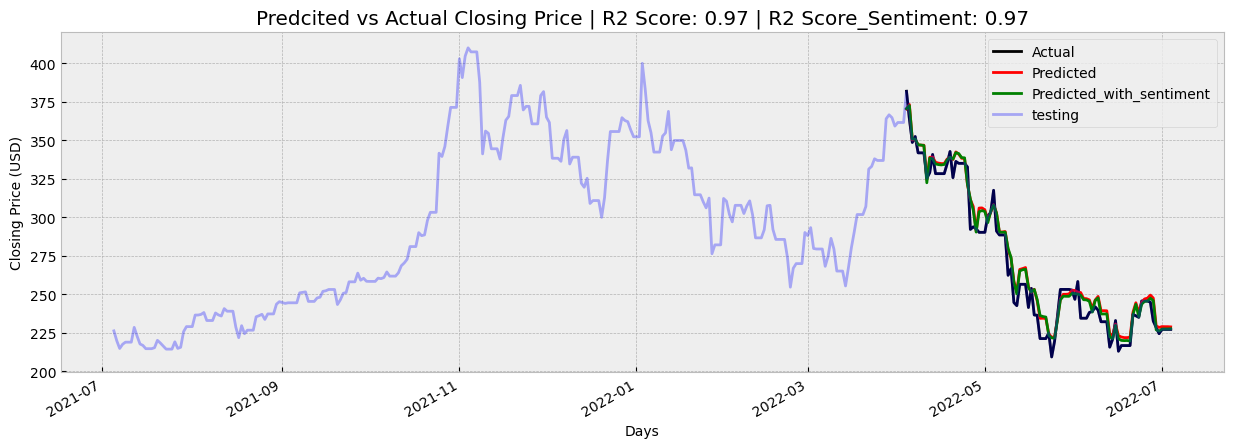

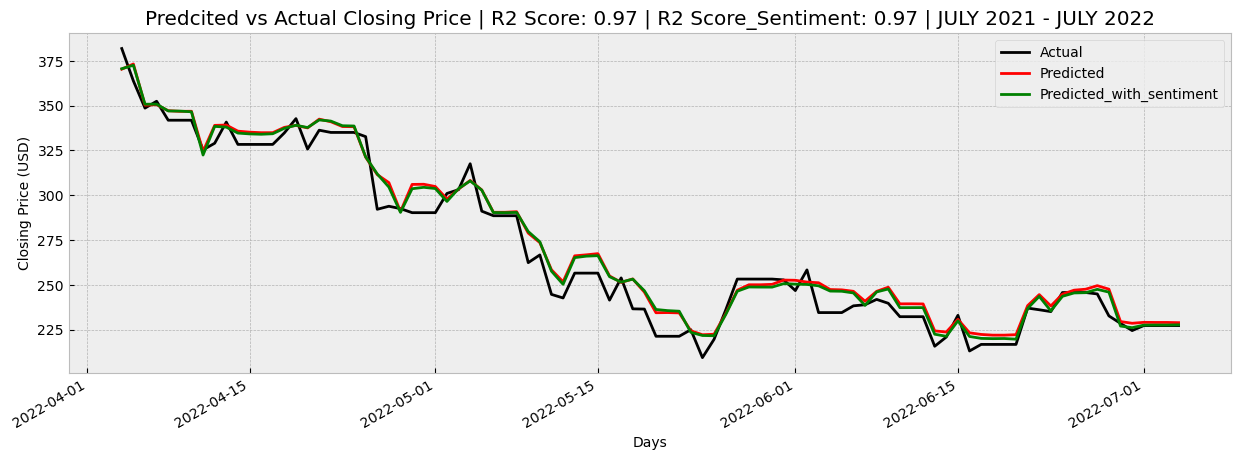

In [ ]:
plot_sent(pred_rf_test_2, pred_rf_test_op, y_test_rf, tsla_rf['Close'], acc_test_rf_2, acc_test_rf_op)

### 8.4 SVR with Sentiment

In [ ]:
svr_df = tsla_reddit.copy()


# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", svr_df.shape)

The filtered dataframe shape is:  (365, 22)


In [ ]:
train_test_split_svr, validation_split_svr = split_data(svr_df)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_svr, y_train_svr, X_val_svr, y_val_svr, X_test_svr, y_test_svr = create_sets(svr_df, train_test_split_svr, validation_split_svr, 'Close')

Train set ---> X:(219, 21), y:(219,)
Validation set ---> X:(54, 21), y:(54,)
Test set ---> X:(92, 21), y:(92,)


In [ ]:
# create a ML pipeline for SVR

estimator_svr = [
    ('scaler', MinMaxScaler()),
    ('model', SVR(gamma='auto'))
]

SVR_pipe = Pipeline(estimator_svr)

In [ ]:
%%time
svr_ = SVR_pipe.fit(X_train_svr, y_train_svr)
acc_train_svr_ = SVR_pipe.score(X_train_svr, y_train_svr)
acc_valid_svr_ = SVR_pipe.score(X_val_svr, y_val_svr)
acc_test_svr_ = SVR_pipe.score(X_test_svr, y_test_svr)

print(f"Train accuracy score: {acc_train_svr_}")
print(f"Validation accuracy score: {acc_valid_svr_}")
print(f"Test accuracy score: {acc_test_svr_}")

Train accuracy score: 0.41961029932162464
Validation accuracy score: 0.21373682746278222
Test accuracy score: 0.21347926628654845
CPU times: total: 15.6 ms
Wall time: 14 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_svr_valid_ = svr_.predict(X_val_svr)
pred_svr_test_ = svr_.predict(X_test_svr)

In [ ]:
# Model Evaluation -- test
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_svr, pred_svr_test_)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_svr, pred_svr_test_)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test_))}')

Mean Absolute Error: 36.90638933325126
Mean Squared Error: 1644.2659287267938
Root Mean Squared Error: 40.54954905700918


We see the same poor performance as without sentiment scoring.

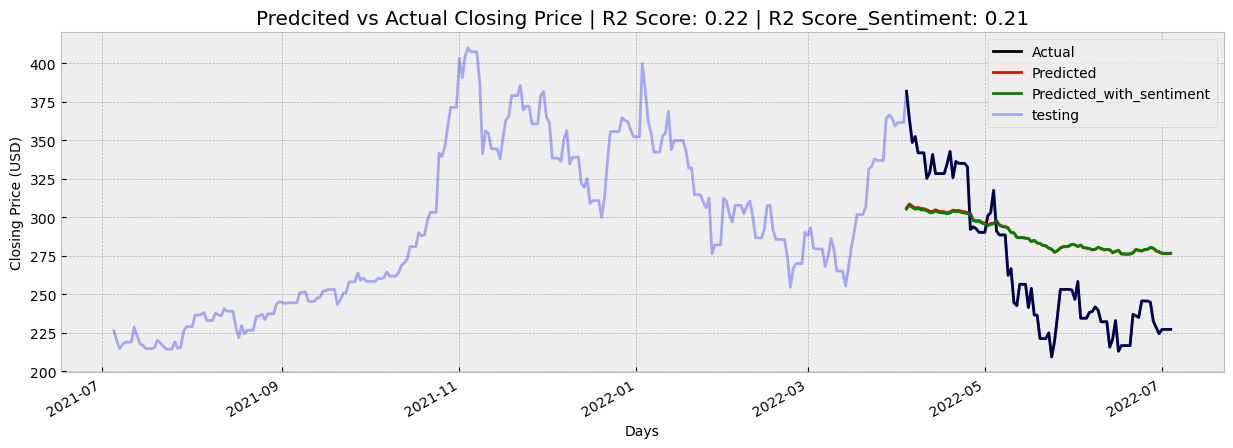

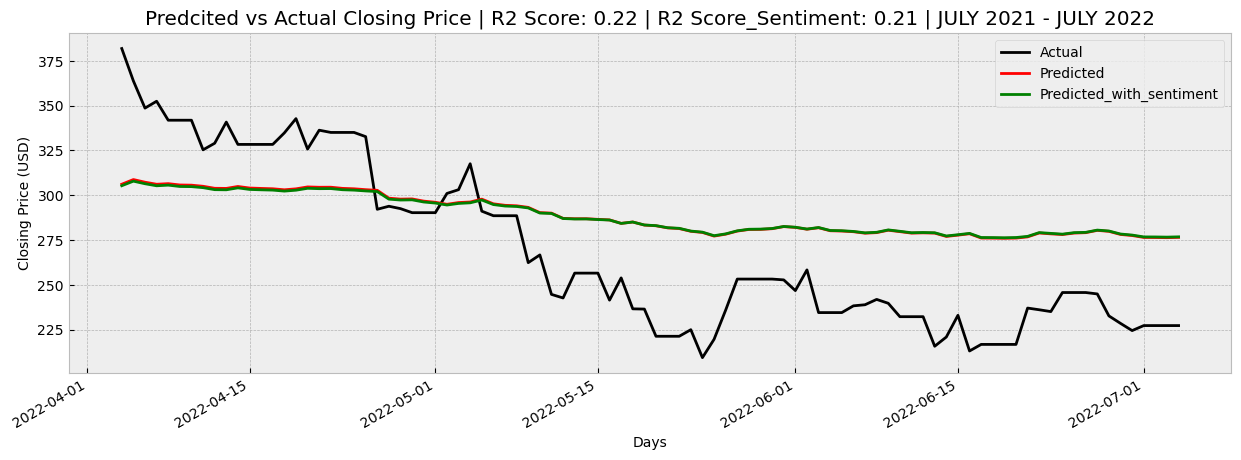

In [ ]:
plot_sent(pred_svr_test, pred_svr_test_, y_test_svr, tsla_svr['Close'], acc_test_svr, acc_test_svr_)

### 8.4.1 SVR with Sentiment -- Optimized (C=80, eplsilon=10, kernel=linear)

In [ ]:
estimator_svr = [
    ('scaler', MinMaxScaler()),
    ('model', SVR(gamma='auto', kernel='linear', epsilon=10, C=80))
]

SVR_pipe = Pipeline(estimator_svr)

In [ ]:
%%time
svr_op = SVR_pipe.fit(X_train_svr, y_train_svr)
acc_train_svr_op = SVR_pipe.score(X_train_svr, y_train_svr)
acc_valid_svr_op = SVR_pipe.score(X_val_svr, y_val_svr)
acc_test_svr_op = SVR_pipe.score(X_test_svr, y_test_svr)

print(f"Train accuracy score: {acc_train_svr_op}")
print(f"Validation accuracy score: {acc_valid_svr_op}")
print(f"Test accuracy score: {acc_test_svr_op}")

Train accuracy score: 0.9883076116526591
Validation accuracy score: 0.9762794652731633
Test accuracy score: 0.9842115000900569
CPU times: total: 0 ns
Wall time: 8 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_svr_valid_op = svr_op.predict(X_val_svr)
pred_svr_test_op = svr_op.predict(X_test_svr)

In [ ]:
# Model Evaluation -- test
mae_svr_sent = metrics.mean_absolute_error(y_test_svr, pred_svr_test_op)
mse_svr_sent  =metrics.mean_squared_error(y_test_svr, pred_svr_test_op)
rmse_svr_sent  =np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test_op))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_svr, pred_svr_test_op)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_svr, pred_svr_test_op)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_svr, pred_svr_test_op))}')

Mean Absolute Error: 4.446708601942024
Mean Squared Error: 33.00674903388319
Root Mean Squared Error: 5.7451500445056425


We see another model performance, slighlty.

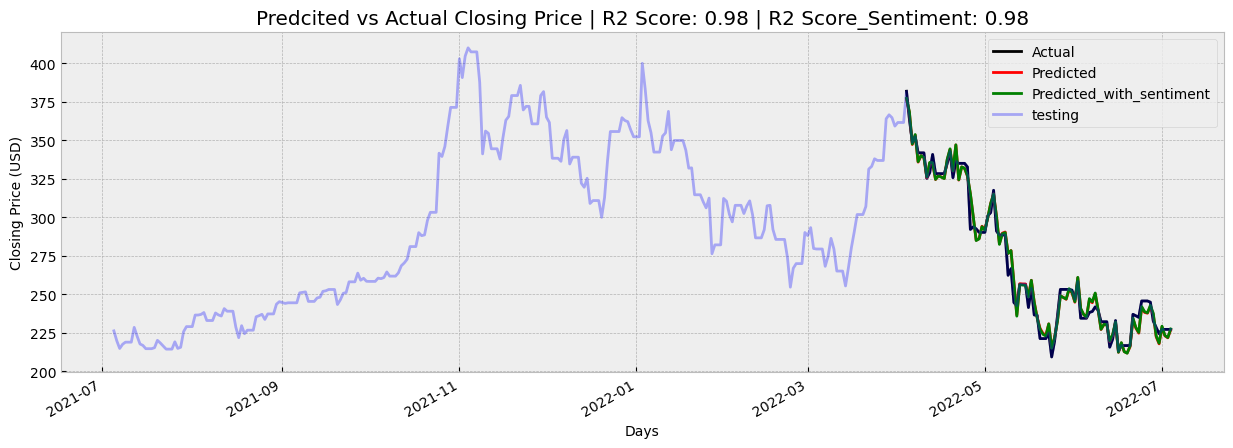

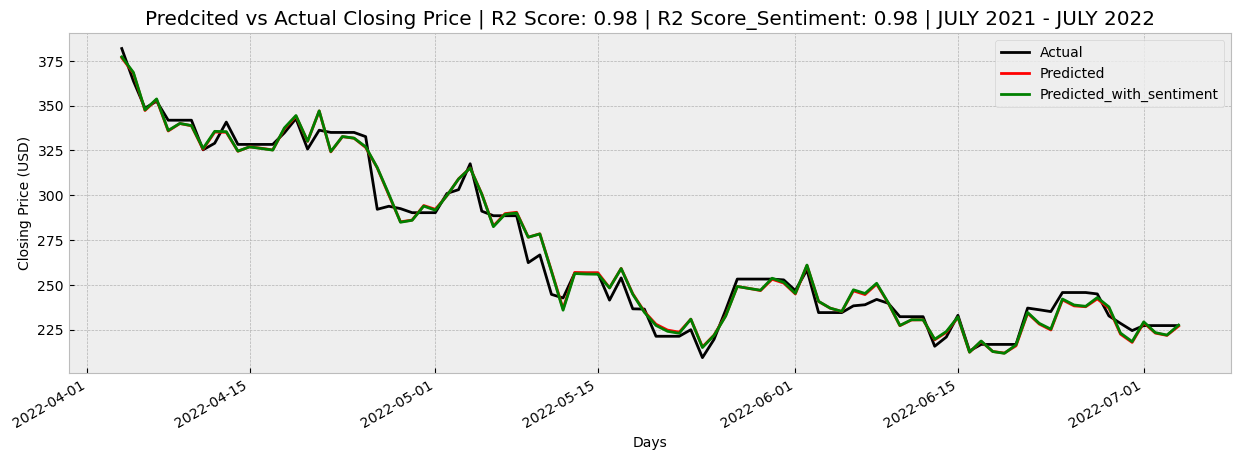

In [ ]:
plot_sent(pred_svr_test_2, pred_svr_test_op, y_test_svr, tsla_svr['Close'], acc_test_svr_2, acc_test_svr_op)

### 8.5 XGBoost Regression with Sentiment

In [ ]:
xgb_df = tsla_reddit.copy()

# print the shape of the filtered data frame
print("The filtered dataframe shape is: ", xgb_df.shape)

The filtered dataframe shape is:  (365, 22)


In [ ]:
train_test_split_xgb, validation_split_xgb = split_data(xgb_df)

The training data set contains 219 records.
The validation dataset contains 54 records.
The testing dataset contains 92 records.

Total records = 365


In [ ]:
X_train_xgb, y_train_xgb, X_val_xgb, y_val_xgb, X_test_xgb, y_test_xgb = create_sets(xgb_df, train_test_split_xgb, validation_split_xgb, 'Close')

Train set ---> X:(219, 21), y:(219,)
Validation set ---> X:(54, 21), y:(54,)
Test set ---> X:(92, 21), y:(92,)


In [ ]:
estimator_xgb = [
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(random_state=2023))
]

XGB_pipe = Pipeline(estimator_xgb)

In [ ]:
%%time
xgb_ = XGB_pipe.fit(X_train_xgb, y_train_xgb)
acc_train_xgb_ = XGB_pipe.score(X_train_xgb, y_train_xgb)
acc_valid_xgb_ = XGB_pipe.score(X_val_xgb, y_val_xgb)
acc_test_xgb_ = XGB_pipe.score(X_test_xgb, y_test_xgb)

print(f"Train accuracy score: {acc_train_xgb_}")
print(f"Validation accuracy score: {acc_valid_xgb_}")
print(f"Test accuracy score: {acc_test_xgb_}")

Train accuracy score: 0.999999999614135
Validation accuracy score: 0.9069403821890316
Test accuracy score: 0.9612955941648742
CPU times: total: 516 ms
Wall time: 42 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_xgb_valid_ = xgb_.predict(X_val_xgb)
pred_xgb_test_ = xgb_.predict(X_test_xgb)

In [ ]:
# Model Evaluation -- test
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_xgb, pred_xgb_test_)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_xgb, pred_xgb_test_)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test_))}')

Mean Absolute Error: 7.14958141161048
Mean Squared Error: 80.91374210294835
Root Mean Squared Error: 8.99520661813548


Suprisingly the model performed slightly worse with sentiment scoring.

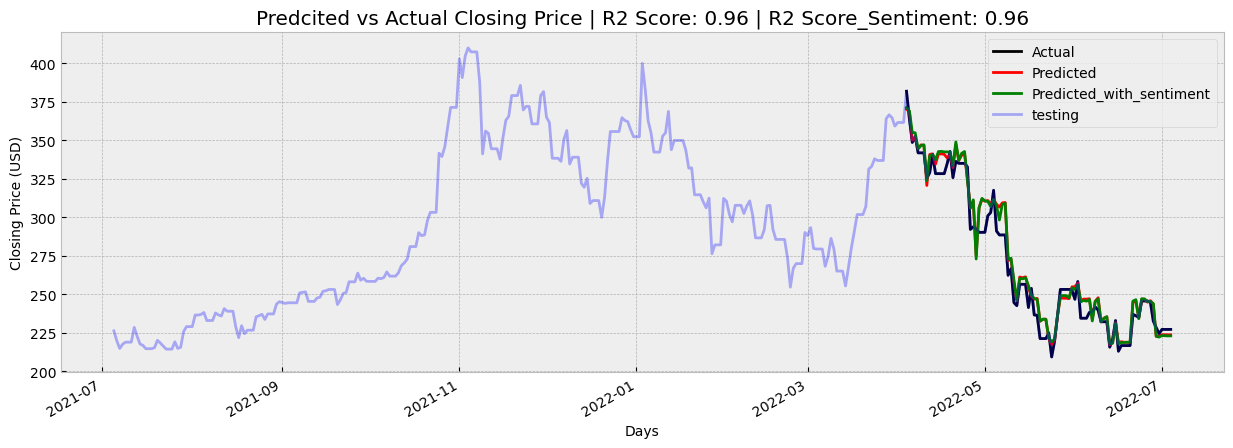

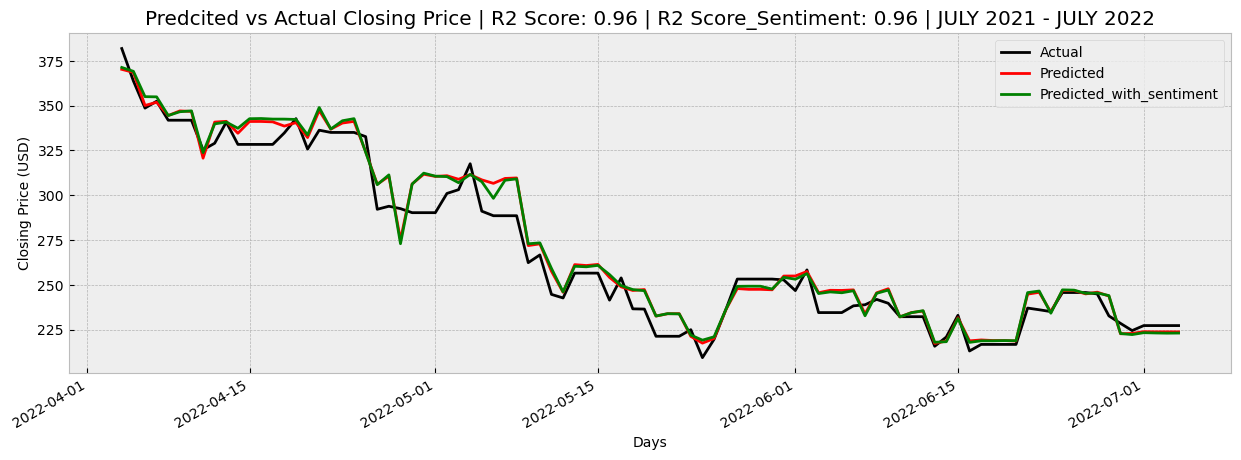

In [ ]:
plot_sent(pred_xgb_test, pred_xgb_test_, y_test_xgb, tsla_xgb['Close'], acc_test_xgb, acc_test_xgb_)

### 8.5.1 XGBoost Regression with Sentiment -- Optimized (n_estimators=150, max_depth=10, gamma=0.001, learning_rate=0.1)

In [ ]:
estimator_xgb = [
    ('scaler', MinMaxScaler()),
    ('model', XGBRegressor(random_state=2023, n_estimators=150, max_depth=10, gamma=0.001, learning_rate=0.1))
]

XGB_pipe = Pipeline(estimator_xgb)

In [ ]:
%%time
xgb_op = XGB_pipe.fit(X_train_xgb, y_train_xgb)
acc_train_xgb_op = XGB_pipe.score(X_train_xgb, y_train_xgb)
acc_valid_xgb_op = XGB_pipe.score(X_val_xgb, y_val_xgb)
acc_test_xgb_op = XGB_pipe.score(X_test_xgb, y_test_xgb)

print(f"Train accuracy score: {acc_train_xgb_op}")
print(f"Validation accuracy score: {acc_valid_xgb_op}")
print(f"Test accuracy score: {acc_test_xgb_op}")

Train accuracy score: 0.999999954242302
Validation accuracy score: 0.9274025671906969
Test accuracy score: 0.9743455461340444
CPU times: total: 1 s
Wall time: 70 ms


In [ ]:
# get our model predictions for our validation and testing sets
pred_xgb_valid_op = xgb_op.predict(X_val_xgb)
pred_xgb_test_op = xgb_op.predict(X_test_xgb)

In [ ]:
# Model Evaluation -- test
mae_xgb_sent = metrics.mean_absolute_error(y_test_xgb, pred_xgb_test_op)
mse_xgb_sent = metrics.mean_squared_error(y_test_xgb, pred_xgb_test_op)
rmse_xgb_sent = np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test_op))

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test_xgb, pred_xgb_test_op)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test_xgb, pred_xgb_test_op)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test_xgb, pred_xgb_test_op))}')

Mean Absolute Error: 5.877589847730554
Mean Squared Error: 53.63208190675918
Root Mean Squared Error: 7.323392786595512


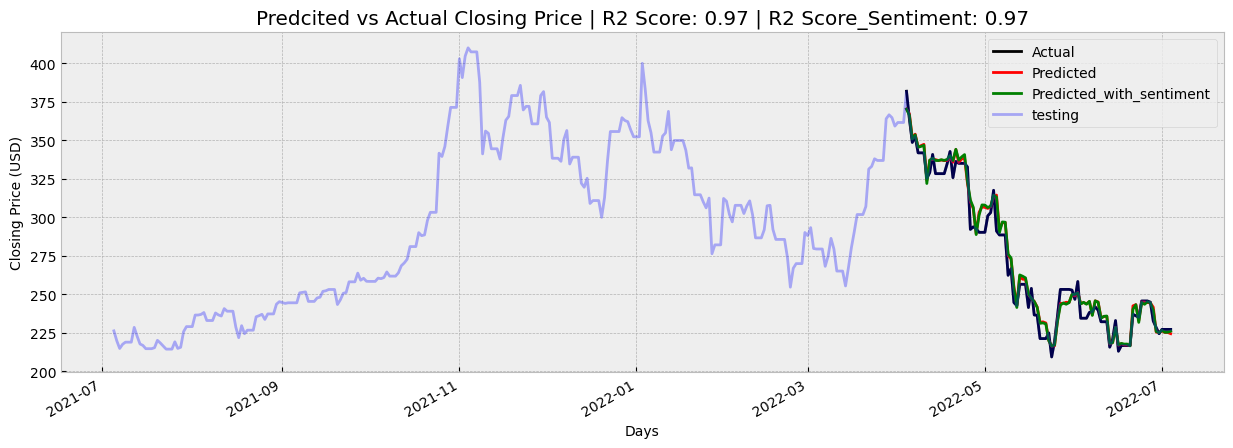

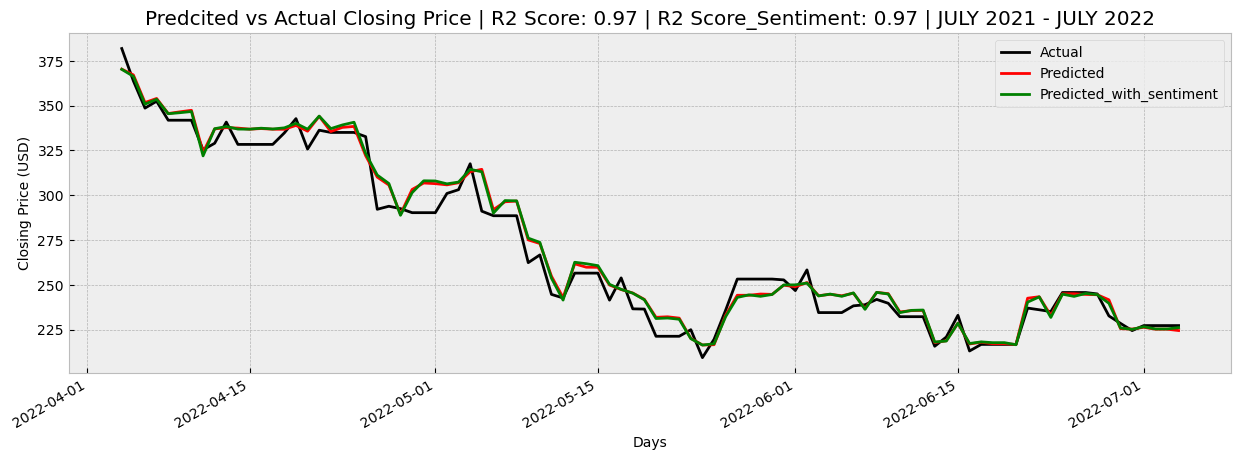

In [ ]:
plot_sent(pred_xgb_test_2, pred_xgb_test_op, y_test_xgb, tsla_xgb['Close'], acc_test_xgb_2, acc_test_xgb_op)

# Conclusion and Next Steps

Best performing model after sentiment is, SVR_optimized with sentiment analysis included.

In [ ]:
sent_performance = {
    'Ridge_sent':{'r2':acc_test_ridge_op, 'MAE':mae_ridge_sent, 'MSE':mse_ridge_sent, 'RMSE':rmse_ridge_sent},
    'KNN_sent':{'r2':acc_test_knn_op, 'MAE':mae_knn_sent, 'MSE':mse_knn_sent, 'RMSE':rmse_knn_sent},
    'RF_sent':{'r2':acc_test_rf_op, 'MAE':mae_rf_sent, 'MSE':mse_rf_sent, 'RMSE':rmse_rf_sent},
    'SVR_sent':{'r2':acc_test_svr_op, 'MAE':mae_svr_sent, 'MSE':mse_svr_sent, 'RMSE':rmse_svr_sent},
    'XGB_sent':{'r2':acc_test_xgb_op, 'MAE':mae_xgb_sent, 'MSE':mse_xgb_sent, 'RMSE':rmse_xgb_sent},
}

In [ ]:
sent_df = pd.DataFrame(sent_performance)
sent_df=sent_df.T
sent_df

r2        MAE         MSE       RMSE
Ridge_sent  0.951146   8.124187  102.131210  10.105999
KNN_sent    0.833466  14.997341  348.148188  18.658730
RF_sent     0.970101   6.283928   62.505106   7.906017
SVR_sent    0.984212   4.446709   33.006749   5.745150
XGB_sent    0.974346   5.877590   53.632082   7.323393

In [ ]:
r2 = sent_df['r2'].max()
mae = sent_df['MAE'].min()
mse = sent_df['MSE'].min()
rmse = sent_df['RMSE'].min()

In [ ]:
sent_df[sent_df['r2']==r2]

r2       MAE        MSE     RMSE
SVR_sent  0.984212  4.446709  33.006749  5.74515

 Again the best performing model is SVR with optimization with sentiment added. Below a simulation bot was run for the SVR with and without sentiment and we can see that the bot with sentiment out performed the both without sentiment. That is a clear indicator of how strong our stock market analysis is with adding in sentiment of social media posts.

Without this test the models performed similarily, based on r2, and error metrics - for measuring regression model performance.

This analysis was successful in providing evidence that sentiment can be a powerful predictor of stock prices, although, it should be used with heavy historical analysis. This analysis was conducted over the testing window which was approximately 90 days. The actual investment (traditional, buy in and pull out in 90 days) lost 37% of the initial investment of $1000). My model performed significantly better -- if the model predicted a 5% growth in price it would buy, this method the investment grew by 36%. If the bot just did all the investing, no matter if the growth was 5% or less, the investment grew by 152%.

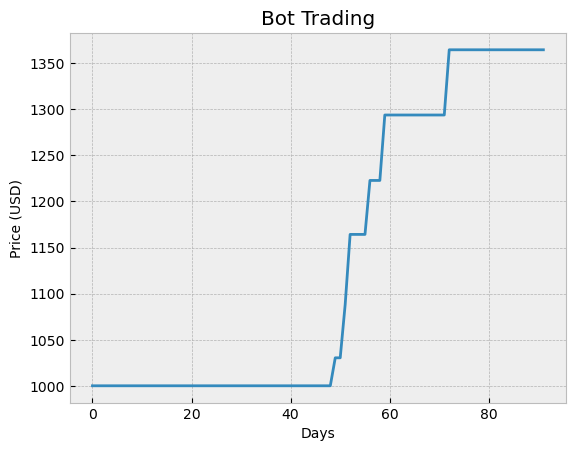

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1364.5881405556527, 36.5%


In [ ]:
# SVR with sentiment
bot_test(svr_df[train_test_split_svr:]['Open'], y_test_svr, pred_svr_test_op, 1000, 5)

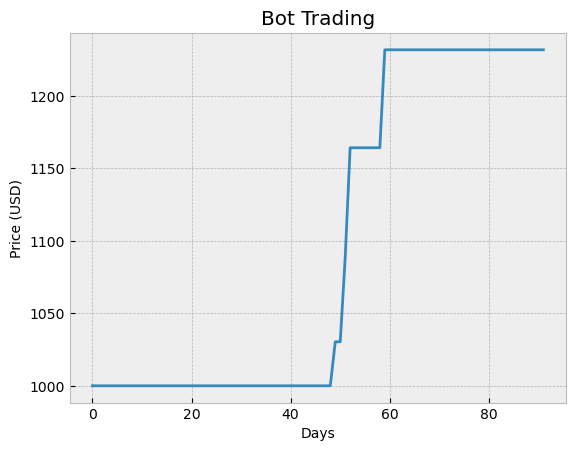

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1231.857513936461, 23.2%


In [ ]:
# SVR without sentiment
bot_test(tsla_svr[train_test_split_svr:]['Open'], y_test_svr, pred_svr_test_2, 1000, 5)

### Bot Trading test -- Appendix
Interactive way to visualize our findings is to simulate a bot trading based on the regression predicitons.

In [ ]:
# we want a way to test the ability for this prediction to succssfully make money
def bot_test(opens, closes, predictions, start_acct=1000, threshold=0):
  '''
  Bot test to see if our model can predict making money

  '''
  account = start_acct
  changes = []

  for i in range(len(predictions)):
    # if model predicts closing price is lower than opening price, we should not make the trade --think we will lose money; if model predicts we will make money, then make the trade
    # can use the threshold to adjust how much money we predict to make -- for example if model predicts the close is only a couple cents more than open, may not be worth making the trade -- riskier (closer to negative)

    if ((predictions[i]-opens[i])/opens[i])*100 >= threshold: # percent change formula (predicted close-open for that day)
      account += account*(closes[i]-opens[i])/opens[i] # add the percent change to the account (real close) only if the predicted threshld is met (are we predicting higher than open)
    changes.append(account)
  # changes = np.array(changes)

  plt.plot(range(len(changes)), changes)
  plt.xlabel('Days')
  plt.ylabel('Price (USD)')
  plt.title(f'Bot Trading')
  plt.show()

  invest_total = start_acct + start_acct*(closes[-1]-opens[0])/opens[0] # amount we would get if invested at the beginning and pulled it out at the end

  print(f"Traditional Investing Total: {invest_total}, {round((invest_total-start_acct)/start_acct*100,1)}%")
  print(f"Bot Trading Total: {account}, {round(((account-start_acct)/start_acct)*100,1)}%")

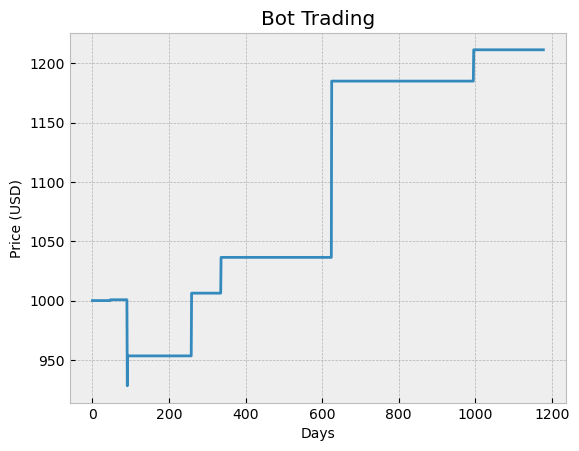

Traditional Investing Total: 4118.253954485261, 311.8%
Bot Trading Total: 1211.3555507666817, 21.1%


In [ ]:
# Test for investment based on our Linear Regression Model for the entire historical data set
bot_test(tsla[train_test_split:]['Open'], y_test_LR, pred_LR_test, 1000, 1)

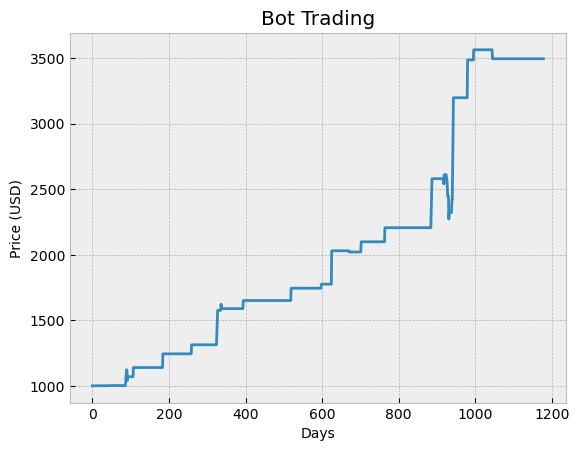

Traditional Investing Total: 4118.253954485261, 311.8%
Bot Trading Total: 3494.9692867579897, 249.5%


In [ ]:
# Test for investment based on our Ridge Regression Model| for the entire historical data set
bot_test(tsla[train_test_split_l2:]['Open'], y_test_l2, pred_l2_test, 1000, 0)

### Filtered Data

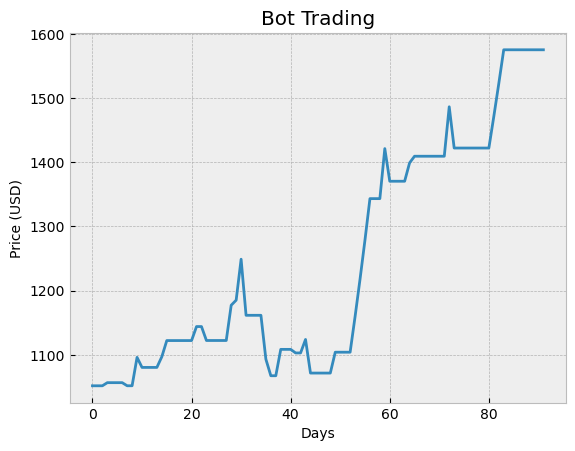

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1575.2611858521566, 57.5%


In [ ]:
# Test for investment based on our Linear Regression Model for the filtered set
bot_test(tsla_l2_filtered[train_test_split_l2_filter:]['Open'], y_test_LR_fil, pred_LR_test_fil, 1000, 0)

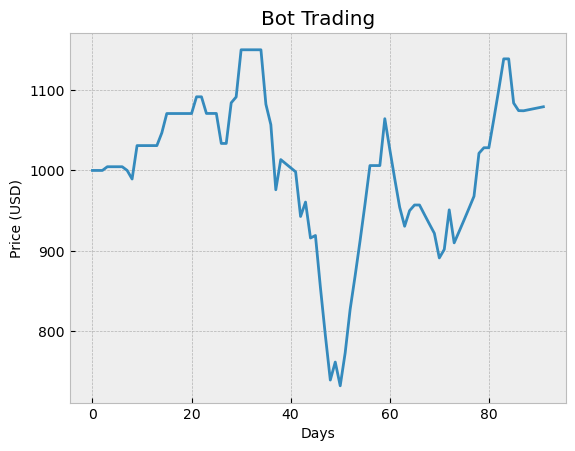

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1079.3489139755966, 7.9%


In [ ]:
# Test for investment based on our Ridge Regression Model for the filtered data set
bot_test(tsla_l2_filtered[train_test_split_l2_filter:]['Open'], y_test_l2_filter, pred_l2_test_filter, 1000, 0)

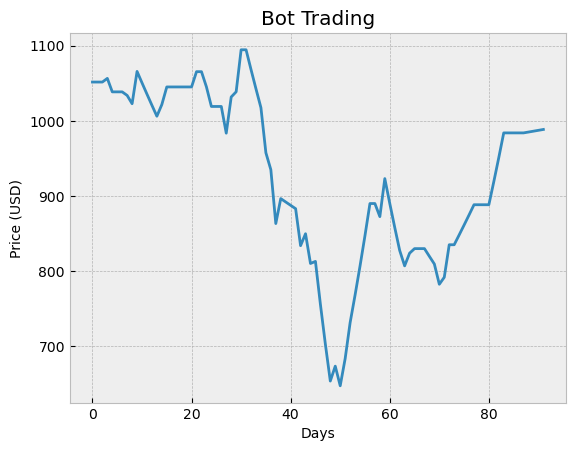

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 988.3336038821925, -1.2%


In [ ]:
# Test for investment based on our KNN Regression Model for the filtered data set
bot_test(tsla_knn[train_test_split_knn:]['Open'], y_test_knn, pred_knn_test, 1000, 0)

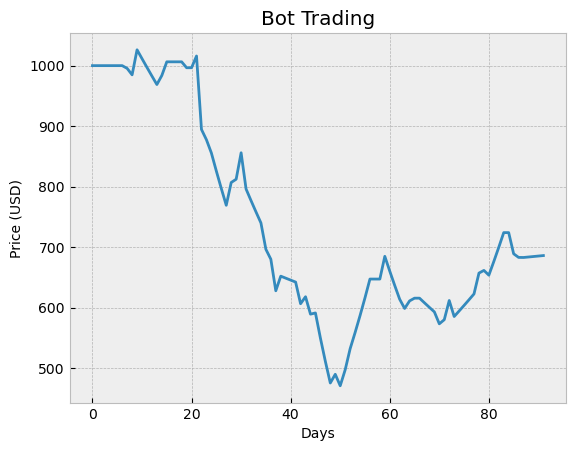

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 685.9381100560344, -31.4%


In [ ]:
# Test for investment based on our KNN Regression Model for the filtered data set -- Optimized
bot_test(tsla_knn[train_test_split_knn:]['Open'], y_test_knn, pred_knn_test_2, 1000, 0)

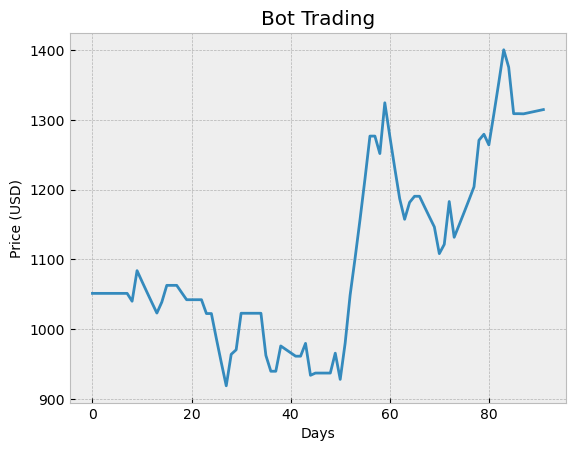

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1314.514312281159, 31.5%


In [ ]:
# Test for investment based on our Random Forest Regression Model for the filtered data set
bot_test(tsla_rf[train_test_split_rf:]['Open'], y_test_rf, pred_rf_test, 1000, 0)

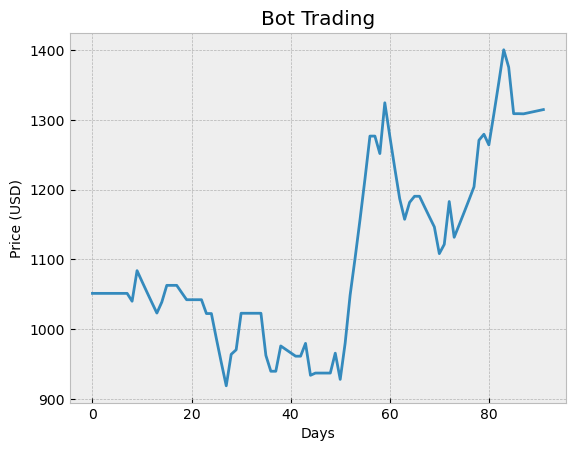

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1314.514312281159, 31.5%


In [ ]:
# Test for investment based on our Random Forest Regression Model for the filtered data set --- optimized
bot_test(tsla_rf[train_test_split_rf:]['Open'], y_test_rf, pred_rf_test_2, 1000, 0)

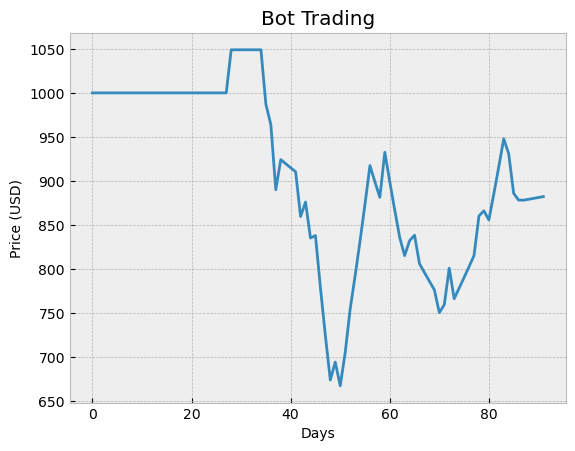

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 882.1502213560899, -11.8%


In [ ]:
# Test for investment based on our SVR Model for the filtered data set
bot_test(tsla_svr[train_test_split_svr:]['Open'], y_test_svr, pred_svr_test, 1000, 0)

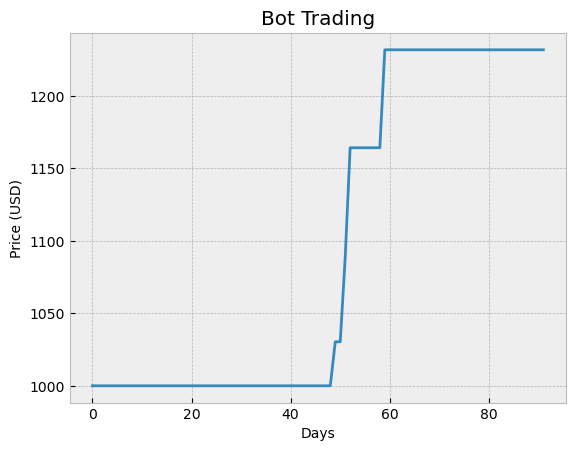

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1231.857513936461, 23.2%


In [ ]:
# Test for investment based on our SVR Model for the filtered data set --- optimized
bot_test(tsla_svr[train_test_split_svr:]['Open'], y_test_svr, pred_svr_test_2, 1000, 5)

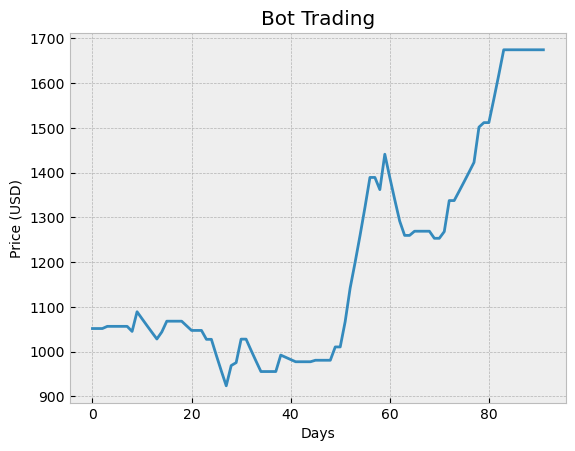

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1674.6022207605513, 67.5%


In [ ]:
# Test for investment based on our XGBoost Model for the filtered data set
bot_test(tsla_xgb[train_test_split_xgb:]['Open'], y_test_xgb, pred_xgb_test, 1000, 0)

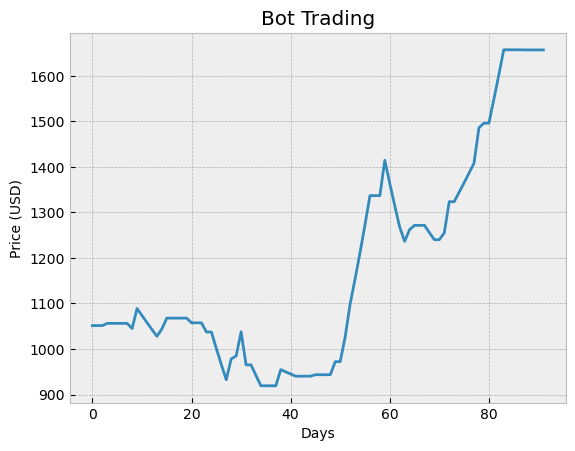

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1656.7914620184774, 65.7%


In [ ]:
# Test for investment based on our XGBoost Model for the filtered data set --- optimized
bot_test(tsla_xgb[train_test_split_xgb:]['Open'], y_test_xgb, pred_xgb_test_2, 1000, 0)

## Run with sentiment

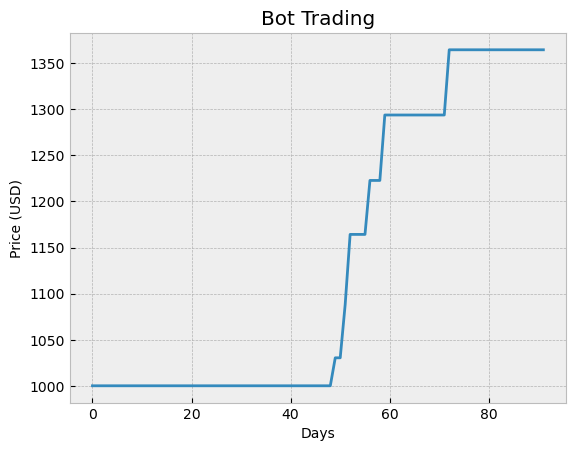

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1364.5881405556527, 36.5%


In [ ]:
# Test for investment based on our SVR Model for the filtered data set --- optimized
bot_test(svr_df[train_test_split_svr:]['Open'], y_test_svr, pred_svr_test_op, 1000, 5)

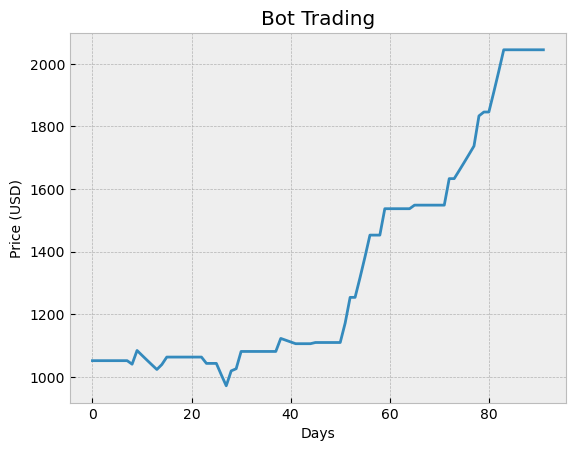

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 2044.483067220314, 104.4%


In [ ]:
# Test for investment based on our XGBoost Model for the filtered data set --- optimized
bot_test(xgb_df[train_test_split_xgb:]['Open'], y_test_xgb, pred_xgb_test_op, 1000, 1)

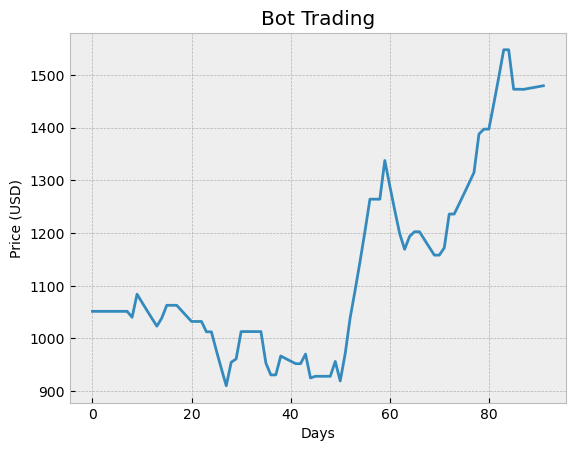

Traditional Investing Total: 625.8513892209683, -37.4%
Bot Trading Total: 1479.2881540029684, 47.9%


In [ ]:
# Test for investment based on our Random Forest Regression Model for the filtered data set --- optimized
bot_test(rf_df[train_test_split_rf:]['Open'], y_test_rf, pred_rf_test_op, 1000, 0)